# Load Machine Learning Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

**Load Data**

In [2]:
pathToTSV = ('dataset.tsv')

data = pd.read_table(pathToTSV, header=None, names = ['polarity','review'])

data['polarity_num'] = data.polarity.map({'N':0, 'P':1, 'O':2})
X=data.review
y=data.polarity_num
y=y.replace(np.nan,0)
print(data)

     polarity                                 review  polarity_num
0           O                                Kindle.           2.0
1           P                             very fast.           1.0
2           P  Beginner tablet for our year old son.           1.0
3           P                                  Good.           1.0
4           P             Fantastic Tablet for kids.           1.0
...       ...                                    ...           ...
9995        P                     Surprisingly good.           1.0
9996        P                         Great product.           1.0
9997        P                        Great for kids.           1.0
9998        P                           Great Gifts.           1.0
9999        P                          Nice product.           1.0

[10000 rows x 3 columns]


**Apply CountVectorizer ngram itration and machine learning models**

In [33]:
vect = CountVectorizer(ngram_range=(1,1))
k_range = list(range(1, 31))
print(k_range)
for k in k_range:
   
    X_train_dta,X_test_dta,y_train_dta,y_test_dta = train_test_split(X,y,test_size=0.4, random_state=k)

    vect.fit(X_train_dta) 
    X_train_mtd = vect.transform(X_train_dta) 
    X_test_mtd = vect.transform(X_test_dta) 
    
   
    KNearneighbor_scores = []
        
    knncodeA = KNeighborsClassifier(n_neighbors=3)
    knncodeA.fit(X_train_mtd, y_train_dta)
    y_knnA_pred = knncodeA.predict(X_test_mtd)
    KNearneighbor_scores.append(metrics.accuracy_score(y_test_dta, y_knnA_pred))
    
    
    Supportvector_scores=[]
    clf_sv=svm.SVC()
    clf_sv.fit(X_train_mtd, y_train_dta)
    y_pred_sv=clf_sv.predict(X_test_mtd)
    Supportvector_scores.append(metrics.accuracy_score(y_test_dta, y_knnA_pred))
    
    randomforest_scores = []
 
    rfcodeA = RandomForestClassifier(n_jobs=2, random_state=0)
    rfcodeA.fit(X_train_mtd, y_train_dta)
    rforestA_g = rfcodeA.predict(X_test_mtd)
    randomforest_scores.append(metrics.accuracy_score(y_test_dta, rforestA_g))
    catboost_scores = []  
    model = CatBoostClassifier()
    
    model.fit(X_train_mtd, y_train_dta)
    
    y_pred_cb = model.predict(X_test_mtd)
    
    catboost_scores.append(metrics.accuracy_score(y_test_dta, y_pred_cb))
    GradientBoosting_scores=[]
    
    GBC=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
    GBC.fit(X_train_mtd, y_train_dta)
    y_pred_GBC=GBC.predict(X_test_mtd)
    GradientBoosting_scores.append(metrics.accuracy_score(y_test_dta, y_knnA_pred))
    
    
    

    
    Decision_tree=[]
    clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
    clf.fit(X_train_mtd, y_train_dta)
    y_pred=clf.predict(X_test_mtd)
    Decision_tree.append(metrics.accuracy_score(y_test_dta, rforestA_g))
    
    
    


print('Support Vector macro', np.array (Supportvector_scores).mean())
print('Decision tree macro', np.array(Decision_tree).mean())
print('Nearest neighbour macro', np.array(KNearneighbor_scores).mean())

print('Random Forest macro', np.array(randomforest_scores).mean())

print('catboost' , np.array(catboost_scores).mean())
print('Gradient Boosting macro', np.array(GradientBoosting_scores).mean())



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Learning rate set to 0.086698
0:	learn: 0.9797946	total: 202ms	remaining: 3m 21s
1:	learn: 0.8878607	total: 218ms	remaining: 1m 48s
2:	learn: 0.8128177	total: 235ms	remaining: 1m 18s
3:	learn: 0.7509570	total: 251ms	remaining: 1m 2s
4:	learn: 0.7025327	total: 267ms	remaining: 53.1s
5:	learn: 0.6595499	total: 283ms	remaining: 46.9s
6:	learn: 0.6222667	total: 300ms	remaining: 42.5s
7:	learn: 0.5903570	total: 319ms	remaining: 39.5s
8:	learn: 0.5619500	total: 338ms	remaining: 37.2s
9:	learn: 0.5381408	total: 358ms	remaining: 35.4s
10:	learn: 0.5175587	total: 385ms	remaining: 34.6s
11:	learn: 0.4992558	total: 411ms	remaining: 33.8s
12:	learn: 0.4847274	total: 430ms	remaining: 32.7s
13:	learn: 0.4713565	total: 450ms	remaining: 31.7s
14:	learn: 0.4602772	total: 467ms	remaining: 30.7s
15:	learn: 0.4497202	total: 484ms	remaining: 29.8s
16:	learn: 0.4394905	total: 504ms	remaining: 29.1

161:	learn: 0.3334381	total: 4.35s	remaining: 22.5s
162:	learn: 0.3333653	total: 4.36s	remaining: 22.4s
163:	learn: 0.3333248	total: 4.38s	remaining: 22.3s
164:	learn: 0.3332697	total: 4.4s	remaining: 22.3s
165:	learn: 0.3332055	total: 4.42s	remaining: 22.2s
166:	learn: 0.3331662	total: 4.44s	remaining: 22.1s
167:	learn: 0.3331216	total: 4.45s	remaining: 22.1s
168:	learn: 0.3327738	total: 4.47s	remaining: 22s
169:	learn: 0.3327190	total: 4.49s	remaining: 21.9s
170:	learn: 0.3321526	total: 4.5s	remaining: 21.8s
171:	learn: 0.3320340	total: 4.53s	remaining: 21.8s
172:	learn: 0.3319942	total: 4.55s	remaining: 21.7s
173:	learn: 0.3317759	total: 4.56s	remaining: 21.7s
174:	learn: 0.3317071	total: 4.58s	remaining: 21.6s
175:	learn: 0.3316689	total: 4.59s	remaining: 21.5s
176:	learn: 0.3315825	total: 4.61s	remaining: 21.4s
177:	learn: 0.3315425	total: 4.63s	remaining: 21.4s
178:	learn: 0.3314504	total: 4.64s	remaining: 21.3s
179:	learn: 0.3313191	total: 4.66s	remaining: 21.2s
180:	learn: 0.33

326:	learn: 0.3204398	total: 7.22s	remaining: 14.9s
327:	learn: 0.3203862	total: 7.24s	remaining: 14.8s
328:	learn: 0.3203282	total: 7.26s	remaining: 14.8s
329:	learn: 0.3202424	total: 7.27s	remaining: 14.8s
330:	learn: 0.3201969	total: 7.29s	remaining: 14.7s
331:	learn: 0.3201416	total: 7.31s	remaining: 14.7s
332:	learn: 0.3200975	total: 7.32s	remaining: 14.7s
333:	learn: 0.3200505	total: 7.34s	remaining: 14.6s
334:	learn: 0.3200032	total: 7.35s	remaining: 14.6s
335:	learn: 0.3199598	total: 7.37s	remaining: 14.6s
336:	learn: 0.3199011	total: 7.39s	remaining: 14.5s
337:	learn: 0.3198508	total: 7.4s	remaining: 14.5s
338:	learn: 0.3197530	total: 7.42s	remaining: 14.5s
339:	learn: 0.3196988	total: 7.44s	remaining: 14.4s
340:	learn: 0.3196406	total: 7.45s	remaining: 14.4s
341:	learn: 0.3195624	total: 7.48s	remaining: 14.4s
342:	learn: 0.3195137	total: 7.49s	remaining: 14.4s
343:	learn: 0.3194787	total: 7.51s	remaining: 14.3s
344:	learn: 0.3194304	total: 7.52s	remaining: 14.3s
345:	learn: 0

496:	learn: 0.3111105	total: 10.1s	remaining: 10.2s
497:	learn: 0.3110071	total: 10.1s	remaining: 10.2s
498:	learn: 0.3109681	total: 10.1s	remaining: 10.1s
499:	learn: 0.3109335	total: 10.1s	remaining: 10.1s
500:	learn: 0.3108885	total: 10.1s	remaining: 10.1s
501:	learn: 0.3108402	total: 10.1s	remaining: 10.1s
502:	learn: 0.3108065	total: 10.2s	remaining: 10s
503:	learn: 0.3106953	total: 10.2s	remaining: 10s
504:	learn: 0.3106012	total: 10.2s	remaining: 9.99s
505:	learn: 0.3105188	total: 10.2s	remaining: 9.97s
506:	learn: 0.3104854	total: 10.2s	remaining: 9.94s
507:	learn: 0.3104450	total: 10.2s	remaining: 9.92s
508:	learn: 0.3104094	total: 10.3s	remaining: 9.9s
509:	learn: 0.3103754	total: 10.3s	remaining: 9.87s
510:	learn: 0.3103226	total: 10.3s	remaining: 9.85s
511:	learn: 0.3102917	total: 10.3s	remaining: 9.83s
512:	learn: 0.3102524	total: 10.3s	remaining: 9.81s
513:	learn: 0.3102236	total: 10.4s	remaining: 9.79s
514:	learn: 0.3101900	total: 10.4s	remaining: 9.77s
515:	learn: 0.310

658:	learn: 0.3037805	total: 12.7s	remaining: 6.58s
659:	learn: 0.3037521	total: 12.7s	remaining: 6.56s
660:	learn: 0.3036639	total: 12.8s	remaining: 6.54s
661:	learn: 0.3036334	total: 12.8s	remaining: 6.52s
662:	learn: 0.3035761	total: 12.8s	remaining: 6.5s
663:	learn: 0.3035460	total: 12.8s	remaining: 6.48s
664:	learn: 0.3035141	total: 12.8s	remaining: 6.46s
665:	learn: 0.3034718	total: 12.8s	remaining: 6.44s
666:	learn: 0.3034440	total: 12.8s	remaining: 6.42s
667:	learn: 0.3034153	total: 12.9s	remaining: 6.39s
668:	learn: 0.3033260	total: 12.9s	remaining: 6.38s
669:	learn: 0.3032949	total: 12.9s	remaining: 6.36s
670:	learn: 0.3032675	total: 12.9s	remaining: 6.34s
671:	learn: 0.3032140	total: 12.9s	remaining: 6.32s
672:	learn: 0.3031827	total: 13s	remaining: 6.3s
673:	learn: 0.3031579	total: 13s	remaining: 6.28s
674:	learn: 0.3031129	total: 13s	remaining: 6.26s
675:	learn: 0.3030614	total: 13s	remaining: 6.25s
676:	learn: 0.3030327	total: 13.1s	remaining: 6.23s
677:	learn: 0.3029327	

826:	learn: 0.2963674	total: 15.6s	remaining: 3.26s
827:	learn: 0.2963441	total: 15.6s	remaining: 3.24s
828:	learn: 0.2962959	total: 15.6s	remaining: 3.22s
829:	learn: 0.2962748	total: 15.6s	remaining: 3.2s
830:	learn: 0.2962492	total: 15.6s	remaining: 3.18s
831:	learn: 0.2962149	total: 15.7s	remaining: 3.16s
832:	learn: 0.2961823	total: 15.7s	remaining: 3.14s
833:	learn: 0.2961604	total: 15.7s	remaining: 3.12s
834:	learn: 0.2961003	total: 15.7s	remaining: 3.1s
835:	learn: 0.2960694	total: 15.7s	remaining: 3.08s
836:	learn: 0.2959376	total: 15.7s	remaining: 3.06s
837:	learn: 0.2959070	total: 15.8s	remaining: 3.04s
838:	learn: 0.2958758	total: 15.8s	remaining: 3.02s
839:	learn: 0.2957801	total: 15.8s	remaining: 3.01s
840:	learn: 0.2957581	total: 15.8s	remaining: 2.99s
841:	learn: 0.2956741	total: 15.8s	remaining: 2.97s
842:	learn: 0.2956435	total: 15.8s	remaining: 2.95s
843:	learn: 0.2955557	total: 15.8s	remaining: 2.93s
844:	learn: 0.2955314	total: 15.9s	remaining: 2.91s
845:	learn: 0.

994:	learn: 0.2897891	total: 18.4s	remaining: 92.5ms
995:	learn: 0.2896980	total: 18.4s	remaining: 74ms
996:	learn: 0.2896751	total: 18.4s	remaining: 55.5ms
997:	learn: 0.2896199	total: 18.5s	remaining: 37ms
998:	learn: 0.2895435	total: 18.5s	remaining: 18.5ms
999:	learn: 0.2895143	total: 18.5s	remaining: 0us
Learning rate set to 0.086698
0:	learn: 0.9802072	total: 22.4ms	remaining: 22.3s
1:	learn: 0.8883640	total: 39.3ms	remaining: 19.6s
2:	learn: 0.8179736	total: 54.9ms	remaining: 18.2s
3:	learn: 0.7557378	total: 71.1ms	remaining: 17.7s
4:	learn: 0.7039083	total: 87ms	remaining: 17.3s
5:	learn: 0.6603258	total: 103ms	remaining: 17s
6:	learn: 0.6228516	total: 119ms	remaining: 16.8s
7:	learn: 0.5911717	total: 135ms	remaining: 16.7s
8:	learn: 0.5643884	total: 177ms	remaining: 19.5s
9:	learn: 0.5421349	total: 203ms	remaining: 20.1s
10:	learn: 0.5219484	total: 228ms	remaining: 20.5s
11:	learn: 0.5030765	total: 254ms	remaining: 20.9s
12:	learn: 0.4854628	total: 273ms	remaining: 20.8s
13:	l

154:	learn: 0.3321705	total: 2.63s	remaining: 14.4s
155:	learn: 0.3320761	total: 2.65s	remaining: 14.3s
156:	learn: 0.3320156	total: 2.67s	remaining: 14.3s
157:	learn: 0.3319599	total: 2.68s	remaining: 14.3s
158:	learn: 0.3318626	total: 2.7s	remaining: 14.3s
159:	learn: 0.3316800	total: 2.71s	remaining: 14.2s
160:	learn: 0.3316221	total: 2.73s	remaining: 14.2s
161:	learn: 0.3315846	total: 2.75s	remaining: 14.2s
162:	learn: 0.3315311	total: 2.76s	remaining: 14.2s
163:	learn: 0.3314688	total: 2.78s	remaining: 14.2s
164:	learn: 0.3313835	total: 2.8s	remaining: 14.2s
165:	learn: 0.3312968	total: 2.81s	remaining: 14.1s
166:	learn: 0.3312055	total: 2.83s	remaining: 14.1s
167:	learn: 0.3310905	total: 2.85s	remaining: 14.1s
168:	learn: 0.3310397	total: 2.87s	remaining: 14.1s
169:	learn: 0.3309403	total: 2.88s	remaining: 14.1s
170:	learn: 0.3307541	total: 2.9s	remaining: 14.1s
171:	learn: 0.3305228	total: 2.92s	remaining: 14s
172:	learn: 0.3302173	total: 2.94s	remaining: 14s
173:	learn: 0.33017

322:	learn: 0.3200892	total: 5.45s	remaining: 11.4s
323:	learn: 0.3198719	total: 5.46s	remaining: 11.4s
324:	learn: 0.3198277	total: 5.48s	remaining: 11.4s
325:	learn: 0.3197749	total: 5.5s	remaining: 11.4s
326:	learn: 0.3197172	total: 5.51s	remaining: 11.3s
327:	learn: 0.3196810	total: 5.53s	remaining: 11.3s
328:	learn: 0.3196425	total: 5.54s	remaining: 11.3s
329:	learn: 0.3196049	total: 5.56s	remaining: 11.3s
330:	learn: 0.3195668	total: 5.58s	remaining: 11.3s
331:	learn: 0.3195299	total: 5.59s	remaining: 11.3s
332:	learn: 0.3194680	total: 5.61s	remaining: 11.2s
333:	learn: 0.3194267	total: 5.62s	remaining: 11.2s
334:	learn: 0.3193704	total: 5.64s	remaining: 11.2s
335:	learn: 0.3193001	total: 5.66s	remaining: 11.2s
336:	learn: 0.3192590	total: 5.67s	remaining: 11.2s
337:	learn: 0.3192171	total: 5.69s	remaining: 11.1s
338:	learn: 0.3191701	total: 5.71s	remaining: 11.1s
339:	learn: 0.3191253	total: 5.72s	remaining: 11.1s
340:	learn: 0.3190769	total: 5.74s	remaining: 11.1s
341:	learn: 0

491:	learn: 0.3112531	total: 8.31s	remaining: 8.58s
492:	learn: 0.3112103	total: 8.32s	remaining: 8.56s
493:	learn: 0.3111776	total: 8.34s	remaining: 8.54s
494:	learn: 0.3111418	total: 8.36s	remaining: 8.53s
495:	learn: 0.3111017	total: 8.37s	remaining: 8.51s
496:	learn: 0.3110525	total: 8.39s	remaining: 8.49s
497:	learn: 0.3109737	total: 8.41s	remaining: 8.47s
498:	learn: 0.3109289	total: 8.42s	remaining: 8.46s
499:	learn: 0.3108810	total: 8.44s	remaining: 8.44s
500:	learn: 0.3108004	total: 8.45s	remaining: 8.42s
501:	learn: 0.3107201	total: 8.47s	remaining: 8.4s
502:	learn: 0.3106814	total: 8.49s	remaining: 8.38s
503:	learn: 0.3106362	total: 8.5s	remaining: 8.37s
504:	learn: 0.3105884	total: 8.52s	remaining: 8.35s
505:	learn: 0.3105492	total: 8.54s	remaining: 8.33s
506:	learn: 0.3105079	total: 8.55s	remaining: 8.31s
507:	learn: 0.3104343	total: 8.57s	remaining: 8.3s
508:	learn: 0.3103999	total: 8.58s	remaining: 8.28s
509:	learn: 0.3103638	total: 8.6s	remaining: 8.27s
510:	learn: 0.31

661:	learn: 0.3029813	total: 11.2s	remaining: 5.71s
662:	learn: 0.3029542	total: 11.2s	remaining: 5.69s
663:	learn: 0.3029093	total: 11.2s	remaining: 5.67s
664:	learn: 0.3028782	total: 11.2s	remaining: 5.66s
665:	learn: 0.3027705	total: 11.2s	remaining: 5.64s
666:	learn: 0.3027414	total: 11.3s	remaining: 5.62s
667:	learn: 0.3027094	total: 11.3s	remaining: 5.61s
668:	learn: 0.3026755	total: 11.3s	remaining: 5.59s
669:	learn: 0.3026447	total: 11.3s	remaining: 5.57s
670:	learn: 0.3026133	total: 11.3s	remaining: 5.55s
671:	learn: 0.3025832	total: 11.3s	remaining: 5.54s
672:	learn: 0.3025333	total: 11.4s	remaining: 5.52s
673:	learn: 0.3024995	total: 11.4s	remaining: 5.5s
674:	learn: 0.3024623	total: 11.4s	remaining: 5.49s
675:	learn: 0.3024333	total: 11.4s	remaining: 5.47s
676:	learn: 0.3024025	total: 11.4s	remaining: 5.45s
677:	learn: 0.3023629	total: 11.4s	remaining: 5.43s
678:	learn: 0.3023364	total: 11.5s	remaining: 5.42s
679:	learn: 0.3022807	total: 11.5s	remaining: 5.4s
680:	learn: 0.

820:	learn: 0.2963290	total: 13.8s	remaining: 3.02s
821:	learn: 0.2963010	total: 13.9s	remaining: 3s
822:	learn: 0.2962733	total: 13.9s	remaining: 2.98s
823:	learn: 0.2962517	total: 13.9s	remaining: 2.97s
824:	learn: 0.2962279	total: 13.9s	remaining: 2.95s
825:	learn: 0.2962039	total: 13.9s	remaining: 2.93s
826:	learn: 0.2961335	total: 13.9s	remaining: 2.92s
827:	learn: 0.2961065	total: 14s	remaining: 2.9s
828:	learn: 0.2960558	total: 14s	remaining: 2.88s
829:	learn: 0.2960253	total: 14s	remaining: 2.87s
830:	learn: 0.2959995	total: 14s	remaining: 2.85s
831:	learn: 0.2959733	total: 14s	remaining: 2.83s
832:	learn: 0.2959503	total: 14s	remaining: 2.81s
833:	learn: 0.2958985	total: 14.1s	remaining: 2.8s
834:	learn: 0.2958711	total: 14.1s	remaining: 2.78s
835:	learn: 0.2958407	total: 14.1s	remaining: 2.76s
836:	learn: 0.2958127	total: 14.1s	remaining: 2.75s
837:	learn: 0.2957831	total: 14.1s	remaining: 2.73s
838:	learn: 0.2957592	total: 14.1s	remaining: 2.71s
839:	learn: 0.2957353	total: 

988:	learn: 0.2902438	total: 16.8s	remaining: 187ms
989:	learn: 0.2902245	total: 16.8s	remaining: 170ms
990:	learn: 0.2901928	total: 16.8s	remaining: 153ms
991:	learn: 0.2901687	total: 16.8s	remaining: 136ms
992:	learn: 0.2901450	total: 16.8s	remaining: 119ms
993:	learn: 0.2899933	total: 16.9s	remaining: 102ms
994:	learn: 0.2899711	total: 16.9s	remaining: 84.8ms
995:	learn: 0.2899495	total: 16.9s	remaining: 67.8ms
996:	learn: 0.2899253	total: 16.9s	remaining: 50.9ms
997:	learn: 0.2898677	total: 16.9s	remaining: 33.9ms
998:	learn: 0.2897420	total: 16.9s	remaining: 16.9ms
999:	learn: 0.2896858	total: 17s	remaining: 0us
Learning rate set to 0.086698
0:	learn: 0.9773265	total: 24.2ms	remaining: 24.2s
1:	learn: 0.8830511	total: 45.2ms	remaining: 22.6s
2:	learn: 0.8113653	total: 60.7ms	remaining: 20.2s
3:	learn: 0.7478352	total: 76.3ms	remaining: 19s
4:	learn: 0.6958424	total: 92.8ms	remaining: 18.5s
5:	learn: 0.6514623	total: 108ms	remaining: 17.9s
6:	learn: 0.6136980	total: 124ms	remaining

158:	learn: 0.3176964	total: 2.65s	remaining: 14s
159:	learn: 0.3176582	total: 2.66s	remaining: 14s
160:	learn: 0.3175673	total: 2.68s	remaining: 14s
161:	learn: 0.3175237	total: 2.7s	remaining: 14s
162:	learn: 0.3174461	total: 2.72s	remaining: 14s
163:	learn: 0.3173628	total: 2.73s	remaining: 13.9s
164:	learn: 0.3172460	total: 2.75s	remaining: 13.9s
165:	learn: 0.3171390	total: 2.77s	remaining: 13.9s
166:	learn: 0.3169750	total: 2.78s	remaining: 13.9s
167:	learn: 0.3169271	total: 2.8s	remaining: 13.9s
168:	learn: 0.3168046	total: 2.81s	remaining: 13.8s
169:	learn: 0.3167493	total: 2.83s	remaining: 13.8s
170:	learn: 0.3166678	total: 2.84s	remaining: 13.8s
171:	learn: 0.3165690	total: 2.86s	remaining: 13.8s
172:	learn: 0.3164746	total: 2.88s	remaining: 13.7s
173:	learn: 0.3163926	total: 2.89s	remaining: 13.7s
174:	learn: 0.3162683	total: 2.91s	remaining: 13.7s
175:	learn: 0.3161784	total: 2.92s	remaining: 13.7s
176:	learn: 0.3160692	total: 2.94s	remaining: 13.7s
177:	learn: 0.3160229	to

319:	learn: 0.3057948	total: 5.49s	remaining: 11.7s
320:	learn: 0.3057557	total: 5.51s	remaining: 11.7s
321:	learn: 0.3057104	total: 5.53s	remaining: 11.6s
322:	learn: 0.3056421	total: 5.55s	remaining: 11.6s
323:	learn: 0.3055494	total: 5.57s	remaining: 11.6s
324:	learn: 0.3054666	total: 5.58s	remaining: 11.6s
325:	learn: 0.3054003	total: 5.6s	remaining: 11.6s
326:	learn: 0.3053520	total: 5.62s	remaining: 11.6s
327:	learn: 0.3052526	total: 5.63s	remaining: 11.5s
328:	learn: 0.3052171	total: 5.65s	remaining: 11.5s
329:	learn: 0.3051344	total: 5.67s	remaining: 11.5s
330:	learn: 0.3050931	total: 5.68s	remaining: 11.5s
331:	learn: 0.3050437	total: 5.7s	remaining: 11.5s
332:	learn: 0.3049759	total: 5.72s	remaining: 11.5s
333:	learn: 0.3049288	total: 5.74s	remaining: 11.4s
334:	learn: 0.3048925	total: 5.76s	remaining: 11.4s
335:	learn: 0.3048365	total: 5.78s	remaining: 11.4s
336:	learn: 0.3047854	total: 5.8s	remaining: 11.4s
337:	learn: 0.3047481	total: 5.82s	remaining: 11.4s
338:	learn: 0.3

488:	learn: 0.2960586	total: 8.35s	remaining: 8.73s
489:	learn: 0.2960109	total: 8.37s	remaining: 8.71s
490:	learn: 0.2959765	total: 8.38s	remaining: 8.69s
491:	learn: 0.2959418	total: 8.4s	remaining: 8.67s
492:	learn: 0.2958983	total: 8.42s	remaining: 8.65s
493:	learn: 0.2958578	total: 8.43s	remaining: 8.64s
494:	learn: 0.2958239	total: 8.45s	remaining: 8.62s
495:	learn: 0.2957900	total: 8.46s	remaining: 8.6s
496:	learn: 0.2957467	total: 8.48s	remaining: 8.58s
497:	learn: 0.2957130	total: 8.49s	remaining: 8.56s
498:	learn: 0.2956782	total: 8.51s	remaining: 8.54s
499:	learn: 0.2956271	total: 8.52s	remaining: 8.52s
500:	learn: 0.2955775	total: 8.54s	remaining: 8.51s
501:	learn: 0.2954746	total: 8.56s	remaining: 8.49s
502:	learn: 0.2954053	total: 8.57s	remaining: 8.47s
503:	learn: 0.2953463	total: 8.59s	remaining: 8.45s
504:	learn: 0.2951758	total: 8.6s	remaining: 8.43s
505:	learn: 0.2951413	total: 8.62s	remaining: 8.41s
506:	learn: 0.2951031	total: 8.63s	remaining: 8.39s
507:	learn: 0.2

654:	learn: 0.2880078	total: 11s	remaining: 5.79s
655:	learn: 0.2879747	total: 11s	remaining: 5.77s
656:	learn: 0.2879445	total: 11s	remaining: 5.75s
657:	learn: 0.2879135	total: 11s	remaining: 5.74s
658:	learn: 0.2878801	total: 11.1s	remaining: 5.72s
659:	learn: 0.2878404	total: 11.1s	remaining: 5.7s
660:	learn: 0.2878063	total: 11.1s	remaining: 5.69s
661:	learn: 0.2877735	total: 11.1s	remaining: 5.67s
662:	learn: 0.2877446	total: 11.1s	remaining: 5.65s
663:	learn: 0.2877126	total: 11.1s	remaining: 5.63s
664:	learn: 0.2876819	total: 11.2s	remaining: 5.62s
665:	learn: 0.2876558	total: 11.2s	remaining: 5.6s
666:	learn: 0.2876114	total: 11.2s	remaining: 5.58s
667:	learn: 0.2875430	total: 11.2s	remaining: 5.57s
668:	learn: 0.2875057	total: 11.2s	remaining: 5.55s
669:	learn: 0.2873915	total: 11.2s	remaining: 5.53s
670:	learn: 0.2872569	total: 11.2s	remaining: 5.51s
671:	learn: 0.2872259	total: 11.3s	remaining: 5.5s
672:	learn: 0.2871260	total: 11.3s	remaining: 5.48s
673:	learn: 0.2870956	t

824:	learn: 0.2800664	total: 13.9s	remaining: 2.94s
825:	learn: 0.2799921	total: 13.9s	remaining: 2.93s
826:	learn: 0.2799423	total: 13.9s	remaining: 2.91s
827:	learn: 0.2799128	total: 13.9s	remaining: 2.89s
828:	learn: 0.2798720	total: 13.9s	remaining: 2.88s
829:	learn: 0.2798393	total: 14s	remaining: 2.86s
830:	learn: 0.2798045	total: 14s	remaining: 2.84s
831:	learn: 0.2797596	total: 14s	remaining: 2.82s
832:	learn: 0.2797275	total: 14s	remaining: 2.81s
833:	learn: 0.2796991	total: 14s	remaining: 2.79s
834:	learn: 0.2796704	total: 14s	remaining: 2.77s
835:	learn: 0.2796382	total: 14.1s	remaining: 2.76s
836:	learn: 0.2796128	total: 14.1s	remaining: 2.74s
837:	learn: 0.2795869	total: 14.1s	remaining: 2.72s
838:	learn: 0.2795660	total: 14.1s	remaining: 2.71s
839:	learn: 0.2795363	total: 14.1s	remaining: 2.69s
840:	learn: 0.2795079	total: 14.1s	remaining: 2.67s
841:	learn: 0.2794857	total: 14.2s	remaining: 2.65s
842:	learn: 0.2794600	total: 14.2s	remaining: 2.64s
843:	learn: 0.2794245	to

994:	learn: 0.2729592	total: 16.7s	remaining: 84.1ms
995:	learn: 0.2729072	total: 16.8s	remaining: 67.3ms
996:	learn: 0.2728498	total: 16.8s	remaining: 50.5ms
997:	learn: 0.2728203	total: 16.8s	remaining: 33.6ms
998:	learn: 0.2727528	total: 16.8s	remaining: 16.8ms
999:	learn: 0.2727303	total: 16.8s	remaining: 0us
Learning rate set to 0.086698
0:	learn: 0.9770491	total: 25.2ms	remaining: 25.1s
1:	learn: 0.8869293	total: 42.1ms	remaining: 21s
2:	learn: 0.8144403	total: 60.1ms	remaining: 20s
3:	learn: 0.7500419	total: 76.2ms	remaining: 19s
4:	learn: 0.6965530	total: 91ms	remaining: 18.1s
5:	learn: 0.6515682	total: 102ms	remaining: 16.9s
6:	learn: 0.6133869	total: 117ms	remaining: 16.6s
7:	learn: 0.5806477	total: 133ms	remaining: 16.4s
8:	learn: 0.5543512	total: 148ms	remaining: 16.3s
9:	learn: 0.5317581	total: 164ms	remaining: 16.2s
10:	learn: 0.5106036	total: 180ms	remaining: 16.2s
11:	learn: 0.4918417	total: 195ms	remaining: 16.1s
12:	learn: 0.4752396	total: 211ms	remaining: 16s
13:	lea

158:	learn: 0.3155117	total: 2.6s	remaining: 13.8s
159:	learn: 0.3154144	total: 2.62s	remaining: 13.8s
160:	learn: 0.3152605	total: 2.63s	remaining: 13.7s
161:	learn: 0.3150966	total: 2.65s	remaining: 13.7s
162:	learn: 0.3150037	total: 2.67s	remaining: 13.7s
163:	learn: 0.3149109	total: 2.68s	remaining: 13.7s
164:	learn: 0.3146586	total: 2.7s	remaining: 13.7s
165:	learn: 0.3145510	total: 2.71s	remaining: 13.6s
166:	learn: 0.3144774	total: 2.73s	remaining: 13.6s
167:	learn: 0.3144360	total: 2.74s	remaining: 13.6s
168:	learn: 0.3143738	total: 2.76s	remaining: 13.6s
169:	learn: 0.3142646	total: 2.77s	remaining: 13.5s
170:	learn: 0.3142066	total: 2.79s	remaining: 13.5s
171:	learn: 0.3141463	total: 2.81s	remaining: 13.5s
172:	learn: 0.3140318	total: 2.82s	remaining: 13.5s
173:	learn: 0.3139901	total: 2.84s	remaining: 13.5s
174:	learn: 0.3139524	total: 2.85s	remaining: 13.4s
175:	learn: 0.3137110	total: 2.87s	remaining: 13.4s
176:	learn: 0.3136434	total: 2.88s	remaining: 13.4s
177:	learn: 0.

325:	learn: 0.3022087	total: 5.24s	remaining: 10.8s
326:	learn: 0.3021671	total: 5.25s	remaining: 10.8s
327:	learn: 0.3021224	total: 5.27s	remaining: 10.8s
328:	learn: 0.3020590	total: 5.28s	remaining: 10.8s
329:	learn: 0.3020148	total: 5.3s	remaining: 10.8s
330:	learn: 0.3019015	total: 5.31s	remaining: 10.7s
331:	learn: 0.3018120	total: 5.33s	remaining: 10.7s
332:	learn: 0.3017502	total: 5.34s	remaining: 10.7s
333:	learn: 0.3015541	total: 5.36s	remaining: 10.7s
334:	learn: 0.3013623	total: 5.38s	remaining: 10.7s
335:	learn: 0.3013161	total: 5.39s	remaining: 10.7s
336:	learn: 0.3012785	total: 5.41s	remaining: 10.6s
337:	learn: 0.3012146	total: 5.42s	remaining: 10.6s
338:	learn: 0.3011739	total: 5.46s	remaining: 10.7s
339:	learn: 0.3011383	total: 5.48s	remaining: 10.6s
340:	learn: 0.3010649	total: 5.49s	remaining: 10.6s
341:	learn: 0.3009784	total: 5.51s	remaining: 10.6s
342:	learn: 0.3009189	total: 5.53s	remaining: 10.6s
343:	learn: 0.3008445	total: 5.54s	remaining: 10.6s
344:	learn: 0

491:	learn: 0.2926380	total: 7.89s	remaining: 8.15s
492:	learn: 0.2925989	total: 7.91s	remaining: 8.13s
493:	learn: 0.2925426	total: 7.92s	remaining: 8.12s
494:	learn: 0.2924953	total: 7.94s	remaining: 8.1s
495:	learn: 0.2924547	total: 7.95s	remaining: 8.08s
496:	learn: 0.2924186	total: 7.97s	remaining: 8.07s
497:	learn: 0.2923140	total: 7.99s	remaining: 8.05s
498:	learn: 0.2922771	total: 8s	remaining: 8.03s
499:	learn: 0.2922507	total: 8.02s	remaining: 8.02s
500:	learn: 0.2921360	total: 8.03s	remaining: 8s
501:	learn: 0.2921029	total: 8.05s	remaining: 7.98s
502:	learn: 0.2920667	total: 8.06s	remaining: 7.96s
503:	learn: 0.2920258	total: 8.08s	remaining: 7.95s
504:	learn: 0.2919913	total: 8.09s	remaining: 7.93s
505:	learn: 0.2919551	total: 8.11s	remaining: 7.92s
506:	learn: 0.2919122	total: 8.12s	remaining: 7.9s
507:	learn: 0.2918543	total: 8.14s	remaining: 7.88s
508:	learn: 0.2918035	total: 8.15s	remaining: 7.87s
509:	learn: 0.2917635	total: 8.17s	remaining: 7.85s
510:	learn: 0.291685

659:	learn: 0.2843580	total: 10.6s	remaining: 5.44s
660:	learn: 0.2843103	total: 10.6s	remaining: 5.42s
661:	learn: 0.2842727	total: 10.6s	remaining: 5.4s
662:	learn: 0.2842393	total: 10.6s	remaining: 5.39s
663:	learn: 0.2841641	total: 10.6s	remaining: 5.37s
664:	learn: 0.2840822	total: 10.6s	remaining: 5.36s
665:	learn: 0.2840531	total: 10.6s	remaining: 5.34s
666:	learn: 0.2840179	total: 10.7s	remaining: 5.32s
667:	learn: 0.2839839	total: 10.7s	remaining: 5.31s
668:	learn: 0.2839407	total: 10.7s	remaining: 5.29s
669:	learn: 0.2839109	total: 10.7s	remaining: 5.27s
670:	learn: 0.2838688	total: 10.7s	remaining: 5.26s
671:	learn: 0.2837982	total: 10.7s	remaining: 5.24s
672:	learn: 0.2837632	total: 10.8s	remaining: 5.22s
673:	learn: 0.2837200	total: 10.8s	remaining: 5.21s
674:	learn: 0.2836839	total: 10.8s	remaining: 5.19s
675:	learn: 0.2836622	total: 10.8s	remaining: 5.18s
676:	learn: 0.2836195	total: 10.8s	remaining: 5.16s
677:	learn: 0.2835878	total: 10.8s	remaining: 5.14s
678:	learn: 0

819:	learn: 0.2772864	total: 13.2s	remaining: 2.9s
820:	learn: 0.2772278	total: 13.2s	remaining: 2.88s
821:	learn: 0.2771922	total: 13.2s	remaining: 2.86s
822:	learn: 0.2771551	total: 13.2s	remaining: 2.85s
823:	learn: 0.2771275	total: 13.3s	remaining: 2.83s
824:	learn: 0.2770936	total: 13.3s	remaining: 2.81s
825:	learn: 0.2770471	total: 13.3s	remaining: 2.8s
826:	learn: 0.2770199	total: 13.3s	remaining: 2.78s
827:	learn: 0.2769952	total: 13.3s	remaining: 2.77s
828:	learn: 0.2769702	total: 13.3s	remaining: 2.75s
829:	learn: 0.2769455	total: 13.3s	remaining: 2.73s
830:	learn: 0.2769150	total: 13.4s	remaining: 2.72s
831:	learn: 0.2768234	total: 13.4s	remaining: 2.7s
832:	learn: 0.2767583	total: 13.4s	remaining: 2.69s
833:	learn: 0.2767273	total: 13.4s	remaining: 2.67s
834:	learn: 0.2767000	total: 13.4s	remaining: 2.65s
835:	learn: 0.2766721	total: 13.4s	remaining: 2.64s
836:	learn: 0.2766309	total: 13.5s	remaining: 2.62s
837:	learn: 0.2766066	total: 13.5s	remaining: 2.61s
838:	learn: 0.2

978:	learn: 0.2702060	total: 15.8s	remaining: 339ms
979:	learn: 0.2701887	total: 15.8s	remaining: 323ms
980:	learn: 0.2701606	total: 15.8s	remaining: 307ms
981:	learn: 0.2701392	total: 15.9s	remaining: 291ms
982:	learn: 0.2701122	total: 15.9s	remaining: 274ms
983:	learn: 0.2700480	total: 15.9s	remaining: 258ms
984:	learn: 0.2700270	total: 15.9s	remaining: 242ms
985:	learn: 0.2699968	total: 15.9s	remaining: 226ms
986:	learn: 0.2699510	total: 15.9s	remaining: 210ms
987:	learn: 0.2699146	total: 15.9s	remaining: 194ms
988:	learn: 0.2698936	total: 16s	remaining: 177ms
989:	learn: 0.2698670	total: 16s	remaining: 161ms
990:	learn: 0.2698094	total: 16s	remaining: 145ms
991:	learn: 0.2697718	total: 16s	remaining: 129ms
992:	learn: 0.2697047	total: 16s	remaining: 113ms
993:	learn: 0.2696631	total: 16s	remaining: 96.8ms
994:	learn: 0.2696250	total: 16.1s	remaining: 80.7ms
995:	learn: 0.2695741	total: 16.1s	remaining: 64.5ms
996:	learn: 0.2695537	total: 16.1s	remaining: 48.4ms
997:	learn: 0.269530

140:	learn: 0.3217622	total: 2.19s	remaining: 13.3s
141:	learn: 0.3216986	total: 2.2s	remaining: 13.3s
142:	learn: 0.3216088	total: 2.22s	remaining: 13.3s
143:	learn: 0.3215387	total: 2.23s	remaining: 13.3s
144:	learn: 0.3214563	total: 2.25s	remaining: 13.3s
145:	learn: 0.3213589	total: 2.26s	remaining: 13.2s
146:	learn: 0.3211798	total: 2.28s	remaining: 13.2s
147:	learn: 0.3211146	total: 2.29s	remaining: 13.2s
148:	learn: 0.3210099	total: 2.31s	remaining: 13.2s
149:	learn: 0.3208096	total: 2.32s	remaining: 13.2s
150:	learn: 0.3205963	total: 2.34s	remaining: 13.1s
151:	learn: 0.3204269	total: 2.35s	remaining: 13.1s
152:	learn: 0.3203636	total: 2.37s	remaining: 13.1s
153:	learn: 0.3203243	total: 2.38s	remaining: 13.1s
154:	learn: 0.3201456	total: 2.4s	remaining: 13.1s
155:	learn: 0.3199922	total: 2.42s	remaining: 13.1s
156:	learn: 0.3199264	total: 2.43s	remaining: 13.1s
157:	learn: 0.3198529	total: 2.45s	remaining: 13s
158:	learn: 0.3197992	total: 2.46s	remaining: 13s
159:	learn: 0.3196

308:	learn: 0.3083174	total: 4.8s	remaining: 10.7s
309:	learn: 0.3082707	total: 4.81s	remaining: 10.7s
310:	learn: 0.3082154	total: 4.83s	remaining: 10.7s
311:	learn: 0.3081328	total: 4.84s	remaining: 10.7s
312:	learn: 0.3080819	total: 4.86s	remaining: 10.7s
313:	learn: 0.3080014	total: 4.88s	remaining: 10.7s
314:	learn: 0.3079198	total: 4.9s	remaining: 10.7s
315:	learn: 0.3078572	total: 4.91s	remaining: 10.6s
316:	learn: 0.3078189	total: 4.93s	remaining: 10.6s
317:	learn: 0.3077784	total: 4.94s	remaining: 10.6s
318:	learn: 0.3075853	total: 4.96s	remaining: 10.6s
319:	learn: 0.3075393	total: 4.97s	remaining: 10.6s
320:	learn: 0.3074880	total: 4.99s	remaining: 10.6s
321:	learn: 0.3074456	total: 5s	remaining: 10.5s
322:	learn: 0.3073567	total: 5.02s	remaining: 10.5s
323:	learn: 0.3073118	total: 5.04s	remaining: 10.5s
324:	learn: 0.3072161	total: 5.05s	remaining: 10.5s
325:	learn: 0.3071651	total: 5.07s	remaining: 10.5s
326:	learn: 0.3071197	total: 5.08s	remaining: 10.5s
327:	learn: 0.307

468:	learn: 0.2996696	total: 7.42s	remaining: 8.4s
469:	learn: 0.2996083	total: 7.43s	remaining: 8.38s
470:	learn: 0.2995760	total: 7.45s	remaining: 8.36s
471:	learn: 0.2995375	total: 7.46s	remaining: 8.35s
472:	learn: 0.2995016	total: 7.48s	remaining: 8.33s
473:	learn: 0.2994664	total: 7.49s	remaining: 8.31s
474:	learn: 0.2994239	total: 7.51s	remaining: 8.3s
475:	learn: 0.2993873	total: 7.52s	remaining: 8.28s
476:	learn: 0.2993383	total: 7.54s	remaining: 8.27s
477:	learn: 0.2993015	total: 7.55s	remaining: 8.25s
478:	learn: 0.2992496	total: 7.57s	remaining: 8.23s
479:	learn: 0.2992165	total: 7.59s	remaining: 8.22s
480:	learn: 0.2991106	total: 7.6s	remaining: 8.2s
481:	learn: 0.2990729	total: 7.62s	remaining: 8.19s
482:	learn: 0.2989007	total: 7.63s	remaining: 8.17s
483:	learn: 0.2988594	total: 7.65s	remaining: 8.15s
484:	learn: 0.2988069	total: 7.66s	remaining: 8.14s
485:	learn: 0.2987474	total: 7.68s	remaining: 8.12s
486:	learn: 0.2987154	total: 7.7s	remaining: 8.11s
487:	learn: 0.298

638:	learn: 0.2911707	total: 10s	remaining: 5.67s
639:	learn: 0.2911399	total: 10.1s	remaining: 5.66s
640:	learn: 0.2910929	total: 10.1s	remaining: 5.64s
641:	learn: 0.2910401	total: 10.1s	remaining: 5.63s
642:	learn: 0.2910027	total: 10.1s	remaining: 5.61s
643:	learn: 0.2909658	total: 10.1s	remaining: 5.59s
644:	learn: 0.2909122	total: 10.1s	remaining: 5.58s
645:	learn: 0.2908809	total: 10.2s	remaining: 5.56s
646:	learn: 0.2908459	total: 10.2s	remaining: 5.55s
647:	learn: 0.2908118	total: 10.2s	remaining: 5.53s
648:	learn: 0.2907789	total: 10.2s	remaining: 5.51s
649:	learn: 0.2907478	total: 10.2s	remaining: 5.5s
650:	learn: 0.2907093	total: 10.2s	remaining: 5.48s
651:	learn: 0.2906638	total: 10.2s	remaining: 5.47s
652:	learn: 0.2906238	total: 10.3s	remaining: 5.45s
653:	learn: 0.2905896	total: 10.3s	remaining: 5.43s
654:	learn: 0.2904656	total: 10.3s	remaining: 5.42s
655:	learn: 0.2904298	total: 10.3s	remaining: 5.4s
656:	learn: 0.2903994	total: 10.3s	remaining: 5.39s
657:	learn: 0.29

804:	learn: 0.2839798	total: 12.7s	remaining: 3.07s
805:	learn: 0.2839525	total: 12.7s	remaining: 3.05s
806:	learn: 0.2839183	total: 12.7s	remaining: 3.04s
807:	learn: 0.2837839	total: 12.7s	remaining: 3.02s
808:	learn: 0.2837320	total: 12.7s	remaining: 3.01s
809:	learn: 0.2837036	total: 12.8s	remaining: 2.99s
810:	learn: 0.2836769	total: 12.8s	remaining: 2.98s
811:	learn: 0.2836339	total: 12.8s	remaining: 2.96s
812:	learn: 0.2836077	total: 12.8s	remaining: 2.95s
813:	learn: 0.2835792	total: 12.8s	remaining: 2.93s
814:	learn: 0.2835425	total: 12.8s	remaining: 2.91s
815:	learn: 0.2835100	total: 12.9s	remaining: 2.9s
816:	learn: 0.2834799	total: 12.9s	remaining: 2.88s
817:	learn: 0.2834524	total: 12.9s	remaining: 2.87s
818:	learn: 0.2834109	total: 12.9s	remaining: 2.85s
819:	learn: 0.2833808	total: 12.9s	remaining: 2.83s
820:	learn: 0.2833483	total: 12.9s	remaining: 2.82s
821:	learn: 0.2832845	total: 12.9s	remaining: 2.8s
822:	learn: 0.2832602	total: 13s	remaining: 2.79s
823:	learn: 0.28

972:	learn: 0.2771379	total: 15.3s	remaining: 424ms
973:	learn: 0.2771053	total: 15.3s	remaining: 409ms
974:	learn: 0.2769851	total: 15.3s	remaining: 393ms
975:	learn: 0.2769105	total: 15.3s	remaining: 377ms
976:	learn: 0.2768855	total: 15.4s	remaining: 362ms
977:	learn: 0.2767606	total: 15.4s	remaining: 346ms
978:	learn: 0.2767119	total: 15.4s	remaining: 331ms
979:	learn: 0.2766852	total: 15.4s	remaining: 315ms
980:	learn: 0.2766634	total: 15.4s	remaining: 299ms
981:	learn: 0.2765161	total: 15.5s	remaining: 284ms
982:	learn: 0.2764654	total: 15.5s	remaining: 268ms
983:	learn: 0.2764404	total: 15.5s	remaining: 252ms
984:	learn: 0.2763896	total: 15.5s	remaining: 236ms
985:	learn: 0.2762928	total: 15.5s	remaining: 221ms
986:	learn: 0.2762600	total: 15.6s	remaining: 205ms
987:	learn: 0.2762042	total: 15.6s	remaining: 189ms
988:	learn: 0.2761783	total: 15.6s	remaining: 173ms
989:	learn: 0.2761527	total: 15.6s	remaining: 158ms
990:	learn: 0.2761212	total: 15.6s	remaining: 142ms
991:	learn: 

137:	learn: 0.3310879	total: 2.25s	remaining: 14s
138:	learn: 0.3310218	total: 2.26s	remaining: 14s
139:	learn: 0.3309232	total: 2.28s	remaining: 14s
140:	learn: 0.3307420	total: 2.3s	remaining: 14s
141:	learn: 0.3306629	total: 2.31s	remaining: 14s
142:	learn: 0.3305908	total: 2.33s	remaining: 13.9s
143:	learn: 0.3304717	total: 2.34s	remaining: 13.9s
144:	learn: 0.3304273	total: 2.36s	remaining: 13.9s
145:	learn: 0.3303133	total: 2.37s	remaining: 13.9s
146:	learn: 0.3302263	total: 2.39s	remaining: 13.9s
147:	learn: 0.3300415	total: 2.4s	remaining: 13.8s
148:	learn: 0.3300097	total: 2.42s	remaining: 13.8s
149:	learn: 0.3299271	total: 2.44s	remaining: 13.8s
150:	learn: 0.3298662	total: 2.45s	remaining: 13.8s
151:	learn: 0.3298119	total: 2.47s	remaining: 13.8s
152:	learn: 0.3295006	total: 2.48s	remaining: 13.8s
153:	learn: 0.3294110	total: 2.5s	remaining: 13.7s
154:	learn: 0.3293387	total: 2.52s	remaining: 13.7s
155:	learn: 0.3292579	total: 2.53s	remaining: 13.7s
156:	learn: 0.3289860	tot

299:	learn: 0.3178953	total: 4.85s	remaining: 11.3s
300:	learn: 0.3178537	total: 4.87s	remaining: 11.3s
301:	learn: 0.3177965	total: 4.88s	remaining: 11.3s
302:	learn: 0.3177336	total: 4.9s	remaining: 11.3s
303:	learn: 0.3176964	total: 4.92s	remaining: 11.3s
304:	learn: 0.3176593	total: 4.94s	remaining: 11.3s
305:	learn: 0.3175979	total: 4.95s	remaining: 11.2s
306:	learn: 0.3175501	total: 4.97s	remaining: 11.2s
307:	learn: 0.3174836	total: 4.98s	remaining: 11.2s
308:	learn: 0.3173708	total: 5s	remaining: 11.2s
309:	learn: 0.3172990	total: 5.01s	remaining: 11.2s
310:	learn: 0.3172315	total: 5.03s	remaining: 11.1s
311:	learn: 0.3170965	total: 5.04s	remaining: 11.1s
312:	learn: 0.3169675	total: 5.06s	remaining: 11.1s
313:	learn: 0.3168820	total: 5.08s	remaining: 11.1s
314:	learn: 0.3168012	total: 5.09s	remaining: 11.1s
315:	learn: 0.3167637	total: 5.11s	remaining: 11.1s
316:	learn: 0.3167036	total: 5.12s	remaining: 11s
317:	learn: 0.3166627	total: 5.14s	remaining: 11s
318:	learn: 0.316624

460:	learn: 0.3085811	total: 7.47s	remaining: 8.73s
461:	learn: 0.3085460	total: 7.48s	remaining: 8.71s
462:	learn: 0.3084666	total: 7.5s	remaining: 8.7s
463:	learn: 0.3082883	total: 7.51s	remaining: 8.68s
464:	learn: 0.3082491	total: 7.53s	remaining: 8.66s
465:	learn: 0.3081338	total: 7.55s	remaining: 8.65s
466:	learn: 0.3080986	total: 7.56s	remaining: 8.63s
467:	learn: 0.3080495	total: 7.58s	remaining: 8.61s
468:	learn: 0.3080002	total: 7.59s	remaining: 8.6s
469:	learn: 0.3079654	total: 7.61s	remaining: 8.58s
470:	learn: 0.3079326	total: 7.62s	remaining: 8.56s
471:	learn: 0.3078898	total: 7.64s	remaining: 8.55s
472:	learn: 0.3078595	total: 7.66s	remaining: 8.53s
473:	learn: 0.3078258	total: 7.67s	remaining: 8.51s
474:	learn: 0.3077772	total: 7.69s	remaining: 8.5s
475:	learn: 0.3077300	total: 7.7s	remaining: 8.48s
476:	learn: 0.3076926	total: 7.72s	remaining: 8.46s
477:	learn: 0.3076338	total: 7.74s	remaining: 8.45s
478:	learn: 0.3075928	total: 7.76s	remaining: 8.44s
479:	learn: 0.307

624:	learn: 0.3004937	total: 10.1s	remaining: 6.08s
625:	learn: 0.3004603	total: 10.2s	remaining: 6.07s
626:	learn: 0.3004272	total: 10.2s	remaining: 6.05s
627:	learn: 0.3003936	total: 10.2s	remaining: 6.03s
628:	learn: 0.3003356	total: 10.2s	remaining: 6.02s
629:	learn: 0.3003010	total: 10.2s	remaining: 6s
630:	learn: 0.3002656	total: 10.2s	remaining: 5.99s
631:	learn: 0.3002271	total: 10.2s	remaining: 5.97s
632:	learn: 0.3001951	total: 10.3s	remaining: 5.95s
633:	learn: 0.3001632	total: 10.3s	remaining: 5.93s
634:	learn: 0.3001328	total: 10.3s	remaining: 5.92s
635:	learn: 0.3000939	total: 10.3s	remaining: 5.9s
636:	learn: 0.2999670	total: 10.3s	remaining: 5.89s
637:	learn: 0.2999293	total: 10.3s	remaining: 5.87s
638:	learn: 0.2998956	total: 10.4s	remaining: 5.85s
639:	learn: 0.2998576	total: 10.4s	remaining: 5.84s
640:	learn: 0.2998247	total: 10.4s	remaining: 5.82s
641:	learn: 0.2997897	total: 10.4s	remaining: 5.8s
642:	learn: 0.2996418	total: 10.4s	remaining: 5.79s
643:	learn: 0.299

785:	learn: 0.2936785	total: 12.8s	remaining: 3.49s
786:	learn: 0.2936480	total: 12.8s	remaining: 3.47s
787:	learn: 0.2936243	total: 12.8s	remaining: 3.46s
788:	learn: 0.2935924	total: 12.9s	remaining: 3.44s
789:	learn: 0.2935677	total: 12.9s	remaining: 3.42s
790:	learn: 0.2935428	total: 12.9s	remaining: 3.4s
791:	learn: 0.2935111	total: 12.9s	remaining: 3.39s
792:	learn: 0.2934832	total: 12.9s	remaining: 3.37s
793:	learn: 0.2934535	total: 12.9s	remaining: 3.36s
794:	learn: 0.2933352	total: 12.9s	remaining: 3.34s
795:	learn: 0.2933096	total: 13s	remaining: 3.32s
796:	learn: 0.2932855	total: 13s	remaining: 3.31s
797:	learn: 0.2932534	total: 13s	remaining: 3.29s
798:	learn: 0.2932033	total: 13s	remaining: 3.27s
799:	learn: 0.2931795	total: 13s	remaining: 3.26s
800:	learn: 0.2931511	total: 13s	remaining: 3.24s
801:	learn: 0.2930338	total: 13.1s	remaining: 3.22s
802:	learn: 0.2929391	total: 13.1s	remaining: 3.21s
803:	learn: 0.2929148	total: 13.1s	remaining: 3.19s
804:	learn: 0.2928823	tot

950:	learn: 0.2873193	total: 15.4s	remaining: 796ms
951:	learn: 0.2872775	total: 15.5s	remaining: 779ms
952:	learn: 0.2872538	total: 15.5s	remaining: 763ms
953:	learn: 0.2871512	total: 15.5s	remaining: 747ms
954:	learn: 0.2871029	total: 15.5s	remaining: 731ms
955:	learn: 0.2870746	total: 15.5s	remaining: 714ms
956:	learn: 0.2870345	total: 15.5s	remaining: 698ms
957:	learn: 0.2869629	total: 15.6s	remaining: 682ms
958:	learn: 0.2869139	total: 15.6s	remaining: 666ms
959:	learn: 0.2868904	total: 15.6s	remaining: 650ms
960:	learn: 0.2868523	total: 15.6s	remaining: 633ms
961:	learn: 0.2866411	total: 15.6s	remaining: 617ms
962:	learn: 0.2866135	total: 15.6s	remaining: 601ms
963:	learn: 0.2865964	total: 15.7s	remaining: 585ms
964:	learn: 0.2865734	total: 15.7s	remaining: 568ms
965:	learn: 0.2864949	total: 15.7s	remaining: 552ms
966:	learn: 0.2864729	total: 15.7s	remaining: 536ms
967:	learn: 0.2864283	total: 15.7s	remaining: 520ms
968:	learn: 0.2864053	total: 15.7s	remaining: 503ms
969:	learn: 

119:	learn: 0.3336495	total: 2s	remaining: 14.6s
120:	learn: 0.3335881	total: 2.01s	remaining: 14.6s
121:	learn: 0.3335058	total: 2.03s	remaining: 14.6s
122:	learn: 0.3334667	total: 2.04s	remaining: 14.6s
123:	learn: 0.3332857	total: 2.06s	remaining: 14.5s
124:	learn: 0.3331834	total: 2.07s	remaining: 14.5s
125:	learn: 0.3330770	total: 2.09s	remaining: 14.5s
126:	learn: 0.3328947	total: 2.1s	remaining: 14.5s
127:	learn: 0.3328191	total: 2.12s	remaining: 14.4s
128:	learn: 0.3327774	total: 2.14s	remaining: 14.4s
129:	learn: 0.3327160	total: 2.16s	remaining: 14.4s
130:	learn: 0.3324710	total: 2.17s	remaining: 14.4s
131:	learn: 0.3324299	total: 2.19s	remaining: 14.4s
132:	learn: 0.3323629	total: 2.21s	remaining: 14.4s
133:	learn: 0.3322606	total: 2.23s	remaining: 14.4s
134:	learn: 0.3322093	total: 2.25s	remaining: 14.4s
135:	learn: 0.3320261	total: 2.27s	remaining: 14.4s
136:	learn: 0.3319622	total: 2.28s	remaining: 14.4s
137:	learn: 0.3319139	total: 2.3s	remaining: 14.3s
138:	learn: 0.331

288:	learn: 0.3203707	total: 4.65s	remaining: 11.4s
289:	learn: 0.3203295	total: 4.67s	remaining: 11.4s
290:	learn: 0.3201573	total: 4.69s	remaining: 11.4s
291:	learn: 0.3201076	total: 4.7s	remaining: 11.4s
292:	learn: 0.3200552	total: 4.72s	remaining: 11.4s
293:	learn: 0.3199579	total: 4.73s	remaining: 11.4s
294:	learn: 0.3196924	total: 4.75s	remaining: 11.4s
295:	learn: 0.3196366	total: 4.77s	remaining: 11.3s
296:	learn: 0.3195800	total: 4.78s	remaining: 11.3s
297:	learn: 0.3195395	total: 4.8s	remaining: 11.3s
298:	learn: 0.3194925	total: 4.82s	remaining: 11.3s
299:	learn: 0.3194476	total: 4.83s	remaining: 11.3s
300:	learn: 0.3193961	total: 4.85s	remaining: 11.3s
301:	learn: 0.3192501	total: 4.87s	remaining: 11.3s
302:	learn: 0.3192035	total: 4.89s	remaining: 11.3s
303:	learn: 0.3191296	total: 4.91s	remaining: 11.2s
304:	learn: 0.3190890	total: 4.92s	remaining: 11.2s
305:	learn: 0.3190472	total: 4.94s	remaining: 11.2s
306:	learn: 0.3190176	total: 4.96s	remaining: 11.2s
307:	learn: 0.

452:	learn: 0.3104548	total: 7.27s	remaining: 8.78s
453:	learn: 0.3104197	total: 7.29s	remaining: 8.77s
454:	learn: 0.3103835	total: 7.31s	remaining: 8.76s
455:	learn: 0.3103429	total: 7.34s	remaining: 8.76s
456:	learn: 0.3101991	total: 7.36s	remaining: 8.75s
457:	learn: 0.3101537	total: 7.38s	remaining: 8.73s
458:	learn: 0.3101147	total: 7.39s	remaining: 8.71s
459:	learn: 0.3100802	total: 7.41s	remaining: 8.7s
460:	learn: 0.3100175	total: 7.43s	remaining: 8.69s
461:	learn: 0.3099800	total: 7.45s	remaining: 8.67s
462:	learn: 0.3099459	total: 7.46s	remaining: 8.66s
463:	learn: 0.3098736	total: 7.49s	remaining: 8.65s
464:	learn: 0.3098250	total: 7.5s	remaining: 8.63s
465:	learn: 0.3097882	total: 7.52s	remaining: 8.62s
466:	learn: 0.3097452	total: 7.53s	remaining: 8.6s
467:	learn: 0.3096721	total: 7.55s	remaining: 8.58s
468:	learn: 0.3096368	total: 7.56s	remaining: 8.56s
469:	learn: 0.3096019	total: 7.58s	remaining: 8.55s
470:	learn: 0.3095498	total: 7.59s	remaining: 8.53s
471:	learn: 0.3

616:	learn: 0.3024967	total: 9.9s	remaining: 6.15s
617:	learn: 0.3024599	total: 9.92s	remaining: 6.13s
618:	learn: 0.3024281	total: 9.94s	remaining: 6.12s
619:	learn: 0.3022499	total: 9.95s	remaining: 6.1s
620:	learn: 0.3022201	total: 9.97s	remaining: 6.09s
621:	learn: 0.3021912	total: 9.99s	remaining: 6.07s
622:	learn: 0.3021628	total: 10s	remaining: 6.06s
623:	learn: 0.3021273	total: 10s	remaining: 6.04s
624:	learn: 0.3020946	total: 10s	remaining: 6.02s
625:	learn: 0.3020650	total: 10.1s	remaining: 6.01s
626:	learn: 0.3020284	total: 10.1s	remaining: 5.99s
627:	learn: 0.3019935	total: 10.1s	remaining: 5.97s
628:	learn: 0.3019590	total: 10.1s	remaining: 5.96s
629:	learn: 0.3019271	total: 10.1s	remaining: 5.94s
630:	learn: 0.3017886	total: 10.1s	remaining: 5.93s
631:	learn: 0.3017042	total: 10.2s	remaining: 5.91s
632:	learn: 0.3016664	total: 10.2s	remaining: 5.89s
633:	learn: 0.3016358	total: 10.2s	remaining: 5.88s
634:	learn: 0.3015718	total: 10.2s	remaining: 5.86s
635:	learn: 0.301539

782:	learn: 0.2951385	total: 12.6s	remaining: 3.48s
783:	learn: 0.2950999	total: 12.6s	remaining: 3.46s
784:	learn: 0.2950710	total: 12.6s	remaining: 3.45s
785:	learn: 0.2950426	total: 12.6s	remaining: 3.43s
786:	learn: 0.2950146	total: 12.6s	remaining: 3.42s
787:	learn: 0.2949868	total: 12.6s	remaining: 3.4s
788:	learn: 0.2949645	total: 12.7s	remaining: 3.39s
789:	learn: 0.2949231	total: 12.7s	remaining: 3.37s
790:	learn: 0.2948219	total: 12.7s	remaining: 3.36s
791:	learn: 0.2947834	total: 12.7s	remaining: 3.34s
792:	learn: 0.2947552	total: 12.7s	remaining: 3.32s
793:	learn: 0.2947237	total: 12.8s	remaining: 3.31s
794:	learn: 0.2946721	total: 12.8s	remaining: 3.29s
795:	learn: 0.2946372	total: 12.8s	remaining: 3.28s
796:	learn: 0.2946101	total: 12.8s	remaining: 3.26s
797:	learn: 0.2945858	total: 12.8s	remaining: 3.24s
798:	learn: 0.2945574	total: 12.8s	remaining: 3.23s
799:	learn: 0.2944989	total: 12.8s	remaining: 3.21s
800:	learn: 0.2944044	total: 12.9s	remaining: 3.19s
801:	learn: 0

943:	learn: 0.2882624	total: 15.2s	remaining: 901ms
944:	learn: 0.2882369	total: 15.2s	remaining: 885ms
945:	learn: 0.2881694	total: 15.2s	remaining: 869ms
946:	learn: 0.2881040	total: 15.2s	remaining: 853ms
947:	learn: 0.2880196	total: 15.3s	remaining: 837ms
948:	learn: 0.2879569	total: 15.3s	remaining: 821ms
949:	learn: 0.2879129	total: 15.3s	remaining: 805ms
950:	learn: 0.2878867	total: 15.3s	remaining: 789ms
951:	learn: 0.2878654	total: 15.3s	remaining: 772ms
952:	learn: 0.2878396	total: 15.3s	remaining: 756ms
953:	learn: 0.2878183	total: 15.4s	remaining: 740ms
954:	learn: 0.2877816	total: 15.4s	remaining: 724ms
955:	learn: 0.2877575	total: 15.4s	remaining: 708ms
956:	learn: 0.2877297	total: 15.4s	remaining: 692ms
957:	learn: 0.2877030	total: 15.4s	remaining: 676ms
958:	learn: 0.2876640	total: 15.4s	remaining: 660ms
959:	learn: 0.2876333	total: 15.4s	remaining: 643ms
960:	learn: 0.2876023	total: 15.5s	remaining: 627ms
961:	learn: 0.2875777	total: 15.5s	remaining: 611ms
962:	learn: 

109:	learn: 0.3266918	total: 1.79s	remaining: 14.5s
110:	learn: 0.3266146	total: 1.8s	remaining: 14.4s
111:	learn: 0.3264970	total: 1.82s	remaining: 14.4s
112:	learn: 0.3264527	total: 1.84s	remaining: 14.4s
113:	learn: 0.3262171	total: 1.85s	remaining: 14.4s
114:	learn: 0.3260027	total: 1.87s	remaining: 14.4s
115:	learn: 0.3259316	total: 1.89s	remaining: 14.4s
116:	learn: 0.3258065	total: 1.9s	remaining: 14.4s
117:	learn: 0.3255359	total: 1.92s	remaining: 14.3s
118:	learn: 0.3253607	total: 1.93s	remaining: 14.3s
119:	learn: 0.3252681	total: 1.95s	remaining: 14.3s
120:	learn: 0.3251340	total: 1.97s	remaining: 14.3s
121:	learn: 0.3249066	total: 1.99s	remaining: 14.3s
122:	learn: 0.3248613	total: 2s	remaining: 14.3s
123:	learn: 0.3247798	total: 2.02s	remaining: 14.3s
124:	learn: 0.3247387	total: 2.04s	remaining: 14.3s
125:	learn: 0.3246303	total: 2.06s	remaining: 14.3s
126:	learn: 0.3244626	total: 2.07s	remaining: 14.2s
127:	learn: 0.3243761	total: 2.09s	remaining: 14.3s
128:	learn: 0.324

270:	learn: 0.3128998	total: 4.41s	remaining: 11.9s
271:	learn: 0.3127328	total: 4.43s	remaining: 11.9s
272:	learn: 0.3126949	total: 4.45s	remaining: 11.8s
273:	learn: 0.3126620	total: 4.46s	remaining: 11.8s
274:	learn: 0.3125745	total: 4.48s	remaining: 11.8s
275:	learn: 0.3125261	total: 4.49s	remaining: 11.8s
276:	learn: 0.3124741	total: 4.51s	remaining: 11.8s
277:	learn: 0.3124334	total: 4.55s	remaining: 11.8s
278:	learn: 0.3124005	total: 4.58s	remaining: 11.8s
279:	learn: 0.3123509	total: 4.62s	remaining: 11.9s
280:	learn: 0.3123209	total: 4.65s	remaining: 11.9s
281:	learn: 0.3121986	total: 4.68s	remaining: 11.9s
282:	learn: 0.3121502	total: 4.7s	remaining: 11.9s
283:	learn: 0.3120887	total: 4.71s	remaining: 11.9s
284:	learn: 0.3120472	total: 4.74s	remaining: 11.9s
285:	learn: 0.3119838	total: 4.76s	remaining: 11.9s
286:	learn: 0.3117812	total: 4.77s	remaining: 11.9s
287:	learn: 0.3117385	total: 4.79s	remaining: 11.8s
288:	learn: 0.3117015	total: 4.8s	remaining: 11.8s
289:	learn: 0.

439:	learn: 0.3026530	total: 7.26s	remaining: 9.25s
440:	learn: 0.3026116	total: 7.28s	remaining: 9.23s
441:	learn: 0.3025787	total: 7.3s	remaining: 9.21s
442:	learn: 0.3025459	total: 7.31s	remaining: 9.19s
443:	learn: 0.3025144	total: 7.33s	remaining: 9.17s
444:	learn: 0.3024654	total: 7.34s	remaining: 9.16s
445:	learn: 0.3024273	total: 7.36s	remaining: 9.14s
446:	learn: 0.3023954	total: 7.37s	remaining: 9.12s
447:	learn: 0.3023613	total: 7.39s	remaining: 9.1s
448:	learn: 0.3023262	total: 7.4s	remaining: 9.09s
449:	learn: 0.3022317	total: 7.42s	remaining: 9.07s
450:	learn: 0.3021936	total: 7.43s	remaining: 9.05s
451:	learn: 0.3021481	total: 7.45s	remaining: 9.03s
452:	learn: 0.3020883	total: 7.47s	remaining: 9.02s
453:	learn: 0.3020460	total: 7.48s	remaining: 9s
454:	learn: 0.3020006	total: 7.5s	remaining: 8.98s
455:	learn: 0.3019561	total: 7.51s	remaining: 8.96s
456:	learn: 0.3019034	total: 7.53s	remaining: 8.95s
457:	learn: 0.3018647	total: 7.55s	remaining: 8.93s
458:	learn: 0.30182

603:	learn: 0.2951418	total: 9.9s	remaining: 6.49s
604:	learn: 0.2950950	total: 9.95s	remaining: 6.5s
605:	learn: 0.2950642	total: 9.98s	remaining: 6.49s
606:	learn: 0.2949782	total: 10s	remaining: 6.49s
607:	learn: 0.2949495	total: 10.1s	remaining: 6.48s
608:	learn: 0.2949107	total: 10.1s	remaining: 6.48s
609:	learn: 0.2948717	total: 10.1s	remaining: 6.47s
610:	learn: 0.2948349	total: 10.1s	remaining: 6.46s
611:	learn: 0.2947942	total: 10.2s	remaining: 6.44s
612:	learn: 0.2947208	total: 10.2s	remaining: 6.43s
613:	learn: 0.2946850	total: 10.2s	remaining: 6.41s
614:	learn: 0.2946324	total: 10.2s	remaining: 6.39s
615:	learn: 0.2946033	total: 10.2s	remaining: 6.38s
616:	learn: 0.2944692	total: 10.2s	remaining: 6.36s
617:	learn: 0.2944379	total: 10.3s	remaining: 6.34s
618:	learn: 0.2944093	total: 10.3s	remaining: 6.33s
619:	learn: 0.2943790	total: 10.3s	remaining: 6.31s
620:	learn: 0.2943505	total: 10.3s	remaining: 6.29s
621:	learn: 0.2943087	total: 10.3s	remaining: 6.28s
622:	learn: 0.29

771:	learn: 0.2874488	total: 12.8s	remaining: 3.77s
772:	learn: 0.2874046	total: 12.8s	remaining: 3.75s
773:	learn: 0.2873782	total: 12.8s	remaining: 3.73s
774:	learn: 0.2873460	total: 12.8s	remaining: 3.72s
775:	learn: 0.2873210	total: 12.8s	remaining: 3.7s
776:	learn: 0.2872670	total: 12.8s	remaining: 3.68s
777:	learn: 0.2872442	total: 12.9s	remaining: 3.67s
778:	learn: 0.2872019	total: 12.9s	remaining: 3.65s
779:	learn: 0.2871721	total: 12.9s	remaining: 3.63s
780:	learn: 0.2871387	total: 12.9s	remaining: 3.62s
781:	learn: 0.2871125	total: 12.9s	remaining: 3.6s
782:	learn: 0.2870763	total: 12.9s	remaining: 3.58s
783:	learn: 0.2870426	total: 12.9s	remaining: 3.57s
784:	learn: 0.2869556	total: 13s	remaining: 3.55s
785:	learn: 0.2869288	total: 13s	remaining: 3.53s
786:	learn: 0.2868736	total: 13s	remaining: 3.52s
787:	learn: 0.2868503	total: 13s	remaining: 3.5s
788:	learn: 0.2868255	total: 13s	remaining: 3.48s
789:	learn: 0.2868000	total: 13s	remaining: 3.47s
790:	learn: 0.2867753	total

935:	learn: 0.2810519	total: 15.4s	remaining: 1.05s
936:	learn: 0.2810298	total: 15.4s	remaining: 1.04s
937:	learn: 0.2809787	total: 15.4s	remaining: 1.02s
938:	learn: 0.2809475	total: 15.5s	remaining: 1s
939:	learn: 0.2809240	total: 15.5s	remaining: 987ms
940:	learn: 0.2808991	total: 15.5s	remaining: 971ms
941:	learn: 0.2808765	total: 15.5s	remaining: 955ms
942:	learn: 0.2808207	total: 15.5s	remaining: 938ms
943:	learn: 0.2807973	total: 15.5s	remaining: 922ms
944:	learn: 0.2807635	total: 15.6s	remaining: 905ms
945:	learn: 0.2807340	total: 15.6s	remaining: 889ms
946:	learn: 0.2807120	total: 15.6s	remaining: 872ms
947:	learn: 0.2806867	total: 15.6s	remaining: 856ms
948:	learn: 0.2805889	total: 15.6s	remaining: 840ms
949:	learn: 0.2805688	total: 15.6s	remaining: 823ms
950:	learn: 0.2805369	total: 15.7s	remaining: 807ms
951:	learn: 0.2804508	total: 15.7s	remaining: 790ms
952:	learn: 0.2804293	total: 15.7s	remaining: 774ms
953:	learn: 0.2803877	total: 15.7s	remaining: 757ms
954:	learn: 0.2

105:	learn: 0.3214078	total: 1.85s	remaining: 15.6s
106:	learn: 0.3213038	total: 1.86s	remaining: 15.6s
107:	learn: 0.3208564	total: 1.88s	remaining: 15.5s
108:	learn: 0.3206490	total: 1.9s	remaining: 15.5s
109:	learn: 0.3205297	total: 1.91s	remaining: 15.5s
110:	learn: 0.3203948	total: 1.93s	remaining: 15.4s
111:	learn: 0.3201659	total: 1.96s	remaining: 15.5s
112:	learn: 0.3200788	total: 1.97s	remaining: 15.5s
113:	learn: 0.3199084	total: 1.99s	remaining: 15.5s
114:	learn: 0.3198517	total: 2s	remaining: 15.4s
115:	learn: 0.3196343	total: 2.02s	remaining: 15.4s
116:	learn: 0.3195684	total: 2.04s	remaining: 15.4s
117:	learn: 0.3194817	total: 2.05s	remaining: 15.4s
118:	learn: 0.3194372	total: 2.07s	remaining: 15.3s
119:	learn: 0.3193832	total: 2.09s	remaining: 15.3s
120:	learn: 0.3192498	total: 2.1s	remaining: 15.3s
121:	learn: 0.3187435	total: 2.12s	remaining: 15.2s
122:	learn: 0.3186733	total: 2.13s	remaining: 15.2s
123:	learn: 0.3185649	total: 2.15s	remaining: 15.2s
124:	learn: 0.318

268:	learn: 0.3071100	total: 4.72s	remaining: 12.8s
269:	learn: 0.3070538	total: 4.74s	remaining: 12.8s
270:	learn: 0.3070155	total: 4.75s	remaining: 12.8s
271:	learn: 0.3069762	total: 4.77s	remaining: 12.8s
272:	learn: 0.3069244	total: 4.78s	remaining: 12.7s
273:	learn: 0.3068751	total: 4.8s	remaining: 12.7s
274:	learn: 0.3068279	total: 4.82s	remaining: 12.7s
275:	learn: 0.3067878	total: 4.83s	remaining: 12.7s
276:	learn: 0.3067015	total: 4.85s	remaining: 12.7s
277:	learn: 0.3066558	total: 4.87s	remaining: 12.6s
278:	learn: 0.3065915	total: 4.88s	remaining: 12.6s
279:	learn: 0.3064574	total: 4.9s	remaining: 12.6s
280:	learn: 0.3064183	total: 4.91s	remaining: 12.6s
281:	learn: 0.3063680	total: 4.93s	remaining: 12.6s
282:	learn: 0.3063297	total: 4.95s	remaining: 12.5s
283:	learn: 0.3062816	total: 4.96s	remaining: 12.5s
284:	learn: 0.3062386	total: 4.98s	remaining: 12.5s
285:	learn: 0.3061974	total: 5s	remaining: 12.5s
286:	learn: 0.3061445	total: 5.01s	remaining: 12.5s
287:	learn: 0.306

429:	learn: 0.2980386	total: 7.38s	remaining: 9.79s
430:	learn: 0.2980073	total: 7.4s	remaining: 9.77s
431:	learn: 0.2979427	total: 7.42s	remaining: 9.75s
432:	learn: 0.2978649	total: 7.43s	remaining: 9.73s
433:	learn: 0.2976929	total: 7.45s	remaining: 9.71s
434:	learn: 0.2976222	total: 7.46s	remaining: 9.7s
435:	learn: 0.2974576	total: 7.48s	remaining: 9.68s
436:	learn: 0.2974234	total: 7.5s	remaining: 9.66s
437:	learn: 0.2973630	total: 7.51s	remaining: 9.64s
438:	learn: 0.2972948	total: 7.53s	remaining: 9.63s
439:	learn: 0.2972229	total: 7.55s	remaining: 9.61s
440:	learn: 0.2971882	total: 7.57s	remaining: 9.59s
441:	learn: 0.2970900	total: 7.59s	remaining: 9.58s
442:	learn: 0.2970564	total: 7.61s	remaining: 9.56s
443:	learn: 0.2970175	total: 7.62s	remaining: 9.54s
444:	learn: 0.2969801	total: 7.64s	remaining: 9.53s
445:	learn: 0.2969413	total: 7.65s	remaining: 9.51s
446:	learn: 0.2969049	total: 7.67s	remaining: 9.49s
447:	learn: 0.2968661	total: 7.69s	remaining: 9.47s
448:	learn: 0.2

590:	learn: 0.2902554	total: 10.2s	remaining: 7.07s
591:	learn: 0.2902167	total: 10.2s	remaining: 7.05s
592:	learn: 0.2901709	total: 10.2s	remaining: 7.03s
593:	learn: 0.2901178	total: 10.3s	remaining: 7.01s
594:	learn: 0.2900792	total: 10.3s	remaining: 7s
595:	learn: 0.2900442	total: 10.3s	remaining: 6.98s
596:	learn: 0.2900167	total: 10.3s	remaining: 6.96s
597:	learn: 0.2899884	total: 10.3s	remaining: 6.94s
598:	learn: 0.2899539	total: 10.3s	remaining: 6.93s
599:	learn: 0.2899177	total: 10.4s	remaining: 6.91s
600:	learn: 0.2898590	total: 10.4s	remaining: 6.89s
601:	learn: 0.2898226	total: 10.4s	remaining: 6.87s
602:	learn: 0.2897942	total: 10.4s	remaining: 6.86s
603:	learn: 0.2897544	total: 10.4s	remaining: 6.84s
604:	learn: 0.2897069	total: 10.4s	remaining: 6.82s
605:	learn: 0.2896699	total: 10.5s	remaining: 6.8s
606:	learn: 0.2896349	total: 10.5s	remaining: 6.79s
607:	learn: 0.2896038	total: 10.5s	remaining: 6.77s
608:	learn: 0.2895350	total: 10.5s	remaining: 6.75s
609:	learn: 0.28

753:	learn: 0.2831014	total: 13.1s	remaining: 4.28s
754:	learn: 0.2830621	total: 13.1s	remaining: 4.26s
755:	learn: 0.2829259	total: 13.1s	remaining: 4.24s
756:	learn: 0.2828812	total: 13.2s	remaining: 4.22s
757:	learn: 0.2828211	total: 13.2s	remaining: 4.21s
758:	learn: 0.2827892	total: 13.2s	remaining: 4.19s
759:	learn: 0.2827029	total: 13.2s	remaining: 4.17s
760:	learn: 0.2826759	total: 13.2s	remaining: 4.16s
761:	learn: 0.2826448	total: 13.3s	remaining: 4.14s
762:	learn: 0.2826154	total: 13.3s	remaining: 4.12s
763:	learn: 0.2825849	total: 13.3s	remaining: 4.1s
764:	learn: 0.2825269	total: 13.3s	remaining: 4.09s
765:	learn: 0.2824992	total: 13.3s	remaining: 4.07s
766:	learn: 0.2824682	total: 13.4s	remaining: 4.06s
767:	learn: 0.2824431	total: 13.4s	remaining: 4.04s
768:	learn: 0.2824144	total: 13.4s	remaining: 4.02s
769:	learn: 0.2823878	total: 13.4s	remaining: 4s
770:	learn: 0.2823567	total: 13.4s	remaining: 3.98s
771:	learn: 0.2823335	total: 13.4s	remaining: 3.97s
772:	learn: 0.28

914:	learn: 0.2764974	total: 15.8s	remaining: 1.47s
915:	learn: 0.2764737	total: 15.8s	remaining: 1.45s
916:	learn: 0.2764527	total: 15.8s	remaining: 1.43s
917:	learn: 0.2764228	total: 15.9s	remaining: 1.42s
918:	learn: 0.2763715	total: 15.9s	remaining: 1.4s
919:	learn: 0.2763498	total: 15.9s	remaining: 1.38s
920:	learn: 0.2763228	total: 15.9s	remaining: 1.36s
921:	learn: 0.2762957	total: 15.9s	remaining: 1.35s
922:	learn: 0.2762738	total: 16s	remaining: 1.33s
923:	learn: 0.2761928	total: 16s	remaining: 1.31s
924:	learn: 0.2761709	total: 16s	remaining: 1.3s
925:	learn: 0.2761478	total: 16s	remaining: 1.28s
926:	learn: 0.2761269	total: 16s	remaining: 1.26s
927:	learn: 0.2761009	total: 16s	remaining: 1.25s
928:	learn: 0.2760788	total: 16.1s	remaining: 1.23s
929:	learn: 0.2760466	total: 16.1s	remaining: 1.21s
930:	learn: 0.2760108	total: 16.1s	remaining: 1.19s
931:	learn: 0.2759749	total: 16.1s	remaining: 1.18s
932:	learn: 0.2759110	total: 16.1s	remaining: 1.16s
933:	learn: 0.2758881	tota

82:	learn: 0.3428684	total: 1.4s	remaining: 15.5s
83:	learn: 0.3425046	total: 1.42s	remaining: 15.5s
84:	learn: 0.3421721	total: 1.44s	remaining: 15.5s
85:	learn: 0.3416475	total: 1.46s	remaining: 15.5s
86:	learn: 0.3414940	total: 1.48s	remaining: 15.5s
87:	learn: 0.3408347	total: 1.49s	remaining: 15.5s
88:	learn: 0.3406847	total: 1.51s	remaining: 15.4s
89:	learn: 0.3406107	total: 1.52s	remaining: 15.4s
90:	learn: 0.3401904	total: 1.54s	remaining: 15.4s
91:	learn: 0.3400281	total: 1.56s	remaining: 15.4s
92:	learn: 0.3399160	total: 1.57s	remaining: 15.4s
93:	learn: 0.3398529	total: 1.59s	remaining: 15.3s
94:	learn: 0.3397160	total: 1.61s	remaining: 15.3s
95:	learn: 0.3394945	total: 1.62s	remaining: 15.3s
96:	learn: 0.3392593	total: 1.64s	remaining: 15.3s
97:	learn: 0.3391771	total: 1.65s	remaining: 15.2s
98:	learn: 0.3390776	total: 1.67s	remaining: 15.2s
99:	learn: 0.3389971	total: 1.69s	remaining: 15.2s
100:	learn: 0.3389517	total: 1.7s	remaining: 15.1s
101:	learn: 0.3388611	total: 1.7

245:	learn: 0.3252808	total: 4.07s	remaining: 12.5s
246:	learn: 0.3252012	total: 4.09s	remaining: 12.5s
247:	learn: 0.3251362	total: 4.11s	remaining: 12.4s
248:	learn: 0.3250871	total: 4.12s	remaining: 12.4s
249:	learn: 0.3250438	total: 4.13s	remaining: 12.4s
250:	learn: 0.3249894	total: 4.15s	remaining: 12.4s
251:	learn: 0.3248547	total: 4.17s	remaining: 12.4s
252:	learn: 0.3248122	total: 4.18s	remaining: 12.4s
253:	learn: 0.3247597	total: 4.2s	remaining: 12.3s
254:	learn: 0.3247230	total: 4.21s	remaining: 12.3s
255:	learn: 0.3245797	total: 4.23s	remaining: 12.3s
256:	learn: 0.3245183	total: 4.25s	remaining: 12.3s
257:	learn: 0.3244759	total: 4.26s	remaining: 12.3s
258:	learn: 0.3244393	total: 4.28s	remaining: 12.2s
259:	learn: 0.3243684	total: 4.29s	remaining: 12.2s
260:	learn: 0.3243068	total: 4.31s	remaining: 12.2s
261:	learn: 0.3242640	total: 4.33s	remaining: 12.2s
262:	learn: 0.3241519	total: 4.34s	remaining: 12.2s
263:	learn: 0.3240885	total: 4.36s	remaining: 12.1s
264:	learn: 0

408:	learn: 0.3143881	total: 6.69s	remaining: 9.67s
409:	learn: 0.3143511	total: 6.71s	remaining: 9.65s
410:	learn: 0.3142994	total: 6.72s	remaining: 9.64s
411:	learn: 0.3142398	total: 6.74s	remaining: 9.62s
412:	learn: 0.3141007	total: 6.76s	remaining: 9.6s
413:	learn: 0.3140655	total: 6.77s	remaining: 9.59s
414:	learn: 0.3140311	total: 6.79s	remaining: 9.57s
415:	learn: 0.3139819	total: 6.8s	remaining: 9.55s
416:	learn: 0.3139367	total: 6.82s	remaining: 9.53s
417:	learn: 0.3138971	total: 6.83s	remaining: 9.51s
418:	learn: 0.3138553	total: 6.85s	remaining: 9.5s
419:	learn: 0.3138150	total: 6.86s	remaining: 9.48s
420:	learn: 0.3137807	total: 6.88s	remaining: 9.46s
421:	learn: 0.3137373	total: 6.9s	remaining: 9.45s
422:	learn: 0.3136999	total: 6.91s	remaining: 9.43s
423:	learn: 0.3136611	total: 6.93s	remaining: 9.41s
424:	learn: 0.3135609	total: 6.94s	remaining: 9.39s
425:	learn: 0.3135143	total: 6.96s	remaining: 9.38s
426:	learn: 0.3134444	total: 6.97s	remaining: 9.36s
427:	learn: 0.31

568:	learn: 0.3062842	total: 9.34s	remaining: 7.08s
569:	learn: 0.3062542	total: 9.36s	remaining: 7.06s
570:	learn: 0.3062205	total: 9.37s	remaining: 7.04s
571:	learn: 0.3061709	total: 9.39s	remaining: 7.03s
572:	learn: 0.3061336	total: 9.41s	remaining: 7.01s
573:	learn: 0.3061011	total: 9.42s	remaining: 6.99s
574:	learn: 0.3060585	total: 9.44s	remaining: 6.98s
575:	learn: 0.3059871	total: 9.46s	remaining: 6.96s
576:	learn: 0.3059541	total: 9.47s	remaining: 6.94s
577:	learn: 0.3058906	total: 9.49s	remaining: 6.93s
578:	learn: 0.3058576	total: 9.5s	remaining: 6.91s
579:	learn: 0.3058293	total: 9.52s	remaining: 6.89s
580:	learn: 0.3057976	total: 9.54s	remaining: 6.88s
581:	learn: 0.3057699	total: 9.55s	remaining: 6.86s
582:	learn: 0.3057365	total: 9.57s	remaining: 6.84s
583:	learn: 0.3057091	total: 9.58s	remaining: 6.83s
584:	learn: 0.3056796	total: 9.6s	remaining: 6.81s
585:	learn: 0.3056431	total: 9.61s	remaining: 6.79s
586:	learn: 0.3056061	total: 9.63s	remaining: 6.78s
587:	learn: 0.

732:	learn: 0.2984186	total: 12s	remaining: 4.36s
733:	learn: 0.2983897	total: 12s	remaining: 4.34s
734:	learn: 0.2983411	total: 12s	remaining: 4.33s
735:	learn: 0.2982986	total: 12s	remaining: 4.31s
736:	learn: 0.2982699	total: 12s	remaining: 4.29s
737:	learn: 0.2982418	total: 12s	remaining: 4.28s
738:	learn: 0.2982162	total: 12.1s	remaining: 4.26s
739:	learn: 0.2981846	total: 12.1s	remaining: 4.24s
740:	learn: 0.2981440	total: 12.1s	remaining: 4.23s
741:	learn: 0.2980804	total: 12.1s	remaining: 4.21s
742:	learn: 0.2980143	total: 12.1s	remaining: 4.19s
743:	learn: 0.2979793	total: 12.1s	remaining: 4.18s
744:	learn: 0.2979510	total: 12.2s	remaining: 4.16s
745:	learn: 0.2979290	total: 12.2s	remaining: 4.14s
746:	learn: 0.2978913	total: 12.2s	remaining: 4.13s
747:	learn: 0.2978670	total: 12.2s	remaining: 4.11s
748:	learn: 0.2977481	total: 12.2s	remaining: 4.09s
749:	learn: 0.2976779	total: 12.2s	remaining: 4.08s
750:	learn: 0.2976358	total: 12.2s	remaining: 4.06s
751:	learn: 0.2975771	to

896:	learn: 0.2908290	total: 14.6s	remaining: 1.68s
897:	learn: 0.2907803	total: 14.6s	remaining: 1.66s
898:	learn: 0.2907290	total: 14.7s	remaining: 1.65s
899:	learn: 0.2907064	total: 14.7s	remaining: 1.63s
900:	learn: 0.2906849	total: 14.7s	remaining: 1.61s
901:	learn: 0.2906599	total: 14.7s	remaining: 1.6s
902:	learn: 0.2905960	total: 14.7s	remaining: 1.58s
903:	learn: 0.2905693	total: 14.7s	remaining: 1.56s
904:	learn: 0.2905451	total: 14.7s	remaining: 1.55s
905:	learn: 0.2905190	total: 14.8s	remaining: 1.53s
906:	learn: 0.2904801	total: 14.8s	remaining: 1.51s
907:	learn: 0.2904546	total: 14.8s	remaining: 1.5s
908:	learn: 0.2904297	total: 14.8s	remaining: 1.48s
909:	learn: 0.2904053	total: 14.8s	remaining: 1.47s
910:	learn: 0.2903612	total: 14.8s	remaining: 1.45s
911:	learn: 0.2903213	total: 14.9s	remaining: 1.43s
912:	learn: 0.2902999	total: 14.9s	remaining: 1.42s
913:	learn: 0.2902787	total: 14.9s	remaining: 1.4s
914:	learn: 0.2902535	total: 14.9s	remaining: 1.38s
915:	learn: 0.2

59:	learn: 0.3447033	total: 1.03s	remaining: 16.1s
60:	learn: 0.3438760	total: 1.05s	remaining: 16.1s
61:	learn: 0.3436934	total: 1.06s	remaining: 16.1s
62:	learn: 0.3435611	total: 1.08s	remaining: 16s
63:	learn: 0.3432507	total: 1.09s	remaining: 16s
64:	learn: 0.3430569	total: 1.11s	remaining: 16s
65:	learn: 0.3427347	total: 1.12s	remaining: 15.9s
66:	learn: 0.3425335	total: 1.14s	remaining: 15.9s
67:	learn: 0.3423125	total: 1.16s	remaining: 15.8s
68:	learn: 0.3417906	total: 1.17s	remaining: 15.8s
69:	learn: 0.3415089	total: 1.19s	remaining: 15.8s
70:	learn: 0.3408032	total: 1.2s	remaining: 15.8s
71:	learn: 0.3407293	total: 1.22s	remaining: 15.7s
72:	learn: 0.3406705	total: 1.25s	remaining: 15.9s
73:	learn: 0.3404832	total: 1.27s	remaining: 15.9s
74:	learn: 0.3403123	total: 1.28s	remaining: 15.8s
75:	learn: 0.3401602	total: 1.3s	remaining: 15.8s
76:	learn: 0.3398987	total: 1.31s	remaining: 15.8s
77:	learn: 0.3398497	total: 1.34s	remaining: 15.8s
78:	learn: 0.3396863	total: 1.35s	remai

219:	learn: 0.3233917	total: 3.67s	remaining: 13s
220:	learn: 0.3233128	total: 3.68s	remaining: 13s
221:	learn: 0.3232724	total: 3.7s	remaining: 13s
222:	learn: 0.3232217	total: 3.71s	remaining: 12.9s
223:	learn: 0.3231603	total: 3.73s	remaining: 12.9s
224:	learn: 0.3231144	total: 3.74s	remaining: 12.9s
225:	learn: 0.3229355	total: 3.76s	remaining: 12.9s
226:	learn: 0.3228231	total: 3.77s	remaining: 12.9s
227:	learn: 0.3226594	total: 3.79s	remaining: 12.8s
228:	learn: 0.3225877	total: 3.81s	remaining: 12.8s
229:	learn: 0.3225334	total: 3.82s	remaining: 12.8s
230:	learn: 0.3224848	total: 3.84s	remaining: 12.8s
231:	learn: 0.3224280	total: 3.85s	remaining: 12.8s
232:	learn: 0.3223268	total: 3.87s	remaining: 12.7s
233:	learn: 0.3222558	total: 3.9s	remaining: 12.8s
234:	learn: 0.3221917	total: 3.91s	remaining: 12.7s
235:	learn: 0.3220970	total: 3.93s	remaining: 12.7s
236:	learn: 0.3220362	total: 3.94s	remaining: 12.7s
237:	learn: 0.3219461	total: 3.96s	remaining: 12.7s
238:	learn: 0.321775

382:	learn: 0.3129472	total: 6.28s	remaining: 10.1s
383:	learn: 0.3128913	total: 6.31s	remaining: 10.1s
384:	learn: 0.3128472	total: 6.33s	remaining: 10.1s
385:	learn: 0.3127858	total: 6.34s	remaining: 10.1s
386:	learn: 0.3127425	total: 6.36s	remaining: 10.1s
387:	learn: 0.3126959	total: 6.37s	remaining: 10.1s
388:	learn: 0.3126462	total: 6.39s	remaining: 10s
389:	learn: 0.3126107	total: 6.4s	remaining: 10s
390:	learn: 0.3125797	total: 6.42s	remaining: 10s
391:	learn: 0.3125431	total: 6.43s	remaining: 9.98s
392:	learn: 0.3124831	total: 6.45s	remaining: 9.96s
393:	learn: 0.3124298	total: 6.47s	remaining: 9.95s
394:	learn: 0.3123874	total: 6.48s	remaining: 9.93s
395:	learn: 0.3123538	total: 6.5s	remaining: 9.91s
396:	learn: 0.3123079	total: 6.51s	remaining: 9.89s
397:	learn: 0.3122381	total: 6.53s	remaining: 9.87s
398:	learn: 0.3122004	total: 6.54s	remaining: 9.86s
399:	learn: 0.3121422	total: 6.56s	remaining: 9.84s
400:	learn: 0.3120066	total: 6.58s	remaining: 9.83s
401:	learn: 0.311965

547:	learn: 0.3048378	total: 8.92s	remaining: 7.36s
548:	learn: 0.3048082	total: 8.93s	remaining: 7.34s
549:	learn: 0.3047468	total: 8.95s	remaining: 7.32s
550:	learn: 0.3046981	total: 8.96s	remaining: 7.3s
551:	learn: 0.3046612	total: 8.98s	remaining: 7.29s
552:	learn: 0.3046301	total: 9s	remaining: 7.27s
553:	learn: 0.3046000	total: 9.01s	remaining: 7.26s
554:	learn: 0.3045645	total: 9.03s	remaining: 7.24s
555:	learn: 0.3044630	total: 9.04s	remaining: 7.22s
556:	learn: 0.3044288	total: 9.06s	remaining: 7.21s
557:	learn: 0.3043754	total: 9.08s	remaining: 7.19s
558:	learn: 0.3043384	total: 9.09s	remaining: 7.17s
559:	learn: 0.3042841	total: 9.11s	remaining: 7.16s
560:	learn: 0.3042506	total: 9.13s	remaining: 7.14s
561:	learn: 0.3042185	total: 9.14s	remaining: 7.13s
562:	learn: 0.3041809	total: 9.16s	remaining: 7.11s
563:	learn: 0.3041443	total: 9.18s	remaining: 7.09s
564:	learn: 0.3041109	total: 9.19s	remaining: 7.08s
565:	learn: 0.3040783	total: 9.21s	remaining: 7.06s
566:	learn: 0.30

712:	learn: 0.2970747	total: 11.6s	remaining: 4.65s
713:	learn: 0.2970438	total: 11.6s	remaining: 4.63s
714:	learn: 0.2970126	total: 11.6s	remaining: 4.62s
715:	learn: 0.2969852	total: 11.6s	remaining: 4.6s
716:	learn: 0.2969581	total: 11.6s	remaining: 4.59s
717:	learn: 0.2969265	total: 11.6s	remaining: 4.57s
718:	learn: 0.2968250	total: 11.7s	remaining: 4.55s
719:	learn: 0.2967861	total: 11.7s	remaining: 4.54s
720:	learn: 0.2967538	total: 11.7s	remaining: 4.52s
721:	learn: 0.2967227	total: 11.7s	remaining: 4.5s
722:	learn: 0.2966856	total: 11.7s	remaining: 4.49s
723:	learn: 0.2966455	total: 11.7s	remaining: 4.47s
724:	learn: 0.2966059	total: 11.7s	remaining: 4.45s
725:	learn: 0.2965755	total: 11.8s	remaining: 4.44s
726:	learn: 0.2965480	total: 11.8s	remaining: 4.42s
727:	learn: 0.2965228	total: 11.8s	remaining: 4.41s
728:	learn: 0.2964723	total: 11.8s	remaining: 4.39s
729:	learn: 0.2964430	total: 11.8s	remaining: 4.37s
730:	learn: 0.2963683	total: 11.8s	remaining: 4.36s
731:	learn: 0.

878:	learn: 0.2898656	total: 14.2s	remaining: 1.96s
879:	learn: 0.2898268	total: 14.2s	remaining: 1.94s
880:	learn: 0.2897945	total: 14.2s	remaining: 1.92s
881:	learn: 0.2897558	total: 14.3s	remaining: 1.91s
882:	learn: 0.2897267	total: 14.3s	remaining: 1.89s
883:	learn: 0.2896521	total: 14.3s	remaining: 1.88s
884:	learn: 0.2896300	total: 14.3s	remaining: 1.86s
885:	learn: 0.2896034	total: 14.3s	remaining: 1.84s
886:	learn: 0.2895765	total: 14.3s	remaining: 1.83s
887:	learn: 0.2895405	total: 14.4s	remaining: 1.81s
888:	learn: 0.2895160	total: 14.4s	remaining: 1.79s
889:	learn: 0.2894908	total: 14.4s	remaining: 1.78s
890:	learn: 0.2894638	total: 14.4s	remaining: 1.76s
891:	learn: 0.2894282	total: 14.4s	remaining: 1.75s
892:	learn: 0.2894062	total: 14.4s	remaining: 1.73s
893:	learn: 0.2893383	total: 14.5s	remaining: 1.71s
894:	learn: 0.2893102	total: 14.5s	remaining: 1.7s
895:	learn: 0.2892857	total: 14.5s	remaining: 1.68s
896:	learn: 0.2892536	total: 14.5s	remaining: 1.67s
897:	learn: 0

48:	learn: 0.3515798	total: 800ms	remaining: 15.5s
49:	learn: 0.3507301	total: 816ms	remaining: 15.5s
50:	learn: 0.3506322	total: 856ms	remaining: 15.9s
51:	learn: 0.3503421	total: 874ms	remaining: 15.9s
52:	learn: 0.3502263	total: 889ms	remaining: 15.9s
53:	learn: 0.3501186	total: 905ms	remaining: 15.9s
54:	learn: 0.3495298	total: 921ms	remaining: 15.8s
55:	learn: 0.3487312	total: 937ms	remaining: 15.8s
56:	learn: 0.3484701	total: 958ms	remaining: 15.8s
57:	learn: 0.3479893	total: 984ms	remaining: 16s
58:	learn: 0.3478051	total: 1s	remaining: 16s
59:	learn: 0.3470849	total: 1.02s	remaining: 16s
60:	learn: 0.3469266	total: 1.03s	remaining: 15.9s
61:	learn: 0.3463674	total: 1.05s	remaining: 15.9s
62:	learn: 0.3462559	total: 1.06s	remaining: 15.9s
63:	learn: 0.3459916	total: 1.08s	remaining: 15.8s
64:	learn: 0.3456826	total: 1.1s	remaining: 15.8s
65:	learn: 0.3453958	total: 1.11s	remaining: 15.7s
66:	learn: 0.3450582	total: 1.13s	remaining: 15.7s
67:	learn: 0.3447965	total: 1.14s	remaini

211:	learn: 0.3240668	total: 3.44s	remaining: 12.8s
212:	learn: 0.3240033	total: 3.46s	remaining: 12.8s
213:	learn: 0.3239511	total: 3.47s	remaining: 12.8s
214:	learn: 0.3236675	total: 3.5s	remaining: 12.8s
215:	learn: 0.3236114	total: 3.52s	remaining: 12.8s
216:	learn: 0.3235096	total: 3.56s	remaining: 12.9s
217:	learn: 0.3234465	total: 3.6s	remaining: 12.9s
218:	learn: 0.3233493	total: 3.62s	remaining: 12.9s
219:	learn: 0.3232798	total: 3.65s	remaining: 12.9s
220:	learn: 0.3232256	total: 3.67s	remaining: 12.9s
221:	learn: 0.3231537	total: 3.69s	remaining: 12.9s
222:	learn: 0.3231064	total: 3.7s	remaining: 12.9s
223:	learn: 0.3229168	total: 3.72s	remaining: 12.9s
224:	learn: 0.3228635	total: 3.73s	remaining: 12.9s
225:	learn: 0.3228022	total: 3.75s	remaining: 12.8s
226:	learn: 0.3226626	total: 3.77s	remaining: 12.8s
227:	learn: 0.3225930	total: 3.78s	remaining: 12.8s
228:	learn: 0.3222872	total: 3.8s	remaining: 12.8s
229:	learn: 0.3222361	total: 3.81s	remaining: 12.8s
230:	learn: 0.32

378:	learn: 0.3129616	total: 6.31s	remaining: 10.3s
379:	learn: 0.3129144	total: 6.32s	remaining: 10.3s
380:	learn: 0.3128754	total: 6.34s	remaining: 10.3s
381:	learn: 0.3128036	total: 6.35s	remaining: 10.3s
382:	learn: 0.3127596	total: 6.37s	remaining: 10.3s
383:	learn: 0.3127113	total: 6.38s	remaining: 10.2s
384:	learn: 0.3126753	total: 6.4s	remaining: 10.2s
385:	learn: 0.3126418	total: 6.42s	remaining: 10.2s
386:	learn: 0.3125702	total: 6.43s	remaining: 10.2s
387:	learn: 0.3125306	total: 6.45s	remaining: 10.2s
388:	learn: 0.3124910	total: 6.46s	remaining: 10.2s
389:	learn: 0.3124496	total: 6.48s	remaining: 10.1s
390:	learn: 0.3124017	total: 6.5s	remaining: 10.1s
391:	learn: 0.3123555	total: 6.51s	remaining: 10.1s
392:	learn: 0.3123160	total: 6.53s	remaining: 10.1s
393:	learn: 0.3119980	total: 6.54s	remaining: 10.1s
394:	learn: 0.3119615	total: 6.56s	remaining: 10s
395:	learn: 0.3119268	total: 6.57s	remaining: 10s
396:	learn: 0.3118756	total: 6.59s	remaining: 10s
397:	learn: 0.311822

542:	learn: 0.3040947	total: 8.98s	remaining: 7.56s
543:	learn: 0.3040550	total: 9s	remaining: 7.54s
544:	learn: 0.3040202	total: 9.01s	remaining: 7.52s
545:	learn: 0.3039858	total: 9.03s	remaining: 7.51s
546:	learn: 0.3039506	total: 9.04s	remaining: 7.49s
547:	learn: 0.3039022	total: 9.06s	remaining: 7.47s
548:	learn: 0.3038706	total: 9.07s	remaining: 7.46s
549:	learn: 0.3038386	total: 9.09s	remaining: 7.44s
550:	learn: 0.3038053	total: 9.11s	remaining: 7.42s
551:	learn: 0.3037665	total: 9.12s	remaining: 7.4s
552:	learn: 0.3037340	total: 9.14s	remaining: 7.39s
553:	learn: 0.3036993	total: 9.15s	remaining: 7.37s
554:	learn: 0.3036371	total: 9.17s	remaining: 7.35s
555:	learn: 0.3036043	total: 9.19s	remaining: 7.33s
556:	learn: 0.3035716	total: 9.2s	remaining: 7.32s
557:	learn: 0.3035385	total: 9.22s	remaining: 7.3s
558:	learn: 0.3035065	total: 9.23s	remaining: 7.28s
559:	learn: 0.3030585	total: 9.25s	remaining: 7.27s
560:	learn: 0.3030116	total: 9.26s	remaining: 7.25s
561:	learn: 0.3029

709:	learn: 0.2964836	total: 11.6s	remaining: 4.75s
710:	learn: 0.2964416	total: 11.6s	remaining: 4.73s
711:	learn: 0.2963639	total: 11.7s	remaining: 4.72s
712:	learn: 0.2962467	total: 11.7s	remaining: 4.7s
713:	learn: 0.2961804	total: 11.7s	remaining: 4.68s
714:	learn: 0.2961482	total: 11.7s	remaining: 4.67s
715:	learn: 0.2961160	total: 11.7s	remaining: 4.66s
716:	learn: 0.2960868	total: 11.8s	remaining: 4.64s
717:	learn: 0.2960431	total: 11.8s	remaining: 4.62s
718:	learn: 0.2960154	total: 11.8s	remaining: 4.61s
719:	learn: 0.2959839	total: 11.8s	remaining: 4.59s
720:	learn: 0.2959387	total: 11.8s	remaining: 4.57s
721:	learn: 0.2959089	total: 11.8s	remaining: 4.56s
722:	learn: 0.2958709	total: 11.9s	remaining: 4.54s
723:	learn: 0.2958148	total: 11.9s	remaining: 4.52s
724:	learn: 0.2957825	total: 11.9s	remaining: 4.51s
725:	learn: 0.2957458	total: 11.9s	remaining: 4.49s
726:	learn: 0.2957166	total: 11.9s	remaining: 4.47s
727:	learn: 0.2956868	total: 11.9s	remaining: 4.46s
728:	learn: 0

878:	learn: 0.2890453	total: 14.5s	remaining: 1.99s
879:	learn: 0.2890171	total: 14.5s	remaining: 1.97s
880:	learn: 0.2889916	total: 14.5s	remaining: 1.96s
881:	learn: 0.2889715	total: 14.5s	remaining: 1.94s
882:	learn: 0.2888163	total: 14.5s	remaining: 1.92s
883:	learn: 0.2887914	total: 14.5s	remaining: 1.91s
884:	learn: 0.2887626	total: 14.6s	remaining: 1.89s
885:	learn: 0.2887280	total: 14.6s	remaining: 1.87s
886:	learn: 0.2886860	total: 14.6s	remaining: 1.86s
887:	learn: 0.2886485	total: 14.6s	remaining: 1.84s
888:	learn: 0.2886219	total: 14.6s	remaining: 1.82s
889:	learn: 0.2885922	total: 14.6s	remaining: 1.81s
890:	learn: 0.2885556	total: 14.7s	remaining: 1.79s
891:	learn: 0.2885264	total: 14.7s	remaining: 1.78s
892:	learn: 0.2884990	total: 14.7s	remaining: 1.76s
893:	learn: 0.2884715	total: 14.7s	remaining: 1.74s
894:	learn: 0.2884491	total: 14.7s	remaining: 1.73s
895:	learn: 0.2884161	total: 14.7s	remaining: 1.71s
896:	learn: 0.2883098	total: 14.8s	remaining: 1.69s
897:	learn: 

48:	learn: 0.3418116	total: 792ms	remaining: 15.4s
49:	learn: 0.3410022	total: 807ms	remaining: 15.3s
50:	learn: 0.3405233	total: 831ms	remaining: 15.5s
51:	learn: 0.3397032	total: 846ms	remaining: 15.4s
52:	learn: 0.3394390	total: 862ms	remaining: 15.4s
53:	learn: 0.3389856	total: 878ms	remaining: 15.4s
54:	learn: 0.3386472	total: 893ms	remaining: 15.3s
55:	learn: 0.3378263	total: 909ms	remaining: 15.3s
56:	learn: 0.3376660	total: 924ms	remaining: 15.3s
57:	learn: 0.3374232	total: 939ms	remaining: 15.3s
58:	learn: 0.3373375	total: 954ms	remaining: 15.2s
59:	learn: 0.3367588	total: 970ms	remaining: 15.2s
60:	learn: 0.3364099	total: 987ms	remaining: 15.2s
61:	learn: 0.3359343	total: 1s	remaining: 15.2s
62:	learn: 0.3358675	total: 1.02s	remaining: 15.2s
63:	learn: 0.3356287	total: 1.03s	remaining: 15.1s
64:	learn: 0.3354805	total: 1.05s	remaining: 15.1s
65:	learn: 0.3348064	total: 1.07s	remaining: 15.1s
66:	learn: 0.3346128	total: 1.08s	remaining: 15.1s
67:	learn: 0.3344563	total: 1.1s	r

212:	learn: 0.3172348	total: 3.4s	remaining: 12.6s
213:	learn: 0.3171278	total: 3.42s	remaining: 12.6s
214:	learn: 0.3170543	total: 3.43s	remaining: 12.5s
215:	learn: 0.3170115	total: 3.45s	remaining: 12.5s
216:	learn: 0.3169138	total: 3.46s	remaining: 12.5s
217:	learn: 0.3168505	total: 3.48s	remaining: 12.5s
218:	learn: 0.3167847	total: 3.5s	remaining: 12.5s
219:	learn: 0.3167210	total: 3.51s	remaining: 12.5s
220:	learn: 0.3166221	total: 3.53s	remaining: 12.4s
221:	learn: 0.3164603	total: 3.54s	remaining: 12.4s
222:	learn: 0.3163258	total: 3.56s	remaining: 12.4s
223:	learn: 0.3162807	total: 3.58s	remaining: 12.4s
224:	learn: 0.3162396	total: 3.59s	remaining: 12.4s
225:	learn: 0.3161840	total: 3.61s	remaining: 12.4s
226:	learn: 0.3161183	total: 3.62s	remaining: 12.3s
227:	learn: 0.3160611	total: 3.64s	remaining: 12.3s
228:	learn: 0.3160245	total: 3.65s	remaining: 12.3s
229:	learn: 0.3159684	total: 3.67s	remaining: 12.3s
230:	learn: 0.3159253	total: 3.69s	remaining: 12.3s
231:	learn: 0.

372:	learn: 0.3068856	total: 6.11s	remaining: 10.3s
373:	learn: 0.3067880	total: 6.14s	remaining: 10.3s
374:	learn: 0.3067093	total: 6.18s	remaining: 10.3s
375:	learn: 0.3066374	total: 6.21s	remaining: 10.3s
376:	learn: 0.3065763	total: 6.24s	remaining: 10.3s
377:	learn: 0.3065453	total: 6.26s	remaining: 10.3s
378:	learn: 0.3065031	total: 6.27s	remaining: 10.3s
379:	learn: 0.3064557	total: 6.29s	remaining: 10.3s
380:	learn: 0.3064213	total: 6.3s	remaining: 10.2s
381:	learn: 0.3063493	total: 6.32s	remaining: 10.2s
382:	learn: 0.3063105	total: 6.34s	remaining: 10.2s
383:	learn: 0.3062755	total: 6.36s	remaining: 10.2s
384:	learn: 0.3061793	total: 6.37s	remaining: 10.2s
385:	learn: 0.3061363	total: 6.38s	remaining: 10.2s
386:	learn: 0.3060648	total: 6.4s	remaining: 10.1s
387:	learn: 0.3059875	total: 6.42s	remaining: 10.1s
388:	learn: 0.3059476	total: 6.43s	remaining: 10.1s
389:	learn: 0.3059104	total: 6.45s	remaining: 10.1s
390:	learn: 0.3058709	total: 6.47s	remaining: 10.1s
391:	learn: 0.

543:	learn: 0.2975811	total: 9.2s	remaining: 7.71s
544:	learn: 0.2975071	total: 9.21s	remaining: 7.69s
545:	learn: 0.2974720	total: 9.23s	remaining: 7.68s
546:	learn: 0.2973840	total: 9.25s	remaining: 7.66s
547:	learn: 0.2973465	total: 9.26s	remaining: 7.64s
548:	learn: 0.2972954	total: 9.28s	remaining: 7.62s
549:	learn: 0.2972518	total: 9.3s	remaining: 7.61s
550:	learn: 0.2971885	total: 9.32s	remaining: 7.59s
551:	learn: 0.2971249	total: 9.33s	remaining: 7.57s
552:	learn: 0.2970544	total: 9.35s	remaining: 7.56s
553:	learn: 0.2970225	total: 9.36s	remaining: 7.54s
554:	learn: 0.2969865	total: 9.38s	remaining: 7.52s
555:	learn: 0.2969572	total: 9.4s	remaining: 7.51s
556:	learn: 0.2969283	total: 9.41s	remaining: 7.49s
557:	learn: 0.2968870	total: 9.43s	remaining: 7.47s
558:	learn: 0.2968535	total: 9.45s	remaining: 7.45s
559:	learn: 0.2968208	total: 9.46s	remaining: 7.43s
560:	learn: 0.2967852	total: 9.48s	remaining: 7.42s
561:	learn: 0.2967547	total: 9.5s	remaining: 7.4s
562:	learn: 0.296

706:	learn: 0.2900201	total: 11.8s	remaining: 4.9s
707:	learn: 0.2899878	total: 11.8s	remaining: 4.88s
708:	learn: 0.2899158	total: 11.8s	remaining: 4.86s
709:	learn: 0.2898841	total: 11.9s	remaining: 4.84s
710:	learn: 0.2898552	total: 11.9s	remaining: 4.83s
711:	learn: 0.2898267	total: 11.9s	remaining: 4.81s
712:	learn: 0.2897904	total: 11.9s	remaining: 4.79s
713:	learn: 0.2896651	total: 11.9s	remaining: 4.78s
714:	learn: 0.2896309	total: 12s	remaining: 4.76s
715:	learn: 0.2895188	total: 12s	remaining: 4.75s
716:	learn: 0.2894542	total: 12s	remaining: 4.73s
717:	learn: 0.2894000	total: 12s	remaining: 4.71s
718:	learn: 0.2893696	total: 12s	remaining: 4.7s
719:	learn: 0.2893403	total: 12s	remaining: 4.68s
720:	learn: 0.2893143	total: 12s	remaining: 4.66s
721:	learn: 0.2892282	total: 12.1s	remaining: 4.64s
722:	learn: 0.2892014	total: 12.1s	remaining: 4.63s
723:	learn: 0.2891529	total: 12.1s	remaining: 4.61s
724:	learn: 0.2891304	total: 12.1s	remaining: 4.59s
725:	learn: 0.2891032	total:

865:	learn: 0.2826539	total: 14.5s	remaining: 2.24s
866:	learn: 0.2826255	total: 14.5s	remaining: 2.23s
867:	learn: 0.2825971	total: 14.5s	remaining: 2.21s
868:	learn: 0.2825464	total: 14.5s	remaining: 2.19s
869:	learn: 0.2825226	total: 14.6s	remaining: 2.17s
870:	learn: 0.2825015	total: 14.6s	remaining: 2.16s
871:	learn: 0.2824749	total: 14.6s	remaining: 2.14s
872:	learn: 0.2824470	total: 14.6s	remaining: 2.12s
873:	learn: 0.2823817	total: 14.6s	remaining: 2.11s
874:	learn: 0.2823579	total: 14.6s	remaining: 2.09s
875:	learn: 0.2823357	total: 14.6s	remaining: 2.07s
876:	learn: 0.2823124	total: 14.7s	remaining: 2.06s
877:	learn: 0.2822869	total: 14.7s	remaining: 2.04s
878:	learn: 0.2822219	total: 14.7s	remaining: 2.02s
879:	learn: 0.2821511	total: 14.7s	remaining: 2.01s
880:	learn: 0.2821280	total: 14.7s	remaining: 1.99s
881:	learn: 0.2820815	total: 14.7s	remaining: 1.97s
882:	learn: 0.2820566	total: 14.8s	remaining: 1.96s
883:	learn: 0.2819847	total: 14.8s	remaining: 1.94s
884:	learn: 

24:	learn: 0.3741845	total: 390ms	remaining: 15.2s
25:	learn: 0.3695851	total: 406ms	remaining: 15.2s
26:	learn: 0.3664763	total: 422ms	remaining: 15.2s
27:	learn: 0.3633137	total: 438ms	remaining: 15.2s
28:	learn: 0.3603937	total: 454ms	remaining: 15.2s
29:	learn: 0.3577664	total: 470ms	remaining: 15.2s
30:	learn: 0.3551673	total: 485ms	remaining: 15.2s
31:	learn: 0.3534361	total: 500ms	remaining: 15.1s
32:	learn: 0.3522542	total: 515ms	remaining: 15.1s
33:	learn: 0.3512919	total: 530ms	remaining: 15.1s
34:	learn: 0.3498852	total: 546ms	remaining: 15s
35:	learn: 0.3485436	total: 561ms	remaining: 15s
36:	learn: 0.3471508	total: 576ms	remaining: 15s
37:	learn: 0.3457906	total: 592ms	remaining: 15s
38:	learn: 0.3447113	total: 608ms	remaining: 15s
39:	learn: 0.3436575	total: 624ms	remaining: 15s
40:	learn: 0.3429039	total: 639ms	remaining: 14.9s
41:	learn: 0.3423525	total: 654ms	remaining: 14.9s
42:	learn: 0.3416809	total: 669ms	remaining: 14.9s
43:	learn: 0.3407092	total: 685ms	remaining

191:	learn: 0.3155986	total: 3s	remaining: 12.6s
192:	learn: 0.3155369	total: 3.02s	remaining: 12.6s
193:	learn: 0.3154706	total: 3.03s	remaining: 12.6s
194:	learn: 0.3152764	total: 3.04s	remaining: 12.6s
195:	learn: 0.3152343	total: 3.06s	remaining: 12.6s
196:	learn: 0.3151766	total: 3.08s	remaining: 12.5s
197:	learn: 0.3151387	total: 3.09s	remaining: 12.5s
198:	learn: 0.3150995	total: 3.11s	remaining: 12.5s
199:	learn: 0.3150039	total: 3.12s	remaining: 12.5s
200:	learn: 0.3149377	total: 3.14s	remaining: 12.5s
201:	learn: 0.3148190	total: 3.16s	remaining: 12.5s
202:	learn: 0.3147770	total: 3.17s	remaining: 12.5s
203:	learn: 0.3147294	total: 3.19s	remaining: 12.4s
204:	learn: 0.3145605	total: 3.2s	remaining: 12.4s
205:	learn: 0.3144829	total: 3.22s	remaining: 12.4s
206:	learn: 0.3141932	total: 3.24s	remaining: 12.4s
207:	learn: 0.3141494	total: 3.25s	remaining: 12.4s
208:	learn: 0.3141095	total: 3.27s	remaining: 12.4s
209:	learn: 0.3140539	total: 3.28s	remaining: 12.3s
210:	learn: 0.31

355:	learn: 0.3038375	total: 5.6s	remaining: 10.1s
356:	learn: 0.3037915	total: 5.61s	remaining: 10.1s
357:	learn: 0.3037409	total: 5.63s	remaining: 10.1s
358:	learn: 0.3036468	total: 5.64s	remaining: 10.1s
359:	learn: 0.3036102	total: 5.66s	remaining: 10.1s
360:	learn: 0.3035230	total: 5.67s	remaining: 10s
361:	learn: 0.3034822	total: 5.69s	remaining: 10s
362:	learn: 0.3034256	total: 5.7s	remaining: 10s
363:	learn: 0.3033868	total: 5.72s	remaining: 9.99s
364:	learn: 0.3033046	total: 5.73s	remaining: 9.97s
365:	learn: 0.3032192	total: 5.75s	remaining: 9.96s
366:	learn: 0.3031692	total: 5.76s	remaining: 9.94s
367:	learn: 0.3031272	total: 5.78s	remaining: 9.92s
368:	learn: 0.3030852	total: 5.79s	remaining: 9.9s
369:	learn: 0.3030411	total: 5.81s	remaining: 9.89s
370:	learn: 0.3029788	total: 5.82s	remaining: 9.87s
371:	learn: 0.3029473	total: 5.84s	remaining: 9.86s
372:	learn: 0.3029077	total: 5.85s	remaining: 9.84s
373:	learn: 0.3028073	total: 5.87s	remaining: 9.82s
374:	learn: 0.3027699

524:	learn: 0.2947178	total: 8.26s	remaining: 7.47s
525:	learn: 0.2946707	total: 8.27s	remaining: 7.46s
526:	learn: 0.2946424	total: 8.29s	remaining: 7.44s
527:	learn: 0.2946125	total: 8.3s	remaining: 7.42s
528:	learn: 0.2945698	total: 8.32s	remaining: 7.41s
529:	learn: 0.2945209	total: 8.33s	remaining: 7.39s
530:	learn: 0.2944887	total: 8.35s	remaining: 7.37s
531:	learn: 0.2944569	total: 8.37s	remaining: 7.36s
532:	learn: 0.2944268	total: 8.39s	remaining: 7.35s
533:	learn: 0.2943711	total: 8.4s	remaining: 7.33s
534:	learn: 0.2943150	total: 8.42s	remaining: 7.32s
535:	learn: 0.2942561	total: 8.44s	remaining: 7.3s
536:	learn: 0.2941458	total: 8.45s	remaining: 7.29s
537:	learn: 0.2941142	total: 8.47s	remaining: 7.27s
538:	learn: 0.2940328	total: 8.48s	remaining: 7.25s
539:	learn: 0.2939796	total: 8.5s	remaining: 7.24s
540:	learn: 0.2939484	total: 8.51s	remaining: 7.22s
541:	learn: 0.2939187	total: 8.53s	remaining: 7.21s
542:	learn: 0.2938854	total: 8.54s	remaining: 7.19s
543:	learn: 0.29

687:	learn: 0.2871677	total: 11.1s	remaining: 5.04s
688:	learn: 0.2871431	total: 11.1s	remaining: 5.02s
689:	learn: 0.2871192	total: 11.2s	remaining: 5.01s
690:	learn: 0.2870928	total: 11.2s	remaining: 4.99s
691:	learn: 0.2869565	total: 11.2s	remaining: 4.98s
692:	learn: 0.2869238	total: 11.2s	remaining: 4.96s
693:	learn: 0.2868659	total: 11.2s	remaining: 4.95s
694:	learn: 0.2867895	total: 11.2s	remaining: 4.93s
695:	learn: 0.2867576	total: 11.3s	remaining: 4.92s
696:	learn: 0.2867307	total: 11.3s	remaining: 4.9s
697:	learn: 0.2867026	total: 11.3s	remaining: 4.88s
698:	learn: 0.2866585	total: 11.3s	remaining: 4.87s
699:	learn: 0.2866136	total: 11.3s	remaining: 4.85s
700:	learn: 0.2865899	total: 11.3s	remaining: 4.83s
701:	learn: 0.2865387	total: 11.3s	remaining: 4.82s
702:	learn: 0.2865073	total: 11.4s	remaining: 4.8s
703:	learn: 0.2864788	total: 11.4s	remaining: 4.78s
704:	learn: 0.2864295	total: 11.4s	remaining: 4.77s
705:	learn: 0.2864039	total: 11.4s	remaining: 4.75s
706:	learn: 0.

849:	learn: 0.2796298	total: 13.7s	remaining: 2.42s
850:	learn: 0.2795596	total: 13.7s	remaining: 2.4s
851:	learn: 0.2795336	total: 13.8s	remaining: 2.39s
852:	learn: 0.2795052	total: 13.8s	remaining: 2.37s
853:	learn: 0.2794158	total: 13.8s	remaining: 2.36s
854:	learn: 0.2793766	total: 13.8s	remaining: 2.34s
855:	learn: 0.2793517	total: 13.8s	remaining: 2.32s
856:	learn: 0.2793167	total: 13.8s	remaining: 2.31s
857:	learn: 0.2792923	total: 13.8s	remaining: 2.29s
858:	learn: 0.2792096	total: 13.9s	remaining: 2.27s
859:	learn: 0.2791858	total: 13.9s	remaining: 2.26s
860:	learn: 0.2791529	total: 13.9s	remaining: 2.24s
861:	learn: 0.2791308	total: 13.9s	remaining: 2.23s
862:	learn: 0.2790798	total: 13.9s	remaining: 2.21s
863:	learn: 0.2790601	total: 13.9s	remaining: 2.19s
864:	learn: 0.2789990	total: 14s	remaining: 2.18s
865:	learn: 0.2789738	total: 14s	remaining: 2.16s
866:	learn: 0.2788724	total: 14s	remaining: 2.15s
867:	learn: 0.2788505	total: 14s	remaining: 2.13s
868:	learn: 0.2788072

11:	learn: 0.5051290	total: 191ms	remaining: 15.7s
12:	learn: 0.4907639	total: 210ms	remaining: 16s
13:	learn: 0.4749878	total: 229ms	remaining: 16.1s
14:	learn: 0.4629812	total: 247ms	remaining: 16.2s
15:	learn: 0.4510587	total: 266ms	remaining: 16.4s
16:	learn: 0.4410235	total: 283ms	remaining: 16.3s
17:	learn: 0.4328070	total: 299ms	remaining: 16.3s
18:	learn: 0.4253888	total: 321ms	remaining: 16.6s
19:	learn: 0.4180000	total: 340ms	remaining: 16.7s
20:	learn: 0.4113562	total: 356ms	remaining: 16.6s
21:	learn: 0.4062989	total: 372ms	remaining: 16.6s
22:	learn: 0.4015795	total: 389ms	remaining: 16.5s
23:	learn: 0.3971162	total: 406ms	remaining: 16.5s
24:	learn: 0.3939503	total: 412ms	remaining: 16.1s
25:	learn: 0.3914212	total: 428ms	remaining: 16s
26:	learn: 0.3884775	total: 444ms	remaining: 16s
27:	learn: 0.3858709	total: 460ms	remaining: 16s
28:	learn: 0.3835934	total: 475ms	remaining: 15.9s
29:	learn: 0.3804221	total: 507ms	remaining: 16.4s
30:	learn: 0.3781670	total: 523ms	remai

181:	learn: 0.3344218	total: 3s	remaining: 13.5s
182:	learn: 0.3343332	total: 3.02s	remaining: 13.5s
183:	learn: 0.3342892	total: 3.04s	remaining: 13.5s
184:	learn: 0.3342359	total: 3.05s	remaining: 13.5s
185:	learn: 0.3341299	total: 3.07s	remaining: 13.4s
186:	learn: 0.3340605	total: 3.08s	remaining: 13.4s
187:	learn: 0.3339789	total: 3.1s	remaining: 13.4s
188:	learn: 0.3339169	total: 3.12s	remaining: 13.4s
189:	learn: 0.3338854	total: 3.13s	remaining: 13.4s
190:	learn: 0.3338443	total: 3.15s	remaining: 13.3s
191:	learn: 0.3337834	total: 3.16s	remaining: 13.3s
192:	learn: 0.3336434	total: 3.18s	remaining: 13.3s
193:	learn: 0.3335614	total: 3.2s	remaining: 13.3s
194:	learn: 0.3335065	total: 3.21s	remaining: 13.3s
195:	learn: 0.3334509	total: 3.23s	remaining: 13.3s
196:	learn: 0.3330679	total: 3.25s	remaining: 13.3s
197:	learn: 0.3330043	total: 3.27s	remaining: 13.2s
198:	learn: 0.3328963	total: 3.28s	remaining: 13.2s
199:	learn: 0.3328399	total: 3.3s	remaining: 13.2s
200:	learn: 0.3327

341:	learn: 0.3234410	total: 5.61s	remaining: 10.8s
342:	learn: 0.3234022	total: 5.62s	remaining: 10.8s
343:	learn: 0.3233382	total: 5.64s	remaining: 10.8s
344:	learn: 0.3232956	total: 5.68s	remaining: 10.8s
345:	learn: 0.3232573	total: 5.69s	remaining: 10.8s
346:	learn: 0.3231946	total: 5.71s	remaining: 10.7s
347:	learn: 0.3231563	total: 5.72s	remaining: 10.7s
348:	learn: 0.3231182	total: 5.74s	remaining: 10.7s
349:	learn: 0.3230450	total: 5.75s	remaining: 10.7s
350:	learn: 0.3230047	total: 5.77s	remaining: 10.7s
351:	learn: 0.3229534	total: 5.79s	remaining: 10.7s
352:	learn: 0.3229082	total: 5.8s	remaining: 10.6s
353:	learn: 0.3228589	total: 5.82s	remaining: 10.6s
354:	learn: 0.3228252	total: 5.83s	remaining: 10.6s
355:	learn: 0.3227837	total: 5.85s	remaining: 10.6s
356:	learn: 0.3227453	total: 5.86s	remaining: 10.6s
357:	learn: 0.3226750	total: 5.88s	remaining: 10.5s
358:	learn: 0.3225154	total: 5.89s	remaining: 10.5s
359:	learn: 0.3224752	total: 5.91s	remaining: 10.5s
360:	learn: 0

503:	learn: 0.3144660	total: 8.26s	remaining: 8.13s
504:	learn: 0.3144321	total: 8.27s	remaining: 8.11s
505:	learn: 0.3144047	total: 8.29s	remaining: 8.09s
506:	learn: 0.3143592	total: 8.31s	remaining: 8.08s
507:	learn: 0.3143171	total: 8.32s	remaining: 8.06s
508:	learn: 0.3141999	total: 8.34s	remaining: 8.04s
509:	learn: 0.3141528	total: 8.35s	remaining: 8.03s
510:	learn: 0.3141090	total: 8.37s	remaining: 8.01s
511:	learn: 0.3140262	total: 8.38s	remaining: 7.99s
512:	learn: 0.3139883	total: 8.4s	remaining: 7.98s
513:	learn: 0.3139531	total: 8.42s	remaining: 7.96s
514:	learn: 0.3139069	total: 8.43s	remaining: 7.94s
515:	learn: 0.3138667	total: 8.45s	remaining: 7.92s
516:	learn: 0.3138362	total: 8.47s	remaining: 7.91s
517:	learn: 0.3138037	total: 8.48s	remaining: 7.89s
518:	learn: 0.3137719	total: 8.5s	remaining: 7.88s
519:	learn: 0.3137238	total: 8.51s	remaining: 7.86s
520:	learn: 0.3136897	total: 8.53s	remaining: 7.84s
521:	learn: 0.3135695	total: 8.54s	remaining: 7.82s
522:	learn: 0.

666:	learn: 0.3065166	total: 10.9s	remaining: 5.44s
667:	learn: 0.3064770	total: 10.9s	remaining: 5.42s
668:	learn: 0.3064493	total: 10.9s	remaining: 5.41s
669:	learn: 0.3064192	total: 10.9s	remaining: 5.39s
670:	learn: 0.3063879	total: 11s	remaining: 5.37s
671:	learn: 0.3063423	total: 11s	remaining: 5.36s
672:	learn: 0.3063008	total: 11s	remaining: 5.34s
673:	learn: 0.3062654	total: 11s	remaining: 5.32s
674:	learn: 0.3062187	total: 11s	remaining: 5.31s
675:	learn: 0.3061712	total: 11s	remaining: 5.29s
676:	learn: 0.3061200	total: 11.1s	remaining: 5.27s
677:	learn: 0.3060801	total: 11.1s	remaining: 5.25s
678:	learn: 0.3060527	total: 11.1s	remaining: 5.24s
679:	learn: 0.3060115	total: 11.1s	remaining: 5.22s
680:	learn: 0.3059831	total: 11.1s	remaining: 5.21s
681:	learn: 0.3059542	total: 11.1s	remaining: 5.19s
682:	learn: 0.3059224	total: 11.1s	remaining: 5.17s
683:	learn: 0.3058769	total: 11.2s	remaining: 5.16s
684:	learn: 0.3058413	total: 11.2s	remaining: 5.14s
685:	learn: 0.3058001	to

830:	learn: 0.2994693	total: 13.6s	remaining: 2.76s
831:	learn: 0.2994399	total: 13.6s	remaining: 2.74s
832:	learn: 0.2994170	total: 13.6s	remaining: 2.73s
833:	learn: 0.2992658	total: 13.6s	remaining: 2.71s
834:	learn: 0.2992392	total: 13.6s	remaining: 2.69s
835:	learn: 0.2992065	total: 13.6s	remaining: 2.68s
836:	learn: 0.2991811	total: 13.7s	remaining: 2.66s
837:	learn: 0.2991557	total: 13.7s	remaining: 2.64s
838:	learn: 0.2991273	total: 13.7s	remaining: 2.63s
839:	learn: 0.2990880	total: 13.7s	remaining: 2.61s
840:	learn: 0.2990560	total: 13.7s	remaining: 2.59s
841:	learn: 0.2989945	total: 13.7s	remaining: 2.58s
842:	learn: 0.2989635	total: 13.8s	remaining: 2.56s
843:	learn: 0.2989252	total: 13.8s	remaining: 2.54s
844:	learn: 0.2988100	total: 13.8s	remaining: 2.53s
845:	learn: 0.2987782	total: 13.8s	remaining: 2.51s
846:	learn: 0.2987518	total: 13.8s	remaining: 2.5s
847:	learn: 0.2987103	total: 13.8s	remaining: 2.48s
848:	learn: 0.2986868	total: 13.9s	remaining: 2.46s
849:	learn: 0

991:	learn: 0.2932691	total: 16.2s	remaining: 131ms
992:	learn: 0.2932386	total: 16.2s	remaining: 114ms
993:	learn: 0.2932125	total: 16.2s	remaining: 98ms
994:	learn: 0.2931216	total: 16.3s	remaining: 81.7ms
995:	learn: 0.2930143	total: 16.3s	remaining: 65.3ms
996:	learn: 0.2929897	total: 16.3s	remaining: 49ms
997:	learn: 0.2929635	total: 16.3s	remaining: 32.7ms
998:	learn: 0.2929405	total: 16.3s	remaining: 16.3ms
999:	learn: 0.2928977	total: 16.3s	remaining: 0us
Learning rate set to 0.086698
0:	learn: 0.9798432	total: 15.4ms	remaining: 15.4s
1:	learn: 0.8873947	total: 31.5ms	remaining: 15.7s
2:	learn: 0.8161921	total: 47.3ms	remaining: 15.7s
3:	learn: 0.7573606	total: 62.8ms	remaining: 15.6s
4:	learn: 0.7052055	total: 78.9ms	remaining: 15.7s
5:	learn: 0.6600253	total: 94.2ms	remaining: 15.6s
6:	learn: 0.6218477	total: 111ms	remaining: 15.7s
7:	learn: 0.5919647	total: 127ms	remaining: 15.8s
8:	learn: 0.5634673	total: 143ms	remaining: 15.8s
9:	learn: 0.5385465	total: 159ms	remaining: 15

156:	learn: 0.3271606	total: 2.62s	remaining: 14.1s
157:	learn: 0.3270300	total: 2.63s	remaining: 14s
158:	learn: 0.3267467	total: 2.65s	remaining: 14s
159:	learn: 0.3266478	total: 2.67s	remaining: 14s
160:	learn: 0.3265006	total: 2.68s	remaining: 14s
161:	learn: 0.3262344	total: 2.7s	remaining: 14s
162:	learn: 0.3260160	total: 2.71s	remaining: 13.9s
163:	learn: 0.3259229	total: 2.73s	remaining: 13.9s
164:	learn: 0.3258533	total: 2.75s	remaining: 13.9s
165:	learn: 0.3256565	total: 2.76s	remaining: 13.9s
166:	learn: 0.3255760	total: 2.78s	remaining: 13.9s
167:	learn: 0.3254724	total: 2.79s	remaining: 13.8s
168:	learn: 0.3254090	total: 2.81s	remaining: 13.8s
169:	learn: 0.3248900	total: 2.83s	remaining: 13.8s
170:	learn: 0.3247750	total: 2.84s	remaining: 13.8s
171:	learn: 0.3246939	total: 2.86s	remaining: 13.8s
172:	learn: 0.3246020	total: 2.87s	remaining: 13.7s
173:	learn: 0.3245085	total: 2.89s	remaining: 13.7s
174:	learn: 0.3244174	total: 2.91s	remaining: 13.7s
175:	learn: 0.3243267	t

315:	learn: 0.3132960	total: 5.28s	remaining: 11.4s
316:	learn: 0.3132363	total: 5.3s	remaining: 11.4s
317:	learn: 0.3131389	total: 5.32s	remaining: 11.4s
318:	learn: 0.3131064	total: 5.33s	remaining: 11.4s
319:	learn: 0.3130537	total: 5.34s	remaining: 11.4s
320:	learn: 0.3129733	total: 5.36s	remaining: 11.3s
321:	learn: 0.3129253	total: 5.38s	remaining: 11.3s
322:	learn: 0.3128571	total: 5.39s	remaining: 11.3s
323:	learn: 0.3128187	total: 5.41s	remaining: 11.3s
324:	learn: 0.3127799	total: 5.42s	remaining: 11.3s
325:	learn: 0.3127400	total: 5.44s	remaining: 11.2s
326:	learn: 0.3126989	total: 5.45s	remaining: 11.2s
327:	learn: 0.3126455	total: 5.47s	remaining: 11.2s
328:	learn: 0.3126032	total: 5.49s	remaining: 11.2s
329:	learn: 0.3125325	total: 5.51s	remaining: 11.2s
330:	learn: 0.3124356	total: 5.52s	remaining: 11.2s
331:	learn: 0.3123936	total: 5.54s	remaining: 11.1s
332:	learn: 0.3123576	total: 5.55s	remaining: 11.1s
333:	learn: 0.3122710	total: 5.57s	remaining: 11.1s
334:	learn: 0

474:	learn: 0.3045620	total: 7.95s	remaining: 8.78s
475:	learn: 0.3045043	total: 7.96s	remaining: 8.76s
476:	learn: 0.3044414	total: 7.98s	remaining: 8.75s
477:	learn: 0.3043931	total: 7.99s	remaining: 8.73s
478:	learn: 0.3043343	total: 8.01s	remaining: 8.71s
479:	learn: 0.3042995	total: 8.02s	remaining: 8.69s
480:	learn: 0.3042601	total: 8.04s	remaining: 8.68s
481:	learn: 0.3042215	total: 8.06s	remaining: 8.66s
482:	learn: 0.3041745	total: 8.07s	remaining: 8.64s
483:	learn: 0.3041373	total: 8.09s	remaining: 8.62s
484:	learn: 0.3041063	total: 8.1s	remaining: 8.6s
485:	learn: 0.3039475	total: 8.12s	remaining: 8.59s
486:	learn: 0.3038924	total: 8.13s	remaining: 8.57s
487:	learn: 0.3038518	total: 8.15s	remaining: 8.55s
488:	learn: 0.3038129	total: 8.17s	remaining: 8.54s
489:	learn: 0.3037757	total: 8.19s	remaining: 8.52s
490:	learn: 0.3037369	total: 8.2s	remaining: 8.5s
491:	learn: 0.3036803	total: 8.22s	remaining: 8.48s
492:	learn: 0.3036364	total: 8.23s	remaining: 8.46s
493:	learn: 0.30

639:	learn: 0.2961735	total: 10.8s	remaining: 6.08s
640:	learn: 0.2961250	total: 10.8s	remaining: 6.07s
641:	learn: 0.2960941	total: 10.8s	remaining: 6.05s
642:	learn: 0.2959852	total: 10.9s	remaining: 6.03s
643:	learn: 0.2959034	total: 10.9s	remaining: 6.01s
644:	learn: 0.2958662	total: 10.9s	remaining: 6s
645:	learn: 0.2958353	total: 10.9s	remaining: 5.98s
646:	learn: 0.2958067	total: 10.9s	remaining: 5.96s
647:	learn: 0.2957679	total: 10.9s	remaining: 5.94s
648:	learn: 0.2957343	total: 11s	remaining: 5.93s
649:	learn: 0.2957048	total: 11s	remaining: 5.91s
650:	learn: 0.2956685	total: 11s	remaining: 5.89s
651:	learn: 0.2956353	total: 11s	remaining: 5.87s
652:	learn: 0.2955991	total: 11s	remaining: 5.86s
653:	learn: 0.2955681	total: 11s	remaining: 5.84s
654:	learn: 0.2955318	total: 11.1s	remaining: 5.82s
655:	learn: 0.2954951	total: 11.1s	remaining: 5.8s
656:	learn: 0.2954657	total: 11.1s	remaining: 5.79s
657:	learn: 0.2954273	total: 11.1s	remaining: 5.77s
658:	learn: 0.2953463	total:

798:	learn: 0.2886689	total: 13.5s	remaining: 3.39s
799:	learn: 0.2886347	total: 13.5s	remaining: 3.37s
800:	learn: 0.2885971	total: 13.5s	remaining: 3.36s
801:	learn: 0.2885602	total: 13.5s	remaining: 3.34s
802:	learn: 0.2885255	total: 13.5s	remaining: 3.32s
803:	learn: 0.2884478	total: 13.6s	remaining: 3.31s
804:	learn: 0.2884229	total: 13.6s	remaining: 3.29s
805:	learn: 0.2883701	total: 13.6s	remaining: 3.28s
806:	learn: 0.2883444	total: 13.6s	remaining: 3.26s
807:	learn: 0.2883202	total: 13.6s	remaining: 3.24s
808:	learn: 0.2882901	total: 13.7s	remaining: 3.23s
809:	learn: 0.2882527	total: 13.7s	remaining: 3.21s
810:	learn: 0.2882259	total: 13.7s	remaining: 3.19s
811:	learn: 0.2881994	total: 13.7s	remaining: 3.17s
812:	learn: 0.2881667	total: 13.7s	remaining: 3.16s
813:	learn: 0.2881334	total: 13.8s	remaining: 3.14s
814:	learn: 0.2881007	total: 13.8s	remaining: 3.13s
815:	learn: 0.2879694	total: 13.8s	remaining: 3.11s
816:	learn: 0.2879429	total: 13.8s	remaining: 3.09s
817:	learn: 

968:	learn: 0.2810918	total: 16.5s	remaining: 529ms
969:	learn: 0.2808786	total: 16.5s	remaining: 512ms
970:	learn: 0.2808043	total: 16.6s	remaining: 495ms
971:	learn: 0.2807642	total: 16.6s	remaining: 478ms
972:	learn: 0.2807388	total: 16.6s	remaining: 461ms
973:	learn: 0.2807161	total: 16.6s	remaining: 444ms
974:	learn: 0.2806902	total: 16.6s	remaining: 427ms
975:	learn: 0.2806587	total: 16.7s	remaining: 410ms
976:	learn: 0.2806302	total: 16.7s	remaining: 393ms
977:	learn: 0.2805999	total: 16.7s	remaining: 375ms
978:	learn: 0.2805353	total: 16.7s	remaining: 358ms
979:	learn: 0.2803820	total: 16.7s	remaining: 341ms
980:	learn: 0.2803490	total: 16.7s	remaining: 324ms
981:	learn: 0.2803266	total: 16.8s	remaining: 307ms
982:	learn: 0.2802982	total: 16.8s	remaining: 290ms
983:	learn: 0.2802242	total: 16.8s	remaining: 273ms
984:	learn: 0.2801871	total: 16.8s	remaining: 256ms
985:	learn: 0.2800960	total: 16.8s	remaining: 239ms
986:	learn: 0.2800710	total: 16.9s	remaining: 222ms
987:	learn: 

137:	learn: 0.3220747	total: 2.25s	remaining: 14s
138:	learn: 0.3220312	total: 2.29s	remaining: 14.2s
139:	learn: 0.3219589	total: 2.3s	remaining: 14.1s
140:	learn: 0.3218729	total: 2.32s	remaining: 14.1s
141:	learn: 0.3218122	total: 2.33s	remaining: 14.1s
142:	learn: 0.3217516	total: 2.35s	remaining: 14.1s
143:	learn: 0.3215380	total: 2.36s	remaining: 14.1s
144:	learn: 0.3214666	total: 2.38s	remaining: 14s
145:	learn: 0.3213704	total: 2.4s	remaining: 14s
146:	learn: 0.3213149	total: 2.41s	remaining: 14s
147:	learn: 0.3212172	total: 2.43s	remaining: 14s
148:	learn: 0.3211586	total: 2.44s	remaining: 14s
149:	learn: 0.3210694	total: 2.46s	remaining: 13.9s
150:	learn: 0.3210231	total: 2.48s	remaining: 13.9s
151:	learn: 0.3209070	total: 2.49s	remaining: 13.9s
152:	learn: 0.3208392	total: 2.51s	remaining: 13.9s
153:	learn: 0.3207585	total: 2.53s	remaining: 13.9s
154:	learn: 0.3206837	total: 2.55s	remaining: 13.9s
155:	learn: 0.3206224	total: 2.57s	remaining: 13.9s
156:	learn: 0.3204724	tota

306:	learn: 0.3089750	total: 5.08s	remaining: 11.5s
307:	learn: 0.3089385	total: 5.1s	remaining: 11.5s
308:	learn: 0.3088536	total: 5.11s	remaining: 11.4s
309:	learn: 0.3087357	total: 5.13s	remaining: 11.4s
310:	learn: 0.3086822	total: 5.15s	remaining: 11.4s
311:	learn: 0.3086440	total: 5.17s	remaining: 11.4s
312:	learn: 0.3085943	total: 5.18s	remaining: 11.4s
313:	learn: 0.3085514	total: 5.2s	remaining: 11.4s
314:	learn: 0.3084856	total: 5.22s	remaining: 11.4s
315:	learn: 0.3082850	total: 5.24s	remaining: 11.3s
316:	learn: 0.3082310	total: 5.26s	remaining: 11.3s
317:	learn: 0.3081946	total: 5.28s	remaining: 11.3s
318:	learn: 0.3080999	total: 5.3s	remaining: 11.3s
319:	learn: 0.3080466	total: 5.31s	remaining: 11.3s
320:	learn: 0.3079140	total: 5.33s	remaining: 11.3s
321:	learn: 0.3078731	total: 5.34s	remaining: 11.3s
322:	learn: 0.3078367	total: 5.36s	remaining: 11.2s
323:	learn: 0.3077955	total: 5.38s	remaining: 11.2s
324:	learn: 0.3077051	total: 5.39s	remaining: 11.2s
325:	learn: 0.3

471:	learn: 0.2998245	total: 7.96s	remaining: 8.91s
472:	learn: 0.2997885	total: 7.98s	remaining: 8.89s
473:	learn: 0.2997412	total: 8.01s	remaining: 8.89s
474:	learn: 0.2997076	total: 8.03s	remaining: 8.87s
475:	learn: 0.2996723	total: 8.04s	remaining: 8.86s
476:	learn: 0.2995862	total: 8.06s	remaining: 8.84s
477:	learn: 0.2995541	total: 8.08s	remaining: 8.82s
478:	learn: 0.2995192	total: 8.09s	remaining: 8.8s
479:	learn: 0.2994816	total: 8.11s	remaining: 8.78s
480:	learn: 0.2994399	total: 8.12s	remaining: 8.76s
481:	learn: 0.2993104	total: 8.14s	remaining: 8.75s
482:	learn: 0.2992783	total: 8.15s	remaining: 8.73s
483:	learn: 0.2992415	total: 8.17s	remaining: 8.71s
484:	learn: 0.2992089	total: 8.19s	remaining: 8.69s
485:	learn: 0.2991737	total: 8.2s	remaining: 8.68s
486:	learn: 0.2991375	total: 8.22s	remaining: 8.66s
487:	learn: 0.2990991	total: 8.23s	remaining: 8.64s
488:	learn: 0.2990170	total: 8.25s	remaining: 8.62s
489:	learn: 0.2989823	total: 8.27s	remaining: 8.61s
490:	learn: 0.

630:	learn: 0.2919926	total: 10.6s	remaining: 6.19s
631:	learn: 0.2919639	total: 10.6s	remaining: 6.17s
632:	learn: 0.2919254	total: 10.6s	remaining: 6.16s
633:	learn: 0.2918982	total: 10.6s	remaining: 6.14s
634:	learn: 0.2918668	total: 10.7s	remaining: 6.12s
635:	learn: 0.2918400	total: 10.7s	remaining: 6.1s
636:	learn: 0.2917736	total: 10.7s	remaining: 6.09s
637:	learn: 0.2917397	total: 10.7s	remaining: 6.07s
638:	learn: 0.2917071	total: 10.7s	remaining: 6.05s
639:	learn: 0.2916692	total: 10.7s	remaining: 6.03s
640:	learn: 0.2916416	total: 10.7s	remaining: 6.02s
641:	learn: 0.2916117	total: 10.8s	remaining: 6s
642:	learn: 0.2915634	total: 10.8s	remaining: 5.98s
643:	learn: 0.2915384	total: 10.8s	remaining: 5.96s
644:	learn: 0.2915016	total: 10.8s	remaining: 5.95s
645:	learn: 0.2913670	total: 10.8s	remaining: 5.93s
646:	learn: 0.2913373	total: 10.8s	remaining: 5.91s
647:	learn: 0.2912621	total: 10.9s	remaining: 5.9s
648:	learn: 0.2912311	total: 10.9s	remaining: 5.88s
649:	learn: 0.291

800:	learn: 0.2844842	total: 13.4s	remaining: 3.34s
801:	learn: 0.2844606	total: 13.4s	remaining: 3.32s
802:	learn: 0.2844199	total: 13.5s	remaining: 3.3s
803:	learn: 0.2843930	total: 13.5s	remaining: 3.28s
804:	learn: 0.2843620	total: 13.5s	remaining: 3.27s
805:	learn: 0.2843329	total: 13.5s	remaining: 3.25s
806:	learn: 0.2842998	total: 13.5s	remaining: 3.23s
807:	learn: 0.2842740	total: 13.5s	remaining: 3.22s
808:	learn: 0.2842504	total: 13.6s	remaining: 3.2s
809:	learn: 0.2842247	total: 13.6s	remaining: 3.18s
810:	learn: 0.2841839	total: 13.6s	remaining: 3.17s
811:	learn: 0.2841569	total: 13.6s	remaining: 3.15s
812:	learn: 0.2841314	total: 13.6s	remaining: 3.13s
813:	learn: 0.2840997	total: 13.6s	remaining: 3.11s
814:	learn: 0.2840741	total: 13.6s	remaining: 3.1s
815:	learn: 0.2840206	total: 13.7s	remaining: 3.09s
816:	learn: 0.2839963	total: 13.7s	remaining: 3.07s
817:	learn: 0.2839746	total: 13.7s	remaining: 3.06s
818:	learn: 0.2839506	total: 13.8s	remaining: 3.04s
819:	learn: 0.2

961:	learn: 0.2784333	total: 16.1s	remaining: 635ms
962:	learn: 0.2784091	total: 16.1s	remaining: 618ms
963:	learn: 0.2783841	total: 16.1s	remaining: 601ms
964:	learn: 0.2783593	total: 16.1s	remaining: 584ms
965:	learn: 0.2783311	total: 16.1s	remaining: 568ms
966:	learn: 0.2783137	total: 16.1s	remaining: 551ms
967:	learn: 0.2782921	total: 16.2s	remaining: 534ms
968:	learn: 0.2782675	total: 16.2s	remaining: 517ms
969:	learn: 0.2782417	total: 16.2s	remaining: 501ms
970:	learn: 0.2782149	total: 16.2s	remaining: 484ms
971:	learn: 0.2781943	total: 16.2s	remaining: 467ms
972:	learn: 0.2781714	total: 16.2s	remaining: 451ms
973:	learn: 0.2781416	total: 16.3s	remaining: 434ms
974:	learn: 0.2781154	total: 16.3s	remaining: 417ms
975:	learn: 0.2780935	total: 16.3s	remaining: 400ms
976:	learn: 0.2780738	total: 16.3s	remaining: 384ms
977:	learn: 0.2780499	total: 16.3s	remaining: 367ms
978:	learn: 0.2780286	total: 16.3s	remaining: 350ms
979:	learn: 0.2779426	total: 16.3s	remaining: 334ms
980:	learn: 

125:	learn: 0.3307009	total: 2.01s	remaining: 14s
126:	learn: 0.3306629	total: 2.03s	remaining: 14s
127:	learn: 0.3305583	total: 2.05s	remaining: 13.9s
128:	learn: 0.3305250	total: 2.06s	remaining: 13.9s
129:	learn: 0.3304043	total: 2.08s	remaining: 13.9s
130:	learn: 0.3302586	total: 2.1s	remaining: 13.9s
131:	learn: 0.3301995	total: 2.11s	remaining: 13.9s
132:	learn: 0.3300483	total: 2.13s	remaining: 13.9s
133:	learn: 0.3297962	total: 2.14s	remaining: 13.9s
134:	learn: 0.3296744	total: 2.16s	remaining: 13.8s
135:	learn: 0.3296111	total: 2.17s	remaining: 13.8s
136:	learn: 0.3295224	total: 2.19s	remaining: 13.8s
137:	learn: 0.3294777	total: 2.21s	remaining: 13.8s
138:	learn: 0.3289784	total: 2.22s	remaining: 13.8s
139:	learn: 0.3288491	total: 2.24s	remaining: 13.8s
140:	learn: 0.3287186	total: 2.25s	remaining: 13.7s
141:	learn: 0.3285639	total: 2.27s	remaining: 13.7s
142:	learn: 0.3284866	total: 2.29s	remaining: 13.7s
143:	learn: 0.3284329	total: 2.31s	remaining: 13.7s
144:	learn: 0.328

288:	learn: 0.3177613	total: 4.66s	remaining: 11.5s
289:	learn: 0.3177120	total: 4.68s	remaining: 11.4s
290:	learn: 0.3174504	total: 4.69s	remaining: 11.4s
291:	learn: 0.3173992	total: 4.71s	remaining: 11.4s
292:	learn: 0.3172527	total: 4.72s	remaining: 11.4s
293:	learn: 0.3172103	total: 4.74s	remaining: 11.4s
294:	learn: 0.3169780	total: 4.75s	remaining: 11.4s
295:	learn: 0.3168607	total: 4.77s	remaining: 11.3s
296:	learn: 0.3168079	total: 4.79s	remaining: 11.3s
297:	learn: 0.3167163	total: 4.8s	remaining: 11.3s
298:	learn: 0.3166766	total: 4.82s	remaining: 11.3s
299:	learn: 0.3166242	total: 4.83s	remaining: 11.3s
300:	learn: 0.3165690	total: 4.85s	remaining: 11.3s
301:	learn: 0.3164430	total: 4.87s	remaining: 11.2s
302:	learn: 0.3164032	total: 4.88s	remaining: 11.2s
303:	learn: 0.3163463	total: 4.9s	remaining: 11.2s
304:	learn: 0.3162806	total: 4.91s	remaining: 11.2s
305:	learn: 0.3162335	total: 4.93s	remaining: 11.2s
306:	learn: 0.3161622	total: 4.94s	remaining: 11.2s
307:	learn: 0.

451:	learn: 0.3084844	total: 7.27s	remaining: 8.81s
452:	learn: 0.3084520	total: 7.29s	remaining: 8.8s
453:	learn: 0.3084203	total: 7.3s	remaining: 8.78s
454:	learn: 0.3083959	total: 7.32s	remaining: 8.76s
455:	learn: 0.3083276	total: 7.33s	remaining: 8.75s
456:	learn: 0.3082886	total: 7.35s	remaining: 8.73s
457:	learn: 0.3082433	total: 7.36s	remaining: 8.71s
458:	learn: 0.3082038	total: 7.38s	remaining: 8.7s
459:	learn: 0.3081580	total: 7.39s	remaining: 8.68s
460:	learn: 0.3080513	total: 7.41s	remaining: 8.66s
461:	learn: 0.3079853	total: 7.42s	remaining: 8.65s
462:	learn: 0.3079398	total: 7.44s	remaining: 8.63s
463:	learn: 0.3078977	total: 7.46s	remaining: 8.61s
464:	learn: 0.3078637	total: 7.47s	remaining: 8.6s
465:	learn: 0.3078082	total: 7.49s	remaining: 8.58s
466:	learn: 0.3077739	total: 7.5s	remaining: 8.56s
467:	learn: 0.3075833	total: 7.52s	remaining: 8.55s
468:	learn: 0.3075261	total: 7.53s	remaining: 8.53s
469:	learn: 0.3074944	total: 7.55s	remaining: 8.51s
470:	learn: 0.307

617:	learn: 0.3005390	total: 9.91s	remaining: 6.12s
618:	learn: 0.3005097	total: 9.92s	remaining: 6.11s
619:	learn: 0.3004331	total: 9.94s	remaining: 6.09s
620:	learn: 0.3004071	total: 9.96s	remaining: 6.08s
621:	learn: 0.3003751	total: 9.97s	remaining: 6.06s
622:	learn: 0.3003388	total: 9.99s	remaining: 6.04s
623:	learn: 0.3001770	total: 10s	remaining: 6.03s
624:	learn: 0.3001450	total: 10s	remaining: 6.01s
625:	learn: 0.3001082	total: 10s	remaining: 5.99s
626:	learn: 0.3000471	total: 10s	remaining: 5.98s
627:	learn: 0.2998974	total: 10.1s	remaining: 5.96s
628:	learn: 0.2998659	total: 10.1s	remaining: 5.94s
629:	learn: 0.2998367	total: 10.1s	remaining: 5.93s
630:	learn: 0.2998095	total: 10.1s	remaining: 5.91s
631:	learn: 0.2997798	total: 10.1s	remaining: 5.9s
632:	learn: 0.2997294	total: 10.1s	remaining: 5.88s
633:	learn: 0.2995345	total: 10.2s	remaining: 5.86s
634:	learn: 0.2995043	total: 10.2s	remaining: 5.85s
635:	learn: 0.2994718	total: 10.2s	remaining: 5.83s
636:	learn: 0.2994248

782:	learn: 0.2930943	total: 12.5s	remaining: 3.47s
783:	learn: 0.2930400	total: 12.5s	remaining: 3.46s
784:	learn: 0.2930129	total: 12.6s	remaining: 3.44s
785:	learn: 0.2929715	total: 12.6s	remaining: 3.42s
786:	learn: 0.2929364	total: 12.6s	remaining: 3.41s
787:	learn: 0.2929062	total: 12.6s	remaining: 3.39s
788:	learn: 0.2928784	total: 12.6s	remaining: 3.37s
789:	learn: 0.2927974	total: 12.6s	remaining: 3.36s
790:	learn: 0.2927704	total: 12.7s	remaining: 3.34s
791:	learn: 0.2927373	total: 12.7s	remaining: 3.33s
792:	learn: 0.2927138	total: 12.7s	remaining: 3.31s
793:	learn: 0.2926864	total: 12.7s	remaining: 3.29s
794:	learn: 0.2926060	total: 12.7s	remaining: 3.28s
795:	learn: 0.2925754	total: 12.7s	remaining: 3.26s
796:	learn: 0.2925464	total: 12.7s	remaining: 3.25s
797:	learn: 0.2925215	total: 12.8s	remaining: 3.23s
798:	learn: 0.2924965	total: 12.8s	remaining: 3.21s
799:	learn: 0.2923635	total: 12.8s	remaining: 3.2s
800:	learn: 0.2923349	total: 12.8s	remaining: 3.18s
801:	learn: 0

947:	learn: 0.2869369	total: 15.1s	remaining: 830ms
948:	learn: 0.2869080	total: 15.2s	remaining: 814ms
949:	learn: 0.2866992	total: 15.2s	remaining: 798ms
950:	learn: 0.2866778	total: 15.2s	remaining: 782ms
951:	learn: 0.2866500	total: 15.2s	remaining: 766ms
952:	learn: 0.2865914	total: 15.2s	remaining: 751ms
953:	learn: 0.2865620	total: 15.2s	remaining: 735ms
954:	learn: 0.2865289	total: 15.2s	remaining: 719ms
955:	learn: 0.2865071	total: 15.3s	remaining: 703ms
956:	learn: 0.2864815	total: 15.3s	remaining: 687ms
957:	learn: 0.2864585	total: 15.3s	remaining: 671ms
958:	learn: 0.2864358	total: 15.3s	remaining: 655ms
959:	learn: 0.2863670	total: 15.3s	remaining: 639ms
960:	learn: 0.2863201	total: 15.3s	remaining: 623ms
961:	learn: 0.2862765	total: 15.4s	remaining: 607ms
962:	learn: 0.2862537	total: 15.4s	remaining: 591ms
963:	learn: 0.2862307	total: 15.4s	remaining: 575ms
964:	learn: 0.2862115	total: 15.4s	remaining: 559ms
965:	learn: 0.2861503	total: 15.4s	remaining: 543ms
966:	learn: 

116:	learn: 0.3219672	total: 2.06s	remaining: 15.6s
117:	learn: 0.3218594	total: 2.08s	remaining: 15.5s
118:	learn: 0.3217906	total: 2.09s	remaining: 15.5s
119:	learn: 0.3217048	total: 2.11s	remaining: 15.4s
120:	learn: 0.3214028	total: 2.12s	remaining: 15.4s
121:	learn: 0.3213350	total: 2.14s	remaining: 15.4s
122:	learn: 0.3212034	total: 2.15s	remaining: 15.3s
123:	learn: 0.3210589	total: 2.17s	remaining: 15.3s
124:	learn: 0.3209911	total: 2.18s	remaining: 15.3s
125:	learn: 0.3209380	total: 2.21s	remaining: 15.3s
126:	learn: 0.3208149	total: 2.23s	remaining: 15.3s
127:	learn: 0.3207521	total: 2.24s	remaining: 15.3s
128:	learn: 0.3205278	total: 2.26s	remaining: 15.3s
129:	learn: 0.3203836	total: 2.29s	remaining: 15.3s
130:	learn: 0.3202027	total: 2.31s	remaining: 15.3s
131:	learn: 0.3201176	total: 2.32s	remaining: 15.3s
132:	learn: 0.3200310	total: 2.34s	remaining: 15.2s
133:	learn: 0.3198976	total: 2.36s	remaining: 15.2s
134:	learn: 0.3198410	total: 2.37s	remaining: 15.2s
135:	learn: 

286:	learn: 0.3071562	total: 4.88s	remaining: 12.1s
287:	learn: 0.3071169	total: 4.9s	remaining: 12.1s
288:	learn: 0.3070568	total: 4.91s	remaining: 12.1s
289:	learn: 0.3069975	total: 4.93s	remaining: 12.1s
290:	learn: 0.3069614	total: 4.94s	remaining: 12s
291:	learn: 0.3069143	total: 4.96s	remaining: 12s
292:	learn: 0.3068617	total: 4.97s	remaining: 12s
293:	learn: 0.3068107	total: 4.99s	remaining: 12s
294:	learn: 0.3067501	total: 5s	remaining: 12s
295:	learn: 0.3066885	total: 5.02s	remaining: 11.9s
296:	learn: 0.3066498	total: 5.03s	remaining: 11.9s
297:	learn: 0.3065993	total: 5.05s	remaining: 11.9s
298:	learn: 0.3065467	total: 5.06s	remaining: 11.9s
299:	learn: 0.3065012	total: 5.11s	remaining: 11.9s
300:	learn: 0.3064287	total: 5.14s	remaining: 11.9s
301:	learn: 0.3063917	total: 5.17s	remaining: 12s
302:	learn: 0.3063105	total: 5.21s	remaining: 12s
303:	learn: 0.3062650	total: 5.24s	remaining: 12s
304:	learn: 0.3061532	total: 5.25s	remaining: 12s
305:	learn: 0.3061149	total: 5.27s

456:	learn: 0.2981943	total: 7.76s	remaining: 9.22s
457:	learn: 0.2981205	total: 7.77s	remaining: 9.2s
458:	learn: 0.2980871	total: 7.79s	remaining: 9.18s
459:	learn: 0.2980491	total: 7.8s	remaining: 9.16s
460:	learn: 0.2980138	total: 7.82s	remaining: 9.14s
461:	learn: 0.2979159	total: 7.83s	remaining: 9.12s
462:	learn: 0.2978825	total: 7.85s	remaining: 9.11s
463:	learn: 0.2978290	total: 7.87s	remaining: 9.09s
464:	learn: 0.2977622	total: 7.88s	remaining: 9.07s
465:	learn: 0.2976858	total: 7.9s	remaining: 9.05s
466:	learn: 0.2976548	total: 7.91s	remaining: 9.03s
467:	learn: 0.2976131	total: 7.93s	remaining: 9.01s
468:	learn: 0.2975635	total: 7.94s	remaining: 8.99s
469:	learn: 0.2975233	total: 7.96s	remaining: 8.98s
470:	learn: 0.2974799	total: 7.97s	remaining: 8.96s
471:	learn: 0.2973920	total: 7.99s	remaining: 8.94s
472:	learn: 0.2973556	total: 8.01s	remaining: 8.92s
473:	learn: 0.2973100	total: 8.02s	remaining: 8.9s
474:	learn: 0.2972667	total: 8.04s	remaining: 8.88s
475:	learn: 0.29

620:	learn: 0.2892664	total: 10.4s	remaining: 6.33s
621:	learn: 0.2892386	total: 10.4s	remaining: 6.31s
622:	learn: 0.2891968	total: 10.4s	remaining: 6.29s
623:	learn: 0.2891180	total: 10.4s	remaining: 6.28s
624:	learn: 0.2890835	total: 10.4s	remaining: 6.26s
625:	learn: 0.2890462	total: 10.4s	remaining: 6.24s
626:	learn: 0.2890060	total: 10.5s	remaining: 6.23s
627:	learn: 0.2889714	total: 10.5s	remaining: 6.21s
628:	learn: 0.2888460	total: 10.5s	remaining: 6.19s
629:	learn: 0.2888134	total: 10.5s	remaining: 6.17s
630:	learn: 0.2887743	total: 10.5s	remaining: 6.16s
631:	learn: 0.2887381	total: 10.5s	remaining: 6.14s
632:	learn: 0.2887041	total: 10.6s	remaining: 6.12s
633:	learn: 0.2886615	total: 10.6s	remaining: 6.11s
634:	learn: 0.2886258	total: 10.6s	remaining: 6.09s
635:	learn: 0.2885835	total: 10.6s	remaining: 6.07s
636:	learn: 0.2885567	total: 10.6s	remaining: 6.05s
637:	learn: 0.2885147	total: 10.6s	remaining: 6.04s
638:	learn: 0.2884727	total: 10.7s	remaining: 6.02s
639:	learn: 

784:	learn: 0.2817977	total: 13s	remaining: 3.55s
785:	learn: 0.2817556	total: 13s	remaining: 3.54s
786:	learn: 0.2817283	total: 13s	remaining: 3.52s
787:	learn: 0.2816972	total: 13s	remaining: 3.5s
788:	learn: 0.2816533	total: 13s	remaining: 3.49s
789:	learn: 0.2816260	total: 13.1s	remaining: 3.47s
790:	learn: 0.2815737	total: 13.1s	remaining: 3.45s
791:	learn: 0.2814999	total: 13.1s	remaining: 3.44s
792:	learn: 0.2814715	total: 13.1s	remaining: 3.42s
793:	learn: 0.2814300	total: 13.1s	remaining: 3.4s
794:	learn: 0.2813331	total: 13.1s	remaining: 3.39s
795:	learn: 0.2812757	total: 13.2s	remaining: 3.37s
796:	learn: 0.2811999	total: 13.2s	remaining: 3.35s
797:	learn: 0.2811635	total: 13.2s	remaining: 3.34s
798:	learn: 0.2811203	total: 13.2s	remaining: 3.32s
799:	learn: 0.2810898	total: 13.2s	remaining: 3.31s
800:	learn: 0.2810583	total: 13.2s	remaining: 3.29s
801:	learn: 0.2810282	total: 13.3s	remaining: 3.27s
802:	learn: 0.2809918	total: 13.3s	remaining: 3.25s
803:	learn: 0.2809439	to

949:	learn: 0.2755180	total: 15.6s	remaining: 821ms
950:	learn: 0.2754918	total: 15.6s	remaining: 805ms
951:	learn: 0.2754621	total: 15.6s	remaining: 788ms
952:	learn: 0.2754341	total: 15.7s	remaining: 772ms
953:	learn: 0.2754054	total: 15.7s	remaining: 756ms
954:	learn: 0.2753833	total: 15.7s	remaining: 739ms
955:	learn: 0.2753461	total: 15.7s	remaining: 723ms
956:	learn: 0.2752055	total: 15.7s	remaining: 706ms
957:	learn: 0.2751789	total: 15.7s	remaining: 690ms
958:	learn: 0.2751586	total: 15.8s	remaining: 673ms
959:	learn: 0.2751208	total: 15.8s	remaining: 657ms
960:	learn: 0.2750983	total: 15.8s	remaining: 641ms
961:	learn: 0.2750719	total: 15.8s	remaining: 624ms
962:	learn: 0.2750423	total: 15.8s	remaining: 608ms
963:	learn: 0.2749985	total: 15.8s	remaining: 591ms
964:	learn: 0.2748891	total: 15.8s	remaining: 575ms
965:	learn: 0.2748650	total: 15.9s	remaining: 558ms
966:	learn: 0.2748391	total: 15.9s	remaining: 542ms
967:	learn: 0.2748176	total: 15.9s	remaining: 525ms
968:	learn: 

111:	learn: 0.3327276	total: 1.82s	remaining: 14.4s
112:	learn: 0.3325952	total: 1.84s	remaining: 14.4s
113:	learn: 0.3325305	total: 1.85s	remaining: 14.4s
114:	learn: 0.3324492	total: 1.87s	remaining: 14.4s
115:	learn: 0.3323483	total: 1.88s	remaining: 14.4s
116:	learn: 0.3322737	total: 1.9s	remaining: 14.3s
117:	learn: 0.3319852	total: 1.93s	remaining: 14.4s
118:	learn: 0.3318672	total: 1.94s	remaining: 14.4s
119:	learn: 0.3317784	total: 1.96s	remaining: 14.4s
120:	learn: 0.3317047	total: 1.98s	remaining: 14.4s
121:	learn: 0.3316583	total: 1.99s	remaining: 14.4s
122:	learn: 0.3315211	total: 2.02s	remaining: 14.4s
123:	learn: 0.3314037	total: 2.03s	remaining: 14.4s
124:	learn: 0.3313160	total: 2.05s	remaining: 14.3s
125:	learn: 0.3312086	total: 2.06s	remaining: 14.3s
126:	learn: 0.3311404	total: 2.08s	remaining: 14.3s
127:	learn: 0.3309045	total: 2.1s	remaining: 14.3s
128:	learn: 0.3307931	total: 2.11s	remaining: 14.3s
129:	learn: 0.3307114	total: 2.13s	remaining: 14.2s
130:	learn: 0.

270:	learn: 0.3186632	total: 4.44s	remaining: 12s
271:	learn: 0.3185477	total: 4.46s	remaining: 11.9s
272:	learn: 0.3184948	total: 4.47s	remaining: 11.9s
273:	learn: 0.3184554	total: 4.49s	remaining: 11.9s
274:	learn: 0.3184266	total: 4.51s	remaining: 11.9s
275:	learn: 0.3183838	total: 4.52s	remaining: 11.9s
276:	learn: 0.3183235	total: 4.55s	remaining: 11.9s
277:	learn: 0.3182595	total: 4.57s	remaining: 11.9s
278:	learn: 0.3182160	total: 4.58s	remaining: 11.8s
279:	learn: 0.3181328	total: 4.6s	remaining: 11.8s
280:	learn: 0.3177886	total: 4.62s	remaining: 11.8s
281:	learn: 0.3177505	total: 4.63s	remaining: 11.8s
282:	learn: 0.3177109	total: 4.66s	remaining: 11.8s
283:	learn: 0.3176753	total: 4.67s	remaining: 11.8s
284:	learn: 0.3176122	total: 4.69s	remaining: 11.8s
285:	learn: 0.3175484	total: 4.71s	remaining: 11.8s
286:	learn: 0.3175074	total: 4.73s	remaining: 11.8s
287:	learn: 0.3174667	total: 4.75s	remaining: 11.7s
288:	learn: 0.3174147	total: 4.77s	remaining: 11.7s
289:	learn: 0.3

433:	learn: 0.3092011	total: 7.13s	remaining: 9.3s
434:	learn: 0.3091673	total: 7.14s	remaining: 9.28s
435:	learn: 0.3089844	total: 7.16s	remaining: 9.26s
436:	learn: 0.3089446	total: 7.18s	remaining: 9.25s
437:	learn: 0.3089037	total: 7.19s	remaining: 9.23s
438:	learn: 0.3088528	total: 7.21s	remaining: 9.21s
439:	learn: 0.3087650	total: 7.22s	remaining: 9.2s
440:	learn: 0.3087346	total: 7.24s	remaining: 9.18s
441:	learn: 0.3087014	total: 7.26s	remaining: 9.17s
442:	learn: 0.3084424	total: 7.28s	remaining: 9.16s
443:	learn: 0.3081957	total: 7.3s	remaining: 9.14s
444:	learn: 0.3081535	total: 7.32s	remaining: 9.13s
445:	learn: 0.3081236	total: 7.34s	remaining: 9.11s
446:	learn: 0.3080637	total: 7.35s	remaining: 9.1s
447:	learn: 0.3080081	total: 7.38s	remaining: 9.09s
448:	learn: 0.3079640	total: 7.42s	remaining: 9.11s
449:	learn: 0.3079297	total: 7.45s	remaining: 9.1s
450:	learn: 0.3078872	total: 7.47s	remaining: 9.09s
451:	learn: 0.3078552	total: 7.49s	remaining: 9.08s
452:	learn: 0.307

594:	learn: 0.3020112	total: 9.79s	remaining: 6.67s
595:	learn: 0.3019884	total: 9.81s	remaining: 6.65s
596:	learn: 0.3018939	total: 9.84s	remaining: 6.64s
597:	learn: 0.3018439	total: 9.85s	remaining: 6.62s
598:	learn: 0.3017950	total: 9.87s	remaining: 6.61s
599:	learn: 0.3017671	total: 9.89s	remaining: 6.6s
600:	learn: 0.3017326	total: 9.92s	remaining: 6.58s
601:	learn: 0.3017050	total: 9.94s	remaining: 6.57s
602:	learn: 0.3016279	total: 9.95s	remaining: 6.55s
603:	learn: 0.3015594	total: 9.97s	remaining: 6.54s
604:	learn: 0.3015317	total: 10s	remaining: 6.53s
605:	learn: 0.3014970	total: 10s	remaining: 6.51s
606:	learn: 0.3014681	total: 10s	remaining: 6.49s
607:	learn: 0.3014215	total: 10s	remaining: 6.48s
608:	learn: 0.3013938	total: 10.1s	remaining: 6.46s
609:	learn: 0.3013644	total: 10.1s	remaining: 6.44s
610:	learn: 0.3013258	total: 10.1s	remaining: 6.43s
611:	learn: 0.3012962	total: 10.1s	remaining: 6.41s
612:	learn: 0.3012690	total: 10.1s	remaining: 6.39s
613:	learn: 0.3012397

762:	learn: 0.2948844	total: 12.6s	remaining: 3.92s
763:	learn: 0.2948404	total: 12.7s	remaining: 3.91s
764:	learn: 0.2948141	total: 12.7s	remaining: 3.89s
765:	learn: 0.2947879	total: 12.7s	remaining: 3.87s
766:	learn: 0.2947614	total: 12.7s	remaining: 3.86s
767:	learn: 0.2947339	total: 12.7s	remaining: 3.84s
768:	learn: 0.2947053	total: 12.7s	remaining: 3.82s
769:	learn: 0.2946791	total: 12.7s	remaining: 3.81s
770:	learn: 0.2946463	total: 12.8s	remaining: 3.79s
771:	learn: 0.2946162	total: 12.8s	remaining: 3.77s
772:	learn: 0.2945833	total: 12.8s	remaining: 3.76s
773:	learn: 0.2945612	total: 12.8s	remaining: 3.74s
774:	learn: 0.2944860	total: 12.8s	remaining: 3.72s
775:	learn: 0.2942968	total: 12.8s	remaining: 3.71s
776:	learn: 0.2942740	total: 12.9s	remaining: 3.69s
777:	learn: 0.2942452	total: 12.9s	remaining: 3.67s
778:	learn: 0.2942202	total: 12.9s	remaining: 3.66s
779:	learn: 0.2941980	total: 12.9s	remaining: 3.64s
780:	learn: 0.2941383	total: 12.9s	remaining: 3.62s
781:	learn: 

927:	learn: 0.2875188	total: 15.5s	remaining: 1.2s
928:	learn: 0.2874979	total: 15.5s	remaining: 1.18s
929:	learn: 0.2874742	total: 15.5s	remaining: 1.17s
930:	learn: 0.2874426	total: 15.5s	remaining: 1.15s
931:	learn: 0.2874157	total: 15.5s	remaining: 1.13s
932:	learn: 0.2873677	total: 15.6s	remaining: 1.12s
933:	learn: 0.2873432	total: 15.6s	remaining: 1.1s
934:	learn: 0.2873232	total: 15.6s	remaining: 1.08s
935:	learn: 0.2872926	total: 15.6s	remaining: 1.07s
936:	learn: 0.2872684	total: 15.6s	remaining: 1.05s
937:	learn: 0.2872004	total: 15.6s	remaining: 1.03s
938:	learn: 0.2871736	total: 15.7s	remaining: 1.02s
939:	learn: 0.2871307	total: 15.7s	remaining: 1s
940:	learn: 0.2871061	total: 15.7s	remaining: 984ms
941:	learn: 0.2870737	total: 15.7s	remaining: 967ms
942:	learn: 0.2870353	total: 15.7s	remaining: 951ms
943:	learn: 0.2870017	total: 15.7s	remaining: 934ms
944:	learn: 0.2869613	total: 15.8s	remaining: 917ms
945:	learn: 0.2867690	total: 15.8s	remaining: 901ms
946:	learn: 0.286

98:	learn: 0.3376103	total: 1.62s	remaining: 14.7s
99:	learn: 0.3375413	total: 1.63s	remaining: 14.7s
100:	learn: 0.3372896	total: 1.65s	remaining: 14.7s
101:	learn: 0.3370763	total: 1.67s	remaining: 14.7s
102:	learn: 0.3369403	total: 1.68s	remaining: 14.6s
103:	learn: 0.3368692	total: 1.7s	remaining: 14.6s
104:	learn: 0.3368274	total: 1.71s	remaining: 14.6s
105:	learn: 0.3367773	total: 1.73s	remaining: 14.6s
106:	learn: 0.3365893	total: 1.74s	remaining: 14.6s
107:	learn: 0.3364819	total: 1.76s	remaining: 14.5s
108:	learn: 0.3363692	total: 1.78s	remaining: 14.5s
109:	learn: 0.3362111	total: 1.79s	remaining: 14.5s
110:	learn: 0.3361703	total: 1.81s	remaining: 14.5s
111:	learn: 0.3360430	total: 1.82s	remaining: 14.5s
112:	learn: 0.3359599	total: 1.87s	remaining: 14.7s
113:	learn: 0.3358163	total: 1.9s	remaining: 14.8s
114:	learn: 0.3357508	total: 1.93s	remaining: 14.9s
115:	learn: 0.3355017	total: 1.96s	remaining: 14.9s
116:	learn: 0.3354001	total: 1.98s	remaining: 14.9s
117:	learn: 0.33

269:	learn: 0.3213940	total: 4.49s	remaining: 12.1s
270:	learn: 0.3213352	total: 4.5s	remaining: 12.1s
271:	learn: 0.3212858	total: 4.52s	remaining: 12.1s
272:	learn: 0.3212408	total: 4.53s	remaining: 12.1s
273:	learn: 0.3212088	total: 4.55s	remaining: 12s
274:	learn: 0.3210774	total: 4.57s	remaining: 12s
275:	learn: 0.3210310	total: 4.58s	remaining: 12s
276:	learn: 0.3209905	total: 4.6s	remaining: 12s
277:	learn: 0.3208976	total: 4.62s	remaining: 12s
278:	learn: 0.3208573	total: 4.63s	remaining: 12s
279:	learn: 0.3207866	total: 4.65s	remaining: 12s
280:	learn: 0.3206927	total: 4.67s	remaining: 11.9s
281:	learn: 0.3206256	total: 4.68s	remaining: 11.9s
282:	learn: 0.3205672	total: 4.7s	remaining: 11.9s
283:	learn: 0.3205018	total: 4.71s	remaining: 11.9s
284:	learn: 0.3204624	total: 4.73s	remaining: 11.9s
285:	learn: 0.3203942	total: 4.75s	remaining: 11.8s
286:	learn: 0.3203534	total: 4.76s	remaining: 11.8s
287:	learn: 0.3203061	total: 4.78s	remaining: 11.8s
288:	learn: 0.3202606	total: 

428:	learn: 0.3122067	total: 7.11s	remaining: 9.47s
429:	learn: 0.3121647	total: 7.13s	remaining: 9.45s
430:	learn: 0.3121164	total: 7.14s	remaining: 9.43s
431:	learn: 0.3120765	total: 7.18s	remaining: 9.45s
432:	learn: 0.3119706	total: 7.22s	remaining: 9.45s
433:	learn: 0.3119240	total: 7.25s	remaining: 9.46s
434:	learn: 0.3118437	total: 7.28s	remaining: 9.46s
435:	learn: 0.3118070	total: 7.31s	remaining: 9.45s
436:	learn: 0.3117742	total: 7.33s	remaining: 9.45s
437:	learn: 0.3116777	total: 7.35s	remaining: 9.43s
438:	learn: 0.3116361	total: 7.37s	remaining: 9.41s
439:	learn: 0.3116025	total: 7.38s	remaining: 9.4s
440:	learn: 0.3115655	total: 7.4s	remaining: 9.38s
441:	learn: 0.3115151	total: 7.42s	remaining: 9.36s
442:	learn: 0.3114765	total: 7.44s	remaining: 9.35s
443:	learn: 0.3114267	total: 7.45s	remaining: 9.33s
444:	learn: 0.3113898	total: 7.47s	remaining: 9.31s
445:	learn: 0.3113522	total: 7.48s	remaining: 9.3s
446:	learn: 0.3113130	total: 7.5s	remaining: 9.28s
447:	learn: 0.31

595:	learn: 0.3035239	total: 10s	remaining: 6.81s
596:	learn: 0.3034918	total: 10.1s	remaining: 6.8s
597:	learn: 0.3034246	total: 10.1s	remaining: 6.78s
598:	learn: 0.3033456	total: 10.1s	remaining: 6.76s
599:	learn: 0.3033151	total: 10.1s	remaining: 6.75s
600:	learn: 0.3032706	total: 10.1s	remaining: 6.73s
601:	learn: 0.3031904	total: 10.1s	remaining: 6.71s
602:	learn: 0.3030539	total: 10.2s	remaining: 6.69s
603:	learn: 0.3030266	total: 10.2s	remaining: 6.67s
604:	learn: 0.3029827	total: 10.2s	remaining: 6.66s
605:	learn: 0.3029480	total: 10.2s	remaining: 6.64s
606:	learn: 0.3029149	total: 10.2s	remaining: 6.62s
607:	learn: 0.3028828	total: 10.2s	remaining: 6.61s
608:	learn: 0.3027981	total: 10.3s	remaining: 6.59s
609:	learn: 0.3027599	total: 10.3s	remaining: 6.57s
610:	learn: 0.3027000	total: 10.3s	remaining: 6.55s
611:	learn: 0.3026690	total: 10.3s	remaining: 6.54s
612:	learn: 0.3026358	total: 10.3s	remaining: 6.52s
613:	learn: 0.3026036	total: 10.3s	remaining: 6.5s
614:	learn: 0.30

758:	learn: 0.2963000	total: 12.7s	remaining: 4.03s
759:	learn: 0.2962742	total: 12.7s	remaining: 4.02s
760:	learn: 0.2962208	total: 12.7s	remaining: 4s
761:	learn: 0.2961783	total: 12.8s	remaining: 3.98s
762:	learn: 0.2961051	total: 12.8s	remaining: 3.97s
763:	learn: 0.2960771	total: 12.8s	remaining: 3.95s
764:	learn: 0.2960366	total: 12.8s	remaining: 3.93s
765:	learn: 0.2959750	total: 12.8s	remaining: 3.92s
766:	learn: 0.2959459	total: 12.8s	remaining: 3.9s
767:	learn: 0.2957825	total: 12.8s	remaining: 3.88s
768:	learn: 0.2957529	total: 12.9s	remaining: 3.86s
769:	learn: 0.2957230	total: 12.9s	remaining: 3.85s
770:	learn: 0.2956958	total: 12.9s	remaining: 3.83s
771:	learn: 0.2956618	total: 12.9s	remaining: 3.81s
772:	learn: 0.2956345	total: 12.9s	remaining: 3.8s
773:	learn: 0.2955967	total: 12.9s	remaining: 3.78s
774:	learn: 0.2955369	total: 13s	remaining: 3.76s
775:	learn: 0.2954676	total: 13s	remaining: 3.75s
776:	learn: 0.2954394	total: 13s	remaining: 3.73s
777:	learn: 0.2953011	t

921:	learn: 0.2891750	total: 15.4s	remaining: 1.3s
922:	learn: 0.2891476	total: 15.4s	remaining: 1.28s
923:	learn: 0.2891233	total: 15.4s	remaining: 1.27s
924:	learn: 0.2890118	total: 15.4s	remaining: 1.25s
925:	learn: 0.2889858	total: 15.4s	remaining: 1.23s
926:	learn: 0.2889603	total: 15.5s	remaining: 1.22s
927:	learn: 0.2889329	total: 15.5s	remaining: 1.2s
928:	learn: 0.2888926	total: 15.5s	remaining: 1.18s
929:	learn: 0.2888728	total: 15.5s	remaining: 1.17s
930:	learn: 0.2888334	total: 15.5s	remaining: 1.15s
931:	learn: 0.2888050	total: 15.5s	remaining: 1.13s
932:	learn: 0.2887737	total: 15.6s	remaining: 1.12s
933:	learn: 0.2887240	total: 15.6s	remaining: 1.1s
934:	learn: 0.2886988	total: 15.7s	remaining: 1.09s
935:	learn: 0.2886708	total: 15.7s	remaining: 1.07s
936:	learn: 0.2886415	total: 15.7s	remaining: 1.06s
937:	learn: 0.2886184	total: 15.7s	remaining: 1.04s
938:	learn: 0.2885939	total: 15.8s	remaining: 1.02s
939:	learn: 0.2885684	total: 15.8s	remaining: 1.01s
940:	learn: 0.2

85:	learn: 0.3393576	total: 1.38s	remaining: 14.6s
86:	learn: 0.3392598	total: 1.39s	remaining: 14.6s
87:	learn: 0.3390213	total: 1.41s	remaining: 14.6s
88:	learn: 0.3389856	total: 1.42s	remaining: 14.6s
89:	learn: 0.3387566	total: 1.44s	remaining: 14.5s
90:	learn: 0.3386033	total: 1.45s	remaining: 14.5s
91:	learn: 0.3384587	total: 1.47s	remaining: 14.5s
92:	learn: 0.3380039	total: 1.48s	remaining: 14.5s
93:	learn: 0.3379712	total: 1.5s	remaining: 14.5s
94:	learn: 0.3379057	total: 1.51s	remaining: 14.4s
95:	learn: 0.3375245	total: 1.53s	remaining: 14.4s
96:	learn: 0.3372723	total: 1.55s	remaining: 14.4s
97:	learn: 0.3371789	total: 1.56s	remaining: 14.4s
98:	learn: 0.3371051	total: 1.58s	remaining: 14.4s
99:	learn: 0.3367653	total: 1.59s	remaining: 14.4s
100:	learn: 0.3364817	total: 1.61s	remaining: 14.3s
101:	learn: 0.3363851	total: 1.63s	remaining: 14.3s
102:	learn: 0.3361373	total: 1.64s	remaining: 14.3s
103:	learn: 0.3359406	total: 1.66s	remaining: 14.3s
104:	learn: 0.3358679	total:

252:	learn: 0.3212700	total: 4.06s	remaining: 12s
253:	learn: 0.3212285	total: 4.08s	remaining: 12s
254:	learn: 0.3211796	total: 4.09s	remaining: 12s
255:	learn: 0.3211407	total: 4.11s	remaining: 11.9s
256:	learn: 0.3210837	total: 4.13s	remaining: 11.9s
257:	learn: 0.3210438	total: 4.14s	remaining: 11.9s
258:	learn: 0.3209810	total: 4.16s	remaining: 11.9s
259:	learn: 0.3209167	total: 4.17s	remaining: 11.9s
260:	learn: 0.3208202	total: 4.19s	remaining: 11.9s
261:	learn: 0.3207845	total: 4.2s	remaining: 11.8s
262:	learn: 0.3207350	total: 4.22s	remaining: 11.8s
263:	learn: 0.3206879	total: 4.24s	remaining: 11.8s
264:	learn: 0.3206110	total: 4.25s	remaining: 11.8s
265:	learn: 0.3205737	total: 4.27s	remaining: 11.8s
266:	learn: 0.3205036	total: 4.28s	remaining: 11.8s
267:	learn: 0.3203959	total: 4.3s	remaining: 11.7s
268:	learn: 0.3202677	total: 4.31s	remaining: 11.7s
269:	learn: 0.3202178	total: 4.33s	remaining: 11.7s
270:	learn: 0.3201238	total: 4.35s	remaining: 11.7s
271:	learn: 0.320079

422:	learn: 0.3110911	total: 6.89s	remaining: 9.4s
423:	learn: 0.3110575	total: 6.91s	remaining: 9.39s
424:	learn: 0.3110093	total: 6.92s	remaining: 9.37s
425:	learn: 0.3109309	total: 6.94s	remaining: 9.35s
426:	learn: 0.3108887	total: 6.96s	remaining: 9.33s
427:	learn: 0.3108368	total: 6.97s	remaining: 9.32s
428:	learn: 0.3107654	total: 7.01s	remaining: 9.33s
429:	learn: 0.3107244	total: 7.03s	remaining: 9.31s
430:	learn: 0.3106863	total: 7.04s	remaining: 9.29s
431:	learn: 0.3106245	total: 7.06s	remaining: 9.28s
432:	learn: 0.3105838	total: 7.08s	remaining: 9.27s
433:	learn: 0.3105499	total: 7.1s	remaining: 9.26s
434:	learn: 0.3104878	total: 7.11s	remaining: 9.24s
435:	learn: 0.3104316	total: 7.13s	remaining: 9.22s
436:	learn: 0.3103981	total: 7.14s	remaining: 9.2s
437:	learn: 0.3103378	total: 7.16s	remaining: 9.19s
438:	learn: 0.3102856	total: 7.17s	remaining: 9.17s
439:	learn: 0.3102298	total: 7.19s	remaining: 9.15s
440:	learn: 0.3101973	total: 7.21s	remaining: 9.13s
441:	learn: 0.3

583:	learn: 0.3025625	total: 9.57s	remaining: 6.82s
584:	learn: 0.3025118	total: 9.6s	remaining: 6.81s
585:	learn: 0.3024760	total: 9.61s	remaining: 6.79s
586:	learn: 0.3024418	total: 9.63s	remaining: 6.78s
587:	learn: 0.3024105	total: 9.65s	remaining: 6.76s
588:	learn: 0.3023655	total: 9.67s	remaining: 6.75s
589:	learn: 0.3023351	total: 9.69s	remaining: 6.73s
590:	learn: 0.3022944	total: 9.71s	remaining: 6.72s
591:	learn: 0.3021060	total: 9.72s	remaining: 6.7s
592:	learn: 0.3020519	total: 9.74s	remaining: 6.68s
593:	learn: 0.3019564	total: 9.75s	remaining: 6.67s
594:	learn: 0.3019231	total: 9.77s	remaining: 6.65s
595:	learn: 0.3018704	total: 9.79s	remaining: 6.63s
596:	learn: 0.3018197	total: 9.8s	remaining: 6.62s
597:	learn: 0.3017853	total: 9.82s	remaining: 6.6s
598:	learn: 0.3017388	total: 9.84s	remaining: 6.58s
599:	learn: 0.3017091	total: 9.85s	remaining: 6.57s
600:	learn: 0.3016787	total: 9.87s	remaining: 6.55s
601:	learn: 0.3016334	total: 9.88s	remaining: 6.54s
602:	learn: 0.30

745:	learn: 0.2956815	total: 12.3s	remaining: 4.17s
746:	learn: 0.2956598	total: 12.3s	remaining: 4.16s
747:	learn: 0.2956266	total: 12.3s	remaining: 4.14s
748:	learn: 0.2955806	total: 12.3s	remaining: 4.12s
749:	learn: 0.2955382	total: 12.3s	remaining: 4.11s
750:	learn: 0.2955112	total: 12.4s	remaining: 4.09s
751:	learn: 0.2954772	total: 12.4s	remaining: 4.08s
752:	learn: 0.2954288	total: 12.4s	remaining: 4.06s
753:	learn: 0.2953895	total: 12.4s	remaining: 4.04s
754:	learn: 0.2953399	total: 12.4s	remaining: 4.03s
755:	learn: 0.2953107	total: 12.4s	remaining: 4.01s
756:	learn: 0.2952587	total: 12.4s	remaining: 4s
757:	learn: 0.2952288	total: 12.5s	remaining: 3.98s
758:	learn: 0.2950557	total: 12.5s	remaining: 3.96s
759:	learn: 0.2950260	total: 12.5s	remaining: 3.95s
760:	learn: 0.2949828	total: 12.5s	remaining: 3.93s
761:	learn: 0.2949566	total: 12.5s	remaining: 3.91s
762:	learn: 0.2949310	total: 12.5s	remaining: 3.9s
763:	learn: 0.2949049	total: 12.6s	remaining: 3.88s
764:	learn: 0.29

909:	learn: 0.2880181	total: 14.9s	remaining: 1.47s
910:	learn: 0.2879937	total: 14.9s	remaining: 1.46s
911:	learn: 0.2879288	total: 14.9s	remaining: 1.44s
912:	learn: 0.2879033	total: 14.9s	remaining: 1.42s
913:	learn: 0.2878755	total: 15s	remaining: 1.41s
914:	learn: 0.2878517	total: 15s	remaining: 1.39s
915:	learn: 0.2878190	total: 15s	remaining: 1.38s
916:	learn: 0.2877859	total: 15s	remaining: 1.36s
917:	learn: 0.2877654	total: 15s	remaining: 1.34s
918:	learn: 0.2877452	total: 15s	remaining: 1.33s
919:	learn: 0.2877216	total: 15.1s	remaining: 1.31s
920:	learn: 0.2877027	total: 15.1s	remaining: 1.29s
921:	learn: 0.2876771	total: 15.1s	remaining: 1.28s
922:	learn: 0.2875781	total: 15.1s	remaining: 1.26s
923:	learn: 0.2875543	total: 15.1s	remaining: 1.24s
924:	learn: 0.2875190	total: 15.1s	remaining: 1.23s
925:	learn: 0.2874970	total: 15.2s	remaining: 1.21s
926:	learn: 0.2874630	total: 15.2s	remaining: 1.19s
927:	learn: 0.2874368	total: 15.2s	remaining: 1.18s
928:	learn: 0.2874061	to

69:	learn: 0.3424909	total: 1.24s	remaining: 16.5s
70:	learn: 0.3419705	total: 1.26s	remaining: 16.5s
71:	learn: 0.3419140	total: 1.28s	remaining: 16.5s
72:	learn: 0.3416098	total: 1.29s	remaining: 16.4s
73:	learn: 0.3415172	total: 1.31s	remaining: 16.4s
74:	learn: 0.3413487	total: 1.32s	remaining: 16.4s
75:	learn: 0.3411568	total: 1.34s	remaining: 16.3s
76:	learn: 0.3407606	total: 1.36s	remaining: 16.3s
77:	learn: 0.3407066	total: 1.37s	remaining: 16.2s
78:	learn: 0.3406735	total: 1.39s	remaining: 16.2s
79:	learn: 0.3404327	total: 1.41s	remaining: 16.2s
80:	learn: 0.3403709	total: 1.42s	remaining: 16.1s
81:	learn: 0.3396235	total: 1.44s	remaining: 16.1s
82:	learn: 0.3393781	total: 1.45s	remaining: 16.1s
83:	learn: 0.3391834	total: 1.47s	remaining: 16s
84:	learn: 0.3390763	total: 1.49s	remaining: 16s
85:	learn: 0.3390134	total: 1.5s	remaining: 16s
86:	learn: 0.3389191	total: 1.52s	remaining: 15.9s
87:	learn: 0.3386782	total: 1.53s	remaining: 15.9s
88:	learn: 0.3384648	total: 1.55s	rema

241:	learn: 0.3235801	total: 4.12s	remaining: 12.9s
242:	learn: 0.3234554	total: 4.14s	remaining: 12.9s
243:	learn: 0.3234014	total: 4.15s	remaining: 12.9s
244:	learn: 0.3233602	total: 4.17s	remaining: 12.8s
245:	learn: 0.3232332	total: 4.18s	remaining: 12.8s
246:	learn: 0.3230952	total: 4.2s	remaining: 12.8s
247:	learn: 0.3229958	total: 4.22s	remaining: 12.8s
248:	learn: 0.3229219	total: 4.23s	remaining: 12.8s
249:	learn: 0.3228730	total: 4.25s	remaining: 12.7s
250:	learn: 0.3228307	total: 4.26s	remaining: 12.7s
251:	learn: 0.3227920	total: 4.28s	remaining: 12.7s
252:	learn: 0.3227422	total: 4.3s	remaining: 12.7s
253:	learn: 0.3226854	total: 4.31s	remaining: 12.7s
254:	learn: 0.3226180	total: 4.33s	remaining: 12.6s
255:	learn: 0.3225712	total: 4.34s	remaining: 12.6s
256:	learn: 0.3225284	total: 4.36s	remaining: 12.6s
257:	learn: 0.3224797	total: 4.38s	remaining: 12.6s
258:	learn: 0.3224369	total: 4.39s	remaining: 12.6s
259:	learn: 0.3223808	total: 4.41s	remaining: 12.5s
260:	learn: 0.

402:	learn: 0.3135410	total: 6.76s	remaining: 10s
403:	learn: 0.3134676	total: 6.77s	remaining: 9.99s
404:	learn: 0.3134176	total: 6.79s	remaining: 9.97s
405:	learn: 0.3133866	total: 6.8s	remaining: 9.96s
406:	learn: 0.3133319	total: 6.82s	remaining: 9.94s
407:	learn: 0.3132598	total: 6.84s	remaining: 9.92s
408:	learn: 0.3132170	total: 6.85s	remaining: 9.9s
409:	learn: 0.3131130	total: 6.87s	remaining: 9.88s
410:	learn: 0.3130769	total: 6.88s	remaining: 9.86s
411:	learn: 0.3130232	total: 6.9s	remaining: 9.85s
412:	learn: 0.3129881	total: 6.92s	remaining: 9.83s
413:	learn: 0.3129466	total: 6.93s	remaining: 9.81s
414:	learn: 0.3129064	total: 6.95s	remaining: 9.79s
415:	learn: 0.3128351	total: 6.96s	remaining: 9.77s
416:	learn: 0.3128061	total: 6.98s	remaining: 9.76s
417:	learn: 0.3127684	total: 6.99s	remaining: 9.74s
418:	learn: 0.3126976	total: 7.01s	remaining: 9.72s
419:	learn: 0.3126492	total: 7.03s	remaining: 9.7s
420:	learn: 0.3126186	total: 7.04s	remaining: 9.68s
421:	learn: 0.3125

562:	learn: 0.3056440	total: 9.39s	remaining: 7.29s
563:	learn: 0.3055710	total: 9.4s	remaining: 7.27s
564:	learn: 0.3054955	total: 9.42s	remaining: 7.25s
565:	learn: 0.3054559	total: 9.43s	remaining: 7.23s
566:	learn: 0.3054187	total: 9.45s	remaining: 7.22s
567:	learn: 0.3053742	total: 9.47s	remaining: 7.2s
568:	learn: 0.3053423	total: 9.48s	remaining: 7.18s
569:	learn: 0.3052980	total: 9.5s	remaining: 7.16s
570:	learn: 0.3052555	total: 9.51s	remaining: 7.15s
571:	learn: 0.3052282	total: 9.53s	remaining: 7.13s
572:	learn: 0.3051413	total: 9.54s	remaining: 7.11s
573:	learn: 0.3051033	total: 9.56s	remaining: 7.09s
574:	learn: 0.3050658	total: 9.58s	remaining: 7.08s
575:	learn: 0.3050375	total: 9.59s	remaining: 7.06s
576:	learn: 0.3049537	total: 9.61s	remaining: 7.05s
577:	learn: 0.3049174	total: 9.63s	remaining: 7.03s
578:	learn: 0.3048846	total: 9.64s	remaining: 7.01s
579:	learn: 0.3048441	total: 9.66s	remaining: 6.99s
580:	learn: 0.3048102	total: 9.67s	remaining: 6.98s
581:	learn: 0.3

729:	learn: 0.2975691	total: 12.3s	remaining: 4.54s
730:	learn: 0.2975194	total: 12.3s	remaining: 4.52s
731:	learn: 0.2974903	total: 12.3s	remaining: 4.5s
732:	learn: 0.2974558	total: 12.3s	remaining: 4.49s
733:	learn: 0.2974319	total: 12.3s	remaining: 4.47s
734:	learn: 0.2973929	total: 12.4s	remaining: 4.45s
735:	learn: 0.2973161	total: 12.4s	remaining: 4.44s
736:	learn: 0.2972891	total: 12.4s	remaining: 4.42s
737:	learn: 0.2972598	total: 12.4s	remaining: 4.4s
738:	learn: 0.2972312	total: 12.4s	remaining: 4.38s
739:	learn: 0.2972058	total: 12.4s	remaining: 4.37s
740:	learn: 0.2971759	total: 12.4s	remaining: 4.35s
741:	learn: 0.2971183	total: 12.5s	remaining: 4.33s
742:	learn: 0.2970189	total: 12.5s	remaining: 4.32s
743:	learn: 0.2969929	total: 12.5s	remaining: 4.3s
744:	learn: 0.2969639	total: 12.5s	remaining: 4.28s
745:	learn: 0.2969359	total: 12.5s	remaining: 4.27s
746:	learn: 0.2969026	total: 12.5s	remaining: 4.25s
747:	learn: 0.2968710	total: 12.6s	remaining: 4.23s
748:	learn: 0.2

898:	learn: 0.2909765	total: 15.2s	remaining: 1.7s
899:	learn: 0.2909258	total: 15.2s	remaining: 1.69s
900:	learn: 0.2908975	total: 15.2s	remaining: 1.67s
901:	learn: 0.2907308	total: 15.2s	remaining: 1.65s
902:	learn: 0.2907043	total: 15.2s	remaining: 1.64s
903:	learn: 0.2906462	total: 15.2s	remaining: 1.62s
904:	learn: 0.2906194	total: 15.3s	remaining: 1.6s
905:	learn: 0.2905629	total: 15.3s	remaining: 1.58s
906:	learn: 0.2905391	total: 15.3s	remaining: 1.57s
907:	learn: 0.2905180	total: 15.3s	remaining: 1.55s
908:	learn: 0.2904616	total: 15.3s	remaining: 1.53s
909:	learn: 0.2904369	total: 15.3s	remaining: 1.52s
910:	learn: 0.2904140	total: 15.4s	remaining: 1.5s
911:	learn: 0.2903883	total: 15.4s	remaining: 1.48s
912:	learn: 0.2903637	total: 15.4s	remaining: 1.47s
913:	learn: 0.2903402	total: 15.4s	remaining: 1.45s
914:	learn: 0.2903133	total: 15.4s	remaining: 1.43s
915:	learn: 0.2902883	total: 15.4s	remaining: 1.42s
916:	learn: 0.2902588	total: 15.5s	remaining: 1.4s
917:	learn: 0.29

66:	learn: 0.3317586	total: 1.21s	remaining: 16.8s
67:	learn: 0.3315842	total: 1.23s	remaining: 16.8s
68:	learn: 0.3312807	total: 1.24s	remaining: 16.7s
69:	learn: 0.3310943	total: 1.26s	remaining: 16.7s
70:	learn: 0.3310405	total: 1.27s	remaining: 16.7s
71:	learn: 0.3309833	total: 1.29s	remaining: 16.6s
72:	learn: 0.3309513	total: 1.3s	remaining: 16.6s
73:	learn: 0.3305013	total: 1.32s	remaining: 16.5s
74:	learn: 0.3304250	total: 1.33s	remaining: 16.5s
75:	learn: 0.3300648	total: 1.35s	remaining: 16.4s
76:	learn: 0.3298478	total: 1.37s	remaining: 16.4s
77:	learn: 0.3297215	total: 1.38s	remaining: 16.4s
78:	learn: 0.3294244	total: 1.4s	remaining: 16.3s
79:	learn: 0.3293886	total: 1.42s	remaining: 16.3s
80:	learn: 0.3289032	total: 1.43s	remaining: 16.2s
81:	learn: 0.3288183	total: 1.45s	remaining: 16.2s
82:	learn: 0.3281789	total: 1.46s	remaining: 16.2s
83:	learn: 0.3280551	total: 1.48s	remaining: 16.1s
84:	learn: 0.3274957	total: 1.5s	remaining: 16.1s
85:	learn: 0.3271735	total: 1.51s	

225:	learn: 0.3117064	total: 3.81s	remaining: 13.1s
226:	learn: 0.3116592	total: 3.83s	remaining: 13s
227:	learn: 0.3115851	total: 3.84s	remaining: 13s
228:	learn: 0.3115104	total: 3.86s	remaining: 13s
229:	learn: 0.3113966	total: 3.87s	remaining: 13s
230:	learn: 0.3113575	total: 3.89s	remaining: 13s
231:	learn: 0.3112546	total: 3.91s	remaining: 12.9s
232:	learn: 0.3111913	total: 3.92s	remaining: 12.9s
233:	learn: 0.3111241	total: 3.94s	remaining: 12.9s
234:	learn: 0.3110715	total: 3.96s	remaining: 12.9s
235:	learn: 0.3110109	total: 3.97s	remaining: 12.9s
236:	learn: 0.3109638	total: 3.99s	remaining: 12.8s
237:	learn: 0.3107613	total: 4s	remaining: 12.8s
238:	learn: 0.3106824	total: 4.02s	remaining: 12.8s
239:	learn: 0.3106365	total: 4.04s	remaining: 12.8s
240:	learn: 0.3105845	total: 4.06s	remaining: 12.8s
241:	learn: 0.3105482	total: 4.07s	remaining: 12.8s
242:	learn: 0.3104922	total: 4.09s	remaining: 12.7s
243:	learn: 0.3104118	total: 4.11s	remaining: 12.7s
244:	learn: 0.3103594	tot

393:	learn: 0.3015245	total: 6.67s	remaining: 10.3s
394:	learn: 0.3014741	total: 6.7s	remaining: 10.3s
395:	learn: 0.3014225	total: 6.71s	remaining: 10.2s
396:	learn: 0.3013849	total: 6.73s	remaining: 10.2s
397:	learn: 0.3013510	total: 6.75s	remaining: 10.2s
398:	learn: 0.3013130	total: 6.76s	remaining: 10.2s
399:	learn: 0.3012625	total: 6.78s	remaining: 10.2s
400:	learn: 0.3012285	total: 6.79s	remaining: 10.1s
401:	learn: 0.3011870	total: 6.82s	remaining: 10.1s
402:	learn: 0.3011471	total: 6.83s	remaining: 10.1s
403:	learn: 0.3010967	total: 6.85s	remaining: 10.1s
404:	learn: 0.3010504	total: 6.87s	remaining: 10.1s
405:	learn: 0.3010166	total: 6.89s	remaining: 10.1s
406:	learn: 0.3009783	total: 6.9s	remaining: 10.1s
407:	learn: 0.3009443	total: 6.93s	remaining: 10.1s
408:	learn: 0.3009058	total: 6.95s	remaining: 10s
409:	learn: 0.3008524	total: 6.97s	remaining: 10s
410:	learn: 0.3007936	total: 6.98s	remaining: 10s
411:	learn: 0.3007603	total: 7s	remaining: 9.99s
412:	learn: 0.3006912	t

553:	learn: 0.2936672	total: 9.32s	remaining: 7.5s
554:	learn: 0.2936364	total: 9.34s	remaining: 7.49s
555:	learn: 0.2936080	total: 9.36s	remaining: 7.47s
556:	learn: 0.2935730	total: 9.38s	remaining: 7.46s
557:	learn: 0.2935371	total: 9.39s	remaining: 7.44s
558:	learn: 0.2935015	total: 9.41s	remaining: 7.42s
559:	learn: 0.2934708	total: 9.43s	remaining: 7.41s
560:	learn: 0.2934353	total: 9.44s	remaining: 7.39s
561:	learn: 0.2933819	total: 9.46s	remaining: 7.38s
562:	learn: 0.2933519	total: 9.49s	remaining: 7.36s
563:	learn: 0.2933151	total: 9.5s	remaining: 7.35s
564:	learn: 0.2932632	total: 9.52s	remaining: 7.33s
565:	learn: 0.2932315	total: 9.54s	remaining: 7.31s
566:	learn: 0.2930150	total: 9.55s	remaining: 7.29s
567:	learn: 0.2929820	total: 9.57s	remaining: 7.28s
568:	learn: 0.2929360	total: 9.58s	remaining: 7.26s
569:	learn: 0.2928997	total: 9.6s	remaining: 7.24s
570:	learn: 0.2928622	total: 9.62s	remaining: 7.22s
571:	learn: 0.2928260	total: 9.63s	remaining: 7.21s
572:	learn: 0.2

719:	learn: 0.2863560	total: 12.2s	remaining: 4.73s
720:	learn: 0.2863222	total: 12.2s	remaining: 4.71s
721:	learn: 0.2862841	total: 12.2s	remaining: 4.7s
722:	learn: 0.2862541	total: 12.2s	remaining: 4.68s
723:	learn: 0.2862113	total: 12.2s	remaining: 4.66s
724:	learn: 0.2861873	total: 12.2s	remaining: 4.64s
725:	learn: 0.2861596	total: 12.3s	remaining: 4.63s
726:	learn: 0.2861026	total: 12.3s	remaining: 4.61s
727:	learn: 0.2860710	total: 12.3s	remaining: 4.59s
728:	learn: 0.2860115	total: 12.3s	remaining: 4.57s
729:	learn: 0.2859891	total: 12.3s	remaining: 4.56s
730:	learn: 0.2859609	total: 12.3s	remaining: 4.54s
731:	learn: 0.2859064	total: 12.4s	remaining: 4.52s
732:	learn: 0.2858805	total: 12.4s	remaining: 4.5s
733:	learn: 0.2858525	total: 12.4s	remaining: 4.49s
734:	learn: 0.2858244	total: 12.4s	remaining: 4.47s
735:	learn: 0.2857590	total: 12.4s	remaining: 4.45s
736:	learn: 0.2857352	total: 12.4s	remaining: 4.44s
737:	learn: 0.2856292	total: 12.4s	remaining: 4.42s
738:	learn: 0.

883:	learn: 0.2797803	total: 14.8s	remaining: 1.95s
884:	learn: 0.2797569	total: 14.9s	remaining: 1.93s
885:	learn: 0.2797289	total: 14.9s	remaining: 1.91s
886:	learn: 0.2797015	total: 14.9s	remaining: 1.9s
887:	learn: 0.2796768	total: 14.9s	remaining: 1.88s
888:	learn: 0.2795789	total: 14.9s	remaining: 1.86s
889:	learn: 0.2795528	total: 14.9s	remaining: 1.85s
890:	learn: 0.2795226	total: 15s	remaining: 1.83s
891:	learn: 0.2794628	total: 15s	remaining: 1.81s
892:	learn: 0.2794255	total: 15s	remaining: 1.8s
893:	learn: 0.2793971	total: 15s	remaining: 1.78s
894:	learn: 0.2793663	total: 15s	remaining: 1.76s
895:	learn: 0.2793337	total: 15s	remaining: 1.75s
896:	learn: 0.2793043	total: 15.1s	remaining: 1.73s
897:	learn: 0.2792799	total: 15.1s	remaining: 1.71s
898:	learn: 0.2792608	total: 15.1s	remaining: 1.7s
899:	learn: 0.2791719	total: 15.2s	remaining: 1.68s
900:	learn: 0.2791260	total: 15.2s	remaining: 1.67s
901:	learn: 0.2790949	total: 15.2s	remaining: 1.65s
902:	learn: 0.2790658	total

46:	learn: 0.3460492	total: 807ms	remaining: 16.4s
47:	learn: 0.3457228	total: 823ms	remaining: 16.3s
48:	learn: 0.3454813	total: 838ms	remaining: 16.3s
49:	learn: 0.3449522	total: 854ms	remaining: 16.2s
50:	learn: 0.3447823	total: 869ms	remaining: 16.2s
51:	learn: 0.3442300	total: 885ms	remaining: 16.1s
52:	learn: 0.3439060	total: 901ms	remaining: 16.1s
53:	learn: 0.3436181	total: 916ms	remaining: 16s
54:	learn: 0.3433611	total: 931ms	remaining: 16s
55:	learn: 0.3431256	total: 947ms	remaining: 16s
56:	learn: 0.3423875	total: 962ms	remaining: 15.9s
57:	learn: 0.3423154	total: 977ms	remaining: 15.9s
58:	learn: 0.3421226	total: 993ms	remaining: 15.8s
59:	learn: 0.3418829	total: 1.01s	remaining: 15.8s
60:	learn: 0.3416081	total: 1.02s	remaining: 15.8s
61:	learn: 0.3415660	total: 1.04s	remaining: 15.7s
62:	learn: 0.3413144	total: 1.05s	remaining: 15.7s
63:	learn: 0.3412672	total: 1.07s	remaining: 15.7s
64:	learn: 0.3409166	total: 1.09s	remaining: 15.6s
65:	learn: 0.3405790	total: 1.1s	rema

214:	learn: 0.3228109	total: 3.48s	remaining: 12.7s
215:	learn: 0.3227490	total: 3.49s	remaining: 12.7s
216:	learn: 0.3226432	total: 3.51s	remaining: 12.7s
217:	learn: 0.3225855	total: 3.52s	remaining: 12.6s
218:	learn: 0.3225408	total: 3.54s	remaining: 12.6s
219:	learn: 0.3224977	total: 3.56s	remaining: 12.6s
220:	learn: 0.3224473	total: 3.57s	remaining: 12.6s
221:	learn: 0.3223861	total: 3.59s	remaining: 12.6s
222:	learn: 0.3222428	total: 3.6s	remaining: 12.6s
223:	learn: 0.3221634	total: 3.62s	remaining: 12.5s
224:	learn: 0.3221147	total: 3.63s	remaining: 12.5s
225:	learn: 0.3220471	total: 3.65s	remaining: 12.5s
226:	learn: 0.3220067	total: 3.67s	remaining: 12.5s
227:	learn: 0.3218779	total: 3.68s	remaining: 12.5s
228:	learn: 0.3218335	total: 3.7s	remaining: 12.4s
229:	learn: 0.3217910	total: 3.71s	remaining: 12.4s
230:	learn: 0.3217405	total: 3.73s	remaining: 12.4s
231:	learn: 0.3216663	total: 3.74s	remaining: 12.4s
232:	learn: 0.3216043	total: 3.76s	remaining: 12.4s
233:	learn: 0.

379:	learn: 0.3122381	total: 6.08s	remaining: 9.93s
380:	learn: 0.3121991	total: 6.1s	remaining: 9.91s
381:	learn: 0.3121429	total: 6.11s	remaining: 9.89s
382:	learn: 0.3121061	total: 6.13s	remaining: 9.88s
383:	learn: 0.3120640	total: 6.17s	remaining: 9.9s
384:	learn: 0.3120266	total: 6.2s	remaining: 9.91s
385:	learn: 0.3119846	total: 6.24s	remaining: 9.92s
386:	learn: 0.3119463	total: 6.27s	remaining: 9.93s
387:	learn: 0.3118949	total: 6.3s	remaining: 9.95s
388:	learn: 0.3118589	total: 6.32s	remaining: 9.93s
389:	learn: 0.3118218	total: 6.34s	remaining: 9.91s
390:	learn: 0.3117886	total: 6.36s	remaining: 9.9s
391:	learn: 0.3117472	total: 6.37s	remaining: 9.88s
392:	learn: 0.3117086	total: 6.39s	remaining: 9.86s
393:	learn: 0.3116641	total: 6.4s	remaining: 9.85s
394:	learn: 0.3116209	total: 6.42s	remaining: 9.83s
395:	learn: 0.3115737	total: 6.44s	remaining: 9.82s
396:	learn: 0.3115366	total: 6.45s	remaining: 9.8s
397:	learn: 0.3115016	total: 6.47s	remaining: 9.79s
398:	learn: 0.31138

538:	learn: 0.3046341	total: 8.7s	remaining: 7.44s
539:	learn: 0.3046043	total: 8.71s	remaining: 7.42s
540:	learn: 0.3045238	total: 8.72s	remaining: 7.4s
541:	learn: 0.3044721	total: 8.74s	remaining: 7.39s
542:	learn: 0.3044196	total: 8.76s	remaining: 7.37s
543:	learn: 0.3043770	total: 8.77s	remaining: 7.35s
544:	learn: 0.3043445	total: 8.79s	remaining: 7.33s
545:	learn: 0.3043086	total: 8.8s	remaining: 7.32s
546:	learn: 0.3042666	total: 8.82s	remaining: 7.3s
547:	learn: 0.3042334	total: 8.83s	remaining: 7.28s
548:	learn: 0.3041992	total: 8.85s	remaining: 7.27s
549:	learn: 0.3041636	total: 8.86s	remaining: 7.25s
550:	learn: 0.3041283	total: 8.88s	remaining: 7.23s
551:	learn: 0.3040392	total: 8.89s	remaining: 7.22s
552:	learn: 0.3039967	total: 8.91s	remaining: 7.2s
553:	learn: 0.3039527	total: 8.92s	remaining: 7.18s
554:	learn: 0.3039130	total: 8.94s	remaining: 7.17s
555:	learn: 0.3038799	total: 8.95s	remaining: 7.15s
556:	learn: 0.3038428	total: 8.97s	remaining: 7.13s
557:	learn: 0.303

702:	learn: 0.2974964	total: 11.4s	remaining: 4.8s
703:	learn: 0.2974600	total: 11.4s	remaining: 4.78s
704:	learn: 0.2974254	total: 11.4s	remaining: 4.76s
705:	learn: 0.2973904	total: 11.4s	remaining: 4.75s
706:	learn: 0.2973580	total: 11.4s	remaining: 4.73s
707:	learn: 0.2973312	total: 11.4s	remaining: 4.71s
708:	learn: 0.2972910	total: 11.4s	remaining: 4.7s
709:	learn: 0.2972604	total: 11.5s	remaining: 4.68s
710:	learn: 0.2972336	total: 11.5s	remaining: 4.66s
711:	learn: 0.2972077	total: 11.5s	remaining: 4.65s
712:	learn: 0.2971814	total: 11.5s	remaining: 4.63s
713:	learn: 0.2971433	total: 11.5s	remaining: 4.62s
714:	learn: 0.2971179	total: 11.5s	remaining: 4.6s
715:	learn: 0.2970931	total: 11.6s	remaining: 4.58s
716:	learn: 0.2969674	total: 11.6s	remaining: 4.57s
717:	learn: 0.2967629	total: 11.6s	remaining: 4.55s
718:	learn: 0.2966699	total: 11.6s	remaining: 4.53s
719:	learn: 0.2966398	total: 11.6s	remaining: 4.52s
720:	learn: 0.2965792	total: 11.6s	remaining: 4.5s
721:	learn: 0.29

866:	learn: 0.2904270	total: 14s	remaining: 2.15s
867:	learn: 0.2903879	total: 14s	remaining: 2.13s
868:	learn: 0.2903614	total: 14s	remaining: 2.12s
869:	learn: 0.2903283	total: 14.1s	remaining: 2.1s
870:	learn: 0.2902889	total: 14.1s	remaining: 2.08s
871:	learn: 0.2900146	total: 14.1s	remaining: 2.07s
872:	learn: 0.2899892	total: 14.1s	remaining: 2.05s
873:	learn: 0.2899607	total: 14.1s	remaining: 2.04s
874:	learn: 0.2899364	total: 14.1s	remaining: 2.02s
875:	learn: 0.2898996	total: 14.2s	remaining: 2s
876:	learn: 0.2898551	total: 14.2s	remaining: 1.99s
877:	learn: 0.2898306	total: 14.2s	remaining: 1.97s
878:	learn: 0.2898052	total: 14.2s	remaining: 1.96s
879:	learn: 0.2897670	total: 14.3s	remaining: 1.94s
880:	learn: 0.2897396	total: 14.3s	remaining: 1.93s
881:	learn: 0.2897056	total: 14.3s	remaining: 1.91s
882:	learn: 0.2896714	total: 14.3s	remaining: 1.9s
883:	learn: 0.2896491	total: 14.3s	remaining: 1.88s
884:	learn: 0.2896206	total: 14.3s	remaining: 1.86s
885:	learn: 0.2895924	t

35:	learn: 0.3435247	total: 578ms	remaining: 15.5s
36:	learn: 0.3425315	total: 593ms	remaining: 15.4s
37:	learn: 0.3416744	total: 609ms	remaining: 15.4s
38:	learn: 0.3409472	total: 640ms	remaining: 15.8s
39:	learn: 0.3397093	total: 658ms	remaining: 15.8s
40:	learn: 0.3388858	total: 674ms	remaining: 15.8s
41:	learn: 0.3376961	total: 690ms	remaining: 15.7s
42:	learn: 0.3373712	total: 705ms	remaining: 15.7s
43:	learn: 0.3369235	total: 721ms	remaining: 15.7s
44:	learn: 0.3366586	total: 736ms	remaining: 15.6s
45:	learn: 0.3362263	total: 751ms	remaining: 15.6s
46:	learn: 0.3356895	total: 767ms	remaining: 15.6s
47:	learn: 0.3354906	total: 784ms	remaining: 15.5s
48:	learn: 0.3353057	total: 799ms	remaining: 15.5s
49:	learn: 0.3349767	total: 814ms	remaining: 15.5s
50:	learn: 0.3343295	total: 830ms	remaining: 15.5s
51:	learn: 0.3339972	total: 846ms	remaining: 15.4s
52:	learn: 0.3333437	total: 861ms	remaining: 15.4s
53:	learn: 0.3326620	total: 878ms	remaining: 15.4s
54:	learn: 0.3322376	total: 893

198:	learn: 0.3104429	total: 3.23s	remaining: 13s
199:	learn: 0.3100557	total: 3.25s	remaining: 13s
200:	learn: 0.3099592	total: 3.27s	remaining: 13s
201:	learn: 0.3098812	total: 3.28s	remaining: 13s
202:	learn: 0.3098200	total: 3.3s	remaining: 12.9s
203:	learn: 0.3097561	total: 3.31s	remaining: 12.9s
204:	learn: 0.3096311	total: 3.33s	remaining: 12.9s
205:	learn: 0.3095732	total: 3.34s	remaining: 12.9s
206:	learn: 0.3095268	total: 3.36s	remaining: 12.9s
207:	learn: 0.3094797	total: 3.38s	remaining: 12.9s
208:	learn: 0.3094179	total: 3.39s	remaining: 12.8s
209:	learn: 0.3093846	total: 3.41s	remaining: 12.8s
210:	learn: 0.3093377	total: 3.42s	remaining: 12.8s
211:	learn: 0.3092775	total: 3.44s	remaining: 12.8s
212:	learn: 0.3091266	total: 3.46s	remaining: 12.8s
213:	learn: 0.3089201	total: 3.47s	remaining: 12.7s
214:	learn: 0.3088886	total: 3.49s	remaining: 12.7s
215:	learn: 0.3088266	total: 3.5s	remaining: 12.7s
216:	learn: 0.3087857	total: 3.52s	remaining: 12.7s
217:	learn: 0.3087257	

365:	learn: 0.3000957	total: 5.87s	remaining: 10.2s
366:	learn: 0.2998858	total: 5.89s	remaining: 10.2s
367:	learn: 0.2998469	total: 5.9s	remaining: 10.1s
368:	learn: 0.2998125	total: 5.95s	remaining: 10.2s
369:	learn: 0.2997656	total: 5.98s	remaining: 10.2s
370:	learn: 0.2997303	total: 6.01s	remaining: 10.2s
371:	learn: 0.2996780	total: 6.04s	remaining: 10.2s
372:	learn: 0.2995947	total: 6.06s	remaining: 10.2s
373:	learn: 0.2995452	total: 6.07s	remaining: 10.2s
374:	learn: 0.2995038	total: 6.09s	remaining: 10.1s
375:	learn: 0.2994664	total: 6.1s	remaining: 10.1s
376:	learn: 0.2994335	total: 6.12s	remaining: 10.1s
377:	learn: 0.2993769	total: 6.13s	remaining: 10.1s
378:	learn: 0.2993434	total: 6.15s	remaining: 10.1s
379:	learn: 0.2993064	total: 6.17s	remaining: 10.1s
380:	learn: 0.2992729	total: 6.18s	remaining: 10s
381:	learn: 0.2992350	total: 6.2s	remaining: 10s
382:	learn: 0.2991975	total: 6.21s	remaining: 10s
383:	learn: 0.2991501	total: 6.23s	remaining: 9.99s
384:	learn: 0.2991147

525:	learn: 0.2922252	total: 8.49s	remaining: 7.65s
526:	learn: 0.2921867	total: 8.5s	remaining: 7.63s
527:	learn: 0.2921564	total: 8.52s	remaining: 7.61s
528:	learn: 0.2921134	total: 8.53s	remaining: 7.6s
529:	learn: 0.2920806	total: 8.55s	remaining: 7.58s
530:	learn: 0.2920391	total: 8.56s	remaining: 7.56s
531:	learn: 0.2919985	total: 8.58s	remaining: 7.55s
532:	learn: 0.2919584	total: 8.59s	remaining: 7.53s
533:	learn: 0.2918655	total: 8.61s	remaining: 7.51s
534:	learn: 0.2918304	total: 8.63s	remaining: 7.5s
535:	learn: 0.2917924	total: 8.64s	remaining: 7.48s
536:	learn: 0.2917525	total: 8.66s	remaining: 7.46s
537:	learn: 0.2917156	total: 8.67s	remaining: 7.45s
538:	learn: 0.2916804	total: 8.69s	remaining: 7.43s
539:	learn: 0.2916390	total: 8.7s	remaining: 7.41s
540:	learn: 0.2916088	total: 8.72s	remaining: 7.4s
541:	learn: 0.2915652	total: 8.73s	remaining: 7.38s
542:	learn: 0.2915315	total: 8.75s	remaining: 7.36s
543:	learn: 0.2914629	total: 8.76s	remaining: 7.35s
544:	learn: 0.291

690:	learn: 0.2848801	total: 11.1s	remaining: 4.97s
691:	learn: 0.2848461	total: 11.1s	remaining: 4.96s
692:	learn: 0.2848174	total: 11.2s	remaining: 4.94s
693:	learn: 0.2847889	total: 11.2s	remaining: 4.93s
694:	learn: 0.2847487	total: 11.2s	remaining: 4.91s
695:	learn: 0.2846952	total: 11.2s	remaining: 4.89s
696:	learn: 0.2846371	total: 11.2s	remaining: 4.88s
697:	learn: 0.2846106	total: 11.2s	remaining: 4.86s
698:	learn: 0.2845653	total: 11.3s	remaining: 4.85s
699:	learn: 0.2845275	total: 11.3s	remaining: 4.83s
700:	learn: 0.2844945	total: 11.3s	remaining: 4.81s
701:	learn: 0.2844008	total: 11.3s	remaining: 4.8s
702:	learn: 0.2843661	total: 11.3s	remaining: 4.78s
703:	learn: 0.2843209	total: 11.3s	remaining: 4.76s
704:	learn: 0.2842956	total: 11.3s	remaining: 4.75s
705:	learn: 0.2842650	total: 11.4s	remaining: 4.73s
706:	learn: 0.2842359	total: 11.4s	remaining: 4.72s
707:	learn: 0.2842058	total: 11.4s	remaining: 4.7s
708:	learn: 0.2841737	total: 11.4s	remaining: 4.69s
709:	learn: 0.

854:	learn: 0.2780704	total: 13.7s	remaining: 2.33s
855:	learn: 0.2780384	total: 13.8s	remaining: 2.31s
856:	learn: 0.2779492	total: 13.8s	remaining: 2.3s
857:	learn: 0.2779205	total: 13.8s	remaining: 2.28s
858:	learn: 0.2778928	total: 13.8s	remaining: 2.27s
859:	learn: 0.2778647	total: 13.8s	remaining: 2.25s
860:	learn: 0.2778396	total: 13.8s	remaining: 2.23s
861:	learn: 0.2778107	total: 13.8s	remaining: 2.22s
862:	learn: 0.2777819	total: 13.9s	remaining: 2.2s
863:	learn: 0.2777484	total: 13.9s	remaining: 2.18s
864:	learn: 0.2777186	total: 13.9s	remaining: 2.17s
865:	learn: 0.2776834	total: 13.9s	remaining: 2.15s
866:	learn: 0.2776572	total: 13.9s	remaining: 2.14s
867:	learn: 0.2776275	total: 13.9s	remaining: 2.12s
868:	learn: 0.2775729	total: 14s	remaining: 2.1s
869:	learn: 0.2775386	total: 14s	remaining: 2.09s
870:	learn: 0.2774576	total: 14s	remaining: 2.07s
871:	learn: 0.2774334	total: 14s	remaining: 2.06s
872:	learn: 0.2774063	total: 14s	remaining: 2.04s
873:	learn: 0.2773816	tot

24:	learn: 0.3757105	total: 388ms	remaining: 15.1s
25:	learn: 0.3720487	total: 404ms	remaining: 15.1s
26:	learn: 0.3689496	total: 419ms	remaining: 15.1s
27:	learn: 0.3661562	total: 435ms	remaining: 15.1s
28:	learn: 0.3636501	total: 450ms	remaining: 15.1s
29:	learn: 0.3617100	total: 465ms	remaining: 15s
30:	learn: 0.3599896	total: 480ms	remaining: 15s
31:	learn: 0.3576200	total: 496ms	remaining: 15s
32:	learn: 0.3565891	total: 522ms	remaining: 15.3s
33:	learn: 0.3547007	total: 540ms	remaining: 15.4s
34:	learn: 0.3531192	total: 559ms	remaining: 15.4s
35:	learn: 0.3521284	total: 574ms	remaining: 15.4s
36:	learn: 0.3508673	total: 591ms	remaining: 15.4s
37:	learn: 0.3502421	total: 606ms	remaining: 15.3s
38:	learn: 0.3486833	total: 628ms	remaining: 15.5s
39:	learn: 0.3477642	total: 648ms	remaining: 15.5s
40:	learn: 0.3470976	total: 663ms	remaining: 15.5s
41:	learn: 0.3457311	total: 678ms	remaining: 15.5s
42:	learn: 0.3447642	total: 694ms	remaining: 15.5s
43:	learn: 0.3437103	total: 710ms	rem

188:	learn: 0.3167777	total: 3.02s	remaining: 12.9s
189:	learn: 0.3167179	total: 3.03s	remaining: 12.9s
190:	learn: 0.3166477	total: 3.05s	remaining: 12.9s
191:	learn: 0.3165914	total: 3.06s	remaining: 12.9s
192:	learn: 0.3165375	total: 3.08s	remaining: 12.9s
193:	learn: 0.3164763	total: 3.1s	remaining: 12.9s
194:	learn: 0.3164243	total: 3.12s	remaining: 12.9s
195:	learn: 0.3161844	total: 3.14s	remaining: 12.9s
196:	learn: 0.3161244	total: 3.15s	remaining: 12.8s
197:	learn: 0.3159818	total: 3.17s	remaining: 12.8s
198:	learn: 0.3159395	total: 3.19s	remaining: 12.8s
199:	learn: 0.3156680	total: 3.21s	remaining: 12.8s
200:	learn: 0.3156247	total: 3.23s	remaining: 12.8s
201:	learn: 0.3154514	total: 3.24s	remaining: 12.8s
202:	learn: 0.3154119	total: 3.26s	remaining: 12.8s
203:	learn: 0.3153581	total: 3.27s	remaining: 12.8s
204:	learn: 0.3153052	total: 3.29s	remaining: 12.8s
205:	learn: 0.3152131	total: 3.31s	remaining: 12.7s
206:	learn: 0.3150820	total: 3.33s	remaining: 12.8s
207:	learn: 0

348:	learn: 0.3058841	total: 5.66s	remaining: 10.6s
349:	learn: 0.3058306	total: 5.7s	remaining: 10.6s
350:	learn: 0.3057707	total: 5.71s	remaining: 10.6s
351:	learn: 0.3057358	total: 5.74s	remaining: 10.6s
352:	learn: 0.3056951	total: 5.78s	remaining: 10.6s
353:	learn: 0.3056451	total: 5.79s	remaining: 10.6s
354:	learn: 0.3056096	total: 5.81s	remaining: 10.5s
355:	learn: 0.3055526	total: 5.83s	remaining: 10.5s
356:	learn: 0.3054838	total: 5.84s	remaining: 10.5s
357:	learn: 0.3054409	total: 5.86s	remaining: 10.5s
358:	learn: 0.3054009	total: 5.88s	remaining: 10.5s
359:	learn: 0.3053241	total: 5.89s	remaining: 10.5s
360:	learn: 0.3052849	total: 5.91s	remaining: 10.5s
361:	learn: 0.3052283	total: 5.93s	remaining: 10.4s
362:	learn: 0.3051030	total: 5.95s	remaining: 10.4s
363:	learn: 0.3050660	total: 5.96s	remaining: 10.4s
364:	learn: 0.3049243	total: 5.98s	remaining: 10.4s
365:	learn: 0.3048688	total: 5.99s	remaining: 10.4s
366:	learn: 0.3048289	total: 6.01s	remaining: 10.4s
367:	learn: 0

511:	learn: 0.2976081	total: 8.51s	remaining: 8.12s
512:	learn: 0.2975427	total: 8.53s	remaining: 8.1s
513:	learn: 0.2975058	total: 8.54s	remaining: 8.08s
514:	learn: 0.2973849	total: 8.56s	remaining: 8.06s
515:	learn: 0.2973460	total: 8.57s	remaining: 8.04s
516:	learn: 0.2972843	total: 8.59s	remaining: 8.03s
517:	learn: 0.2972478	total: 8.61s	remaining: 8.01s
518:	learn: 0.2972111	total: 8.62s	remaining: 7.99s
519:	learn: 0.2971732	total: 8.64s	remaining: 7.97s
520:	learn: 0.2971190	total: 8.65s	remaining: 7.95s
521:	learn: 0.2970492	total: 8.67s	remaining: 7.94s
522:	learn: 0.2970083	total: 8.68s	remaining: 7.92s
523:	learn: 0.2969710	total: 8.7s	remaining: 7.9s
524:	learn: 0.2969388	total: 8.72s	remaining: 7.89s
525:	learn: 0.2968679	total: 8.74s	remaining: 7.88s
526:	learn: 0.2968244	total: 8.76s	remaining: 7.86s
527:	learn: 0.2968008	total: 8.77s	remaining: 7.84s
528:	learn: 0.2967643	total: 8.79s	remaining: 7.82s
529:	learn: 0.2967332	total: 8.8s	remaining: 7.8s
530:	learn: 0.296

678:	learn: 0.2901955	total: 11.1s	remaining: 5.27s
679:	learn: 0.2901550	total: 11.2s	remaining: 5.25s
680:	learn: 0.2901222	total: 11.2s	remaining: 5.24s
681:	learn: 0.2899826	total: 11.2s	remaining: 5.22s
682:	learn: 0.2899469	total: 11.2s	remaining: 5.2s
683:	learn: 0.2899215	total: 11.2s	remaining: 5.19s
684:	learn: 0.2898064	total: 11.2s	remaining: 5.17s
685:	learn: 0.2897738	total: 11.3s	remaining: 5.15s
686:	learn: 0.2897418	total: 11.3s	remaining: 5.13s
687:	learn: 0.2897128	total: 11.3s	remaining: 5.12s
688:	learn: 0.2896793	total: 11.3s	remaining: 5.1s
689:	learn: 0.2896505	total: 11.3s	remaining: 5.08s
690:	learn: 0.2895246	total: 11.3s	remaining: 5.07s
691:	learn: 0.2894897	total: 11.4s	remaining: 5.05s
692:	learn: 0.2894536	total: 11.4s	remaining: 5.04s
693:	learn: 0.2894195	total: 11.4s	remaining: 5.02s
694:	learn: 0.2893941	total: 11.4s	remaining: 5s
695:	learn: 0.2893328	total: 11.4s	remaining: 4.99s
696:	learn: 0.2893032	total: 11.4s	remaining: 4.97s
697:	learn: 0.289

845:	learn: 0.2831494	total: 13.8s	remaining: 2.5s
846:	learn: 0.2831192	total: 13.8s	remaining: 2.49s
847:	learn: 0.2830945	total: 13.8s	remaining: 2.47s
848:	learn: 0.2830357	total: 13.8s	remaining: 2.46s
849:	learn: 0.2830072	total: 13.8s	remaining: 2.44s
850:	learn: 0.2829783	total: 13.8s	remaining: 2.42s
851:	learn: 0.2829533	total: 13.9s	remaining: 2.41s
852:	learn: 0.2829231	total: 13.9s	remaining: 2.39s
853:	learn: 0.2828995	total: 13.9s	remaining: 2.37s
854:	learn: 0.2828607	total: 13.9s	remaining: 2.36s
855:	learn: 0.2828216	total: 13.9s	remaining: 2.34s
856:	learn: 0.2827979	total: 13.9s	remaining: 2.32s
857:	learn: 0.2827513	total: 13.9s	remaining: 2.31s
858:	learn: 0.2827251	total: 14s	remaining: 2.29s
859:	learn: 0.2826830	total: 14s	remaining: 2.27s
860:	learn: 0.2826586	total: 14s	remaining: 2.26s
861:	learn: 0.2825664	total: 14s	remaining: 2.24s
862:	learn: 0.2825402	total: 14s	remaining: 2.23s
863:	learn: 0.2825114	total: 14s	remaining: 2.21s
864:	learn: 0.2824831	tot

11:	learn: 0.4993974	total: 187ms	remaining: 15.4s
12:	learn: 0.4835688	total: 202ms	remaining: 15.4s
13:	learn: 0.4699927	total: 218ms	remaining: 15.3s
14:	learn: 0.4562956	total: 234ms	remaining: 15.4s
15:	learn: 0.4456228	total: 249ms	remaining: 15.3s
16:	learn: 0.4359583	total: 265ms	remaining: 15.3s
17:	learn: 0.4279841	total: 281ms	remaining: 15.3s
18:	learn: 0.4214385	total: 296ms	remaining: 15.3s
19:	learn: 0.4139972	total: 313ms	remaining: 15.3s
20:	learn: 0.4070355	total: 330ms	remaining: 15.4s
21:	learn: 0.4019625	total: 346ms	remaining: 15.4s
22:	learn: 0.3968322	total: 363ms	remaining: 15.4s
23:	learn: 0.3921709	total: 380ms	remaining: 15.4s
24:	learn: 0.3881682	total: 396ms	remaining: 15.4s
25:	learn: 0.3842891	total: 412ms	remaining: 15.4s
26:	learn: 0.3809384	total: 428ms	remaining: 15.4s
27:	learn: 0.3787639	total: 443ms	remaining: 15.4s
28:	learn: 0.3753573	total: 459ms	remaining: 15.4s
29:	learn: 0.3728378	total: 475ms	remaining: 15.3s
30:	learn: 0.3701920	total: 490

174:	learn: 0.3280135	total: 2.8s	remaining: 13.2s
175:	learn: 0.3278590	total: 2.81s	remaining: 13.2s
176:	learn: 0.3278066	total: 2.83s	remaining: 13.2s
177:	learn: 0.3277331	total: 2.84s	remaining: 13.1s
178:	learn: 0.3276531	total: 2.86s	remaining: 13.1s
179:	learn: 0.3275458	total: 2.88s	remaining: 13.1s
180:	learn: 0.3274768	total: 2.89s	remaining: 13.1s
181:	learn: 0.3274234	total: 2.91s	remaining: 13.1s
182:	learn: 0.3273365	total: 2.92s	remaining: 13s
183:	learn: 0.3271908	total: 2.94s	remaining: 13s
184:	learn: 0.3271411	total: 2.95s	remaining: 13s
185:	learn: 0.3270840	total: 2.97s	remaining: 13s
186:	learn: 0.3270404	total: 2.98s	remaining: 13s
187:	learn: 0.3269313	total: 3s	remaining: 13s
188:	learn: 0.3268764	total: 3.02s	remaining: 12.9s
189:	learn: 0.3267798	total: 3.03s	remaining: 12.9s
190:	learn: 0.3267349	total: 3.05s	remaining: 12.9s
191:	learn: 0.3266729	total: 3.06s	remaining: 12.9s
192:	learn: 0.3265964	total: 3.08s	remaining: 12.9s
193:	learn: 0.3265478	total:

338:	learn: 0.3158951	total: 5.42s	remaining: 10.6s
339:	learn: 0.3158215	total: 5.44s	remaining: 10.6s
340:	learn: 0.3157809	total: 5.45s	remaining: 10.5s
341:	learn: 0.3156951	total: 5.47s	remaining: 10.5s
342:	learn: 0.3156550	total: 5.48s	remaining: 10.5s
343:	learn: 0.3156011	total: 5.5s	remaining: 10.5s
344:	learn: 0.3155419	total: 5.51s	remaining: 10.5s
345:	learn: 0.3155080	total: 5.53s	remaining: 10.5s
346:	learn: 0.3154148	total: 5.55s	remaining: 10.4s
347:	learn: 0.3153797	total: 5.56s	remaining: 10.4s
348:	learn: 0.3153332	total: 5.58s	remaining: 10.4s
349:	learn: 0.3152415	total: 5.59s	remaining: 10.4s
350:	learn: 0.3151917	total: 5.61s	remaining: 10.4s
351:	learn: 0.3151434	total: 5.62s	remaining: 10.4s
352:	learn: 0.3150339	total: 5.64s	remaining: 10.3s
353:	learn: 0.3149618	total: 5.66s	remaining: 10.3s
354:	learn: 0.3149173	total: 5.67s	remaining: 10.3s
355:	learn: 0.3148693	total: 5.69s	remaining: 10.3s
356:	learn: 0.3148225	total: 5.7s	remaining: 10.3s
357:	learn: 0.

506:	learn: 0.3067895	total: 8.08s	remaining: 7.86s
507:	learn: 0.3067466	total: 8.1s	remaining: 7.84s
508:	learn: 0.3067113	total: 8.11s	remaining: 7.83s
509:	learn: 0.3066745	total: 8.13s	remaining: 7.81s
510:	learn: 0.3066355	total: 8.14s	remaining: 7.79s
511:	learn: 0.3065573	total: 8.16s	remaining: 7.78s
512:	learn: 0.3065222	total: 8.18s	remaining: 7.76s
513:	learn: 0.3064885	total: 8.19s	remaining: 7.74s
514:	learn: 0.3064379	total: 8.21s	remaining: 7.73s
515:	learn: 0.3064048	total: 8.22s	remaining: 7.71s
516:	learn: 0.3063613	total: 8.24s	remaining: 7.7s
517:	learn: 0.3063277	total: 8.25s	remaining: 7.68s
518:	learn: 0.3062964	total: 8.27s	remaining: 7.67s
519:	learn: 0.3062626	total: 8.29s	remaining: 7.65s
520:	learn: 0.3062025	total: 8.3s	remaining: 7.63s
521:	learn: 0.3061692	total: 8.32s	remaining: 7.62s
522:	learn: 0.3060774	total: 8.33s	remaining: 7.6s
523:	learn: 0.3060385	total: 8.35s	remaining: 7.58s
524:	learn: 0.3060057	total: 8.37s	remaining: 7.57s
525:	learn: 0.30

668:	learn: 0.2995589	total: 10.7s	remaining: 5.28s
669:	learn: 0.2995274	total: 10.7s	remaining: 5.26s
670:	learn: 0.2994780	total: 10.7s	remaining: 5.25s
671:	learn: 0.2994470	total: 10.7s	remaining: 5.23s
672:	learn: 0.2994101	total: 10.7s	remaining: 5.21s
673:	learn: 0.2993703	total: 10.7s	remaining: 5.2s
674:	learn: 0.2993311	total: 10.8s	remaining: 5.18s
675:	learn: 0.2992945	total: 10.8s	remaining: 5.17s
676:	learn: 0.2991335	total: 10.8s	remaining: 5.15s
677:	learn: 0.2991005	total: 10.8s	remaining: 5.13s
678:	learn: 0.2990480	total: 10.8s	remaining: 5.12s
679:	learn: 0.2989630	total: 10.8s	remaining: 5.1s
680:	learn: 0.2989010	total: 10.9s	remaining: 5.09s
681:	learn: 0.2988377	total: 10.9s	remaining: 5.07s
682:	learn: 0.2988086	total: 10.9s	remaining: 5.06s
683:	learn: 0.2987743	total: 10.9s	remaining: 5.04s
684:	learn: 0.2987435	total: 10.9s	remaining: 5.02s
685:	learn: 0.2987148	total: 10.9s	remaining: 5.01s
686:	learn: 0.2986803	total: 11s	remaining: 4.99s
687:	learn: 0.29

838:	learn: 0.2924740	total: 13.5s	remaining: 2.6s
839:	learn: 0.2924476	total: 13.5s	remaining: 2.58s
840:	learn: 0.2924207	total: 13.6s	remaining: 2.56s
841:	learn: 0.2923927	total: 13.6s	remaining: 2.55s
842:	learn: 0.2923679	total: 13.6s	remaining: 2.53s
843:	learn: 0.2923443	total: 13.6s	remaining: 2.51s
844:	learn: 0.2923155	total: 13.6s	remaining: 2.5s
845:	learn: 0.2921905	total: 13.6s	remaining: 2.48s
846:	learn: 0.2921618	total: 13.7s	remaining: 2.46s
847:	learn: 0.2921330	total: 13.7s	remaining: 2.45s
848:	learn: 0.2921031	total: 13.7s	remaining: 2.43s
849:	learn: 0.2920280	total: 13.7s	remaining: 2.42s
850:	learn: 0.2919944	total: 13.7s	remaining: 2.4s
851:	learn: 0.2919679	total: 13.7s	remaining: 2.38s
852:	learn: 0.2919446	total: 13.7s	remaining: 2.37s
853:	learn: 0.2919205	total: 13.8s	remaining: 2.35s
854:	learn: 0.2918948	total: 13.8s	remaining: 2.34s
855:	learn: 0.2918677	total: 13.8s	remaining: 2.32s
856:	learn: 0.2918381	total: 13.8s	remaining: 2.31s
857:	learn: 0.2

Learning rate set to 0.086698
0:	learn: 0.9794156	total: 15.1ms	remaining: 15.1s
1:	learn: 0.8864402	total: 31.3ms	remaining: 15.6s
2:	learn: 0.8115375	total: 46.9ms	remaining: 15.6s
3:	learn: 0.7506272	total: 62.4ms	remaining: 15.5s
4:	learn: 0.6992325	total: 78.2ms	remaining: 15.6s
5:	learn: 0.6558266	total: 96.8ms	remaining: 16s
6:	learn: 0.6191596	total: 119ms	remaining: 16.9s
7:	learn: 0.5871648	total: 137ms	remaining: 17s
8:	learn: 0.5606187	total: 154ms	remaining: 17s
9:	learn: 0.5361790	total: 170ms	remaining: 16.8s
10:	learn: 0.5168645	total: 187ms	remaining: 16.8s
11:	learn: 0.4993272	total: 203ms	remaining: 16.7s
12:	learn: 0.4848812	total: 218ms	remaining: 16.6s
13:	learn: 0.4712466	total: 235ms	remaining: 16.5s
14:	learn: 0.4587048	total: 250ms	remaining: 16.4s
15:	learn: 0.4490569	total: 265ms	remaining: 16.3s
16:	learn: 0.4390041	total: 281ms	remaining: 16.3s
17:	learn: 0.4301846	total: 297ms	remaining: 16.2s
18:	learn: 0.4220541	total: 313ms	remaining: 16.2s
19:	learn: 

161:	learn: 0.3294261	total: 2.62s	remaining: 13.6s
162:	learn: 0.3293714	total: 2.64s	remaining: 13.5s
163:	learn: 0.3292825	total: 2.65s	remaining: 13.5s
164:	learn: 0.3290809	total: 2.67s	remaining: 13.5s
165:	learn: 0.3290381	total: 2.68s	remaining: 13.5s
166:	learn: 0.3289263	total: 2.7s	remaining: 13.5s
167:	learn: 0.3288510	total: 2.71s	remaining: 13.4s
168:	learn: 0.3287188	total: 2.73s	remaining: 13.4s
169:	learn: 0.3285524	total: 2.75s	remaining: 13.4s
170:	learn: 0.3284998	total: 2.76s	remaining: 13.4s
171:	learn: 0.3284089	total: 2.78s	remaining: 13.4s
172:	learn: 0.3280280	total: 2.79s	remaining: 13.4s
173:	learn: 0.3279861	total: 2.81s	remaining: 13.3s
174:	learn: 0.3278854	total: 2.83s	remaining: 13.3s
175:	learn: 0.3278367	total: 2.84s	remaining: 13.3s
176:	learn: 0.3277803	total: 2.86s	remaining: 13.3s
177:	learn: 0.3277396	total: 2.87s	remaining: 13.3s
178:	learn: 0.3276214	total: 2.89s	remaining: 13.3s
179:	learn: 0.3275631	total: 2.9s	remaining: 13.2s
180:	learn: 0.

322:	learn: 0.3179999	total: 5.3s	remaining: 11.1s
323:	learn: 0.3179554	total: 5.32s	remaining: 11.1s
324:	learn: 0.3179149	total: 5.34s	remaining: 11.1s
325:	learn: 0.3178807	total: 5.35s	remaining: 11.1s
326:	learn: 0.3178062	total: 5.37s	remaining: 11.1s
327:	learn: 0.3177327	total: 5.39s	remaining: 11.1s
328:	learn: 0.3176946	total: 5.41s	remaining: 11s
329:	learn: 0.3176439	total: 5.43s	remaining: 11s
330:	learn: 0.3176009	total: 5.44s	remaining: 11s
331:	learn: 0.3175554	total: 5.46s	remaining: 11s
332:	learn: 0.3175101	total: 5.47s	remaining: 11s
333:	learn: 0.3174118	total: 5.49s	remaining: 10.9s
334:	learn: 0.3173640	total: 5.51s	remaining: 10.9s
335:	learn: 0.3173315	total: 5.53s	remaining: 10.9s
336:	learn: 0.3171466	total: 5.55s	remaining: 10.9s
337:	learn: 0.3171105	total: 5.56s	remaining: 10.9s
338:	learn: 0.3170515	total: 5.58s	remaining: 10.9s
339:	learn: 0.3170089	total: 5.59s	remaining: 10.9s
340:	learn: 0.3169687	total: 5.61s	remaining: 10.8s
341:	learn: 0.3169196	t

484:	learn: 0.3089202	total: 7.93s	remaining: 8.42s
485:	learn: 0.3088786	total: 7.94s	remaining: 8.4s
486:	learn: 0.3088389	total: 7.96s	remaining: 8.38s
487:	learn: 0.3087793	total: 7.97s	remaining: 8.37s
488:	learn: 0.3087392	total: 7.99s	remaining: 8.35s
489:	learn: 0.3087022	total: 8.01s	remaining: 8.33s
490:	learn: 0.3086617	total: 8.02s	remaining: 8.32s
491:	learn: 0.3086096	total: 8.04s	remaining: 8.3s
492:	learn: 0.3085713	total: 8.05s	remaining: 8.28s
493:	learn: 0.3085288	total: 8.07s	remaining: 8.27s
494:	learn: 0.3084971	total: 8.09s	remaining: 8.25s
495:	learn: 0.3084210	total: 8.1s	remaining: 8.23s
496:	learn: 0.3083847	total: 8.12s	remaining: 8.21s
497:	learn: 0.3083469	total: 8.13s	remaining: 8.2s
498:	learn: 0.3083077	total: 8.15s	remaining: 8.18s
499:	learn: 0.3082706	total: 8.16s	remaining: 8.16s
500:	learn: 0.3082343	total: 8.18s	remaining: 8.15s
501:	learn: 0.3081900	total: 8.2s	remaining: 8.13s
502:	learn: 0.3081564	total: 8.21s	remaining: 8.11s
503:	learn: 0.308

648:	learn: 0.3007993	total: 10.6s	remaining: 5.72s
649:	learn: 0.3007667	total: 10.6s	remaining: 5.7s
650:	learn: 0.3007275	total: 10.6s	remaining: 5.68s
651:	learn: 0.3006481	total: 10.6s	remaining: 5.67s
652:	learn: 0.3006046	total: 10.6s	remaining: 5.65s
653:	learn: 0.3005668	total: 10.7s	remaining: 5.63s
654:	learn: 0.3005339	total: 10.7s	remaining: 5.62s
655:	learn: 0.3005033	total: 10.7s	remaining: 5.6s
656:	learn: 0.3004724	total: 10.7s	remaining: 5.58s
657:	learn: 0.3004067	total: 10.7s	remaining: 5.57s
658:	learn: 0.3003812	total: 10.7s	remaining: 5.55s
659:	learn: 0.3003439	total: 10.7s	remaining: 5.54s
660:	learn: 0.3003093	total: 10.8s	remaining: 5.52s
661:	learn: 0.3002757	total: 10.8s	remaining: 5.5s
662:	learn: 0.3002516	total: 10.8s	remaining: 5.49s
663:	learn: 0.3002207	total: 10.8s	remaining: 5.47s
664:	learn: 0.3001810	total: 10.8s	remaining: 5.45s
665:	learn: 0.3001434	total: 10.8s	remaining: 5.44s
666:	learn: 0.3001069	total: 10.9s	remaining: 5.42s
667:	learn: 0.3

811:	learn: 0.2931314	total: 13.2s	remaining: 3.06s
812:	learn: 0.2930454	total: 13.2s	remaining: 3.04s
813:	learn: 0.2930119	total: 13.2s	remaining: 3.02s
814:	learn: 0.2929865	total: 13.2s	remaining: 3.01s
815:	learn: 0.2929621	total: 13.3s	remaining: 2.99s
816:	learn: 0.2928567	total: 13.3s	remaining: 2.97s
817:	learn: 0.2927965	total: 13.3s	remaining: 2.96s
818:	learn: 0.2927627	total: 13.3s	remaining: 2.94s
819:	learn: 0.2927355	total: 13.3s	remaining: 2.92s
820:	learn: 0.2926920	total: 13.3s	remaining: 2.91s
821:	learn: 0.2926735	total: 13.4s	remaining: 2.89s
822:	learn: 0.2926272	total: 13.4s	remaining: 2.88s
823:	learn: 0.2926043	total: 13.4s	remaining: 2.86s
824:	learn: 0.2925764	total: 13.4s	remaining: 2.84s
825:	learn: 0.2925256	total: 13.4s	remaining: 2.83s
826:	learn: 0.2924988	total: 13.4s	remaining: 2.81s
827:	learn: 0.2924713	total: 13.4s	remaining: 2.79s
828:	learn: 0.2924259	total: 13.5s	remaining: 2.78s
829:	learn: 0.2923498	total: 13.5s	remaining: 2.76s
830:	learn: 

974:	learn: 0.2859123	total: 15.8s	remaining: 406ms
975:	learn: 0.2858887	total: 15.8s	remaining: 390ms
976:	learn: 0.2858669	total: 15.9s	remaining: 373ms
977:	learn: 0.2858420	total: 15.9s	remaining: 357ms
978:	learn: 0.2858132	total: 15.9s	remaining: 341ms
979:	learn: 0.2857928	total: 15.9s	remaining: 325ms
980:	learn: 0.2857711	total: 15.9s	remaining: 308ms
981:	learn: 0.2857447	total: 15.9s	remaining: 292ms
982:	learn: 0.2857076	total: 15.9s	remaining: 276ms
983:	learn: 0.2856706	total: 16s	remaining: 260ms
984:	learn: 0.2856463	total: 16s	remaining: 243ms
985:	learn: 0.2856119	total: 16s	remaining: 227ms
986:	learn: 0.2855302	total: 16s	remaining: 211ms
987:	learn: 0.2855063	total: 16s	remaining: 195ms
988:	learn: 0.2854741	total: 16.1s	remaining: 179ms
989:	learn: 0.2854404	total: 16.1s	remaining: 162ms
990:	learn: 0.2854193	total: 16.1s	remaining: 146ms
991:	learn: 0.2853915	total: 16.1s	remaining: 130ms
992:	learn: 0.2853689	total: 16.1s	remaining: 114ms
993:	learn: 0.2853476	

142:	learn: 0.3186614	total: 2.52s	remaining: 15.1s
143:	learn: 0.3184512	total: 2.54s	remaining: 15.1s
144:	learn: 0.3183894	total: 2.55s	remaining: 15.1s
145:	learn: 0.3182977	total: 2.57s	remaining: 15s
146:	learn: 0.3182526	total: 2.58s	remaining: 15s
147:	learn: 0.3181598	total: 2.6s	remaining: 15s
148:	learn: 0.3181143	total: 2.62s	remaining: 15s
149:	learn: 0.3180751	total: 2.63s	remaining: 14.9s
150:	learn: 0.3179583	total: 2.65s	remaining: 14.9s
151:	learn: 0.3179037	total: 2.67s	remaining: 14.9s
152:	learn: 0.3178379	total: 2.68s	remaining: 14.8s
153:	learn: 0.3177576	total: 2.7s	remaining: 14.8s
154:	learn: 0.3177013	total: 2.71s	remaining: 14.8s
155:	learn: 0.3175757	total: 2.73s	remaining: 14.8s
156:	learn: 0.3175170	total: 2.75s	remaining: 14.7s
157:	learn: 0.3172499	total: 2.76s	remaining: 14.7s
158:	learn: 0.3171702	total: 2.78s	remaining: 14.7s
159:	learn: 0.3171306	total: 2.79s	remaining: 14.7s
160:	learn: 0.3170640	total: 2.81s	remaining: 14.6s
161:	learn: 0.3169596	

312:	learn: 0.3061794	total: 5.38s	remaining: 11.8s
313:	learn: 0.3061390	total: 5.4s	remaining: 11.8s
314:	learn: 0.3060705	total: 5.42s	remaining: 11.8s
315:	learn: 0.3060181	total: 5.43s	remaining: 11.8s
316:	learn: 0.3059802	total: 5.45s	remaining: 11.7s
317:	learn: 0.3059344	total: 5.47s	remaining: 11.7s
318:	learn: 0.3058920	total: 5.49s	remaining: 11.7s
319:	learn: 0.3058347	total: 5.5s	remaining: 11.7s
320:	learn: 0.3057392	total: 5.52s	remaining: 11.7s
321:	learn: 0.3056532	total: 5.53s	remaining: 11.6s
322:	learn: 0.3056073	total: 5.55s	remaining: 11.6s
323:	learn: 0.3055665	total: 5.56s	remaining: 11.6s
324:	learn: 0.3055284	total: 5.58s	remaining: 11.6s
325:	learn: 0.3054923	total: 5.6s	remaining: 11.6s
326:	learn: 0.3054420	total: 5.61s	remaining: 11.6s
327:	learn: 0.3053894	total: 5.63s	remaining: 11.5s
328:	learn: 0.3053460	total: 5.64s	remaining: 11.5s
329:	learn: 0.3052782	total: 5.66s	remaining: 11.5s
330:	learn: 0.3052408	total: 5.68s	remaining: 11.5s
331:	learn: 0.3

473:	learn: 0.2975208	total: 8.03s	remaining: 8.91s
474:	learn: 0.2974419	total: 8.05s	remaining: 8.89s
475:	learn: 0.2974033	total: 8.06s	remaining: 8.88s
476:	learn: 0.2973590	total: 8.08s	remaining: 8.86s
477:	learn: 0.2973265	total: 8.1s	remaining: 8.84s
478:	learn: 0.2972832	total: 8.11s	remaining: 8.82s
479:	learn: 0.2972513	total: 8.13s	remaining: 8.8s
480:	learn: 0.2972089	total: 8.14s	remaining: 8.79s
481:	learn: 0.2971447	total: 8.16s	remaining: 8.77s
482:	learn: 0.2971128	total: 8.18s	remaining: 8.75s
483:	learn: 0.2970697	total: 8.19s	remaining: 8.73s
484:	learn: 0.2970295	total: 8.21s	remaining: 8.71s
485:	learn: 0.2969946	total: 8.22s	remaining: 8.7s
486:	learn: 0.2969239	total: 8.24s	remaining: 8.68s
487:	learn: 0.2968831	total: 8.26s	remaining: 8.66s
488:	learn: 0.2968470	total: 8.27s	remaining: 8.64s
489:	learn: 0.2968147	total: 8.29s	remaining: 8.63s
490:	learn: 0.2967787	total: 8.3s	remaining: 8.61s
491:	learn: 0.2967449	total: 8.33s	remaining: 8.6s
492:	learn: 0.296

634:	learn: 0.2899920	total: 10.7s	remaining: 6.13s
635:	learn: 0.2899619	total: 10.7s	remaining: 6.11s
636:	learn: 0.2899365	total: 10.7s	remaining: 6.09s
637:	learn: 0.2898437	total: 10.7s	remaining: 6.08s
638:	learn: 0.2898126	total: 10.7s	remaining: 6.06s
639:	learn: 0.2897825	total: 10.7s	remaining: 6.04s
640:	learn: 0.2897491	total: 10.8s	remaining: 6.02s
641:	learn: 0.2896981	total: 10.8s	remaining: 6.01s
642:	learn: 0.2896498	total: 10.8s	remaining: 5.99s
643:	learn: 0.2895267	total: 10.8s	remaining: 5.97s
644:	learn: 0.2894960	total: 10.8s	remaining: 5.95s
645:	learn: 0.2894258	total: 10.8s	remaining: 5.94s
646:	learn: 0.2893971	total: 10.9s	remaining: 5.92s
647:	learn: 0.2893687	total: 10.9s	remaining: 5.9s
648:	learn: 0.2892944	total: 10.9s	remaining: 5.89s
649:	learn: 0.2892510	total: 10.9s	remaining: 5.87s
650:	learn: 0.2892209	total: 10.9s	remaining: 5.86s
651:	learn: 0.2891863	total: 10.9s	remaining: 5.84s
652:	learn: 0.2891545	total: 11s	remaining: 5.83s
653:	learn: 0.2

799:	learn: 0.2822582	total: 13.6s	remaining: 3.39s
800:	learn: 0.2822272	total: 13.6s	remaining: 3.37s
801:	learn: 0.2822006	total: 13.6s	remaining: 3.36s
802:	learn: 0.2821681	total: 13.6s	remaining: 3.34s
803:	learn: 0.2821420	total: 13.6s	remaining: 3.32s
804:	learn: 0.2820501	total: 13.7s	remaining: 3.31s
805:	learn: 0.2820224	total: 13.7s	remaining: 3.29s
806:	learn: 0.2819871	total: 13.7s	remaining: 3.27s
807:	learn: 0.2819580	total: 13.7s	remaining: 3.26s
808:	learn: 0.2818892	total: 13.7s	remaining: 3.24s
809:	learn: 0.2818329	total: 13.7s	remaining: 3.22s
810:	learn: 0.2818045	total: 13.8s	remaining: 3.2s
811:	learn: 0.2817801	total: 13.8s	remaining: 3.19s
812:	learn: 0.2817578	total: 13.8s	remaining: 3.17s
813:	learn: 0.2817304	total: 13.8s	remaining: 3.15s
814:	learn: 0.2817036	total: 13.8s	remaining: 3.14s
815:	learn: 0.2816725	total: 13.8s	remaining: 3.12s
816:	learn: 0.2816409	total: 13.8s	remaining: 3.1s
817:	learn: 0.2816110	total: 13.9s	remaining: 3.08s
818:	learn: 0.

965:	learn: 0.2760617	total: 16.4s	remaining: 577ms
966:	learn: 0.2760068	total: 16.4s	remaining: 560ms
967:	learn: 0.2759062	total: 16.4s	remaining: 543ms
968:	learn: 0.2758407	total: 16.4s	remaining: 526ms
969:	learn: 0.2758147	total: 16.5s	remaining: 509ms
970:	learn: 0.2757685	total: 16.5s	remaining: 492ms
971:	learn: 0.2756809	total: 16.5s	remaining: 475ms
972:	learn: 0.2756577	total: 16.5s	remaining: 458ms
973:	learn: 0.2756346	total: 16.5s	remaining: 441ms
974:	learn: 0.2755521	total: 16.5s	remaining: 424ms
975:	learn: 0.2755322	total: 16.6s	remaining: 407ms
976:	learn: 0.2754651	total: 16.6s	remaining: 390ms
977:	learn: 0.2754377	total: 16.6s	remaining: 373ms
978:	learn: 0.2754160	total: 16.6s	remaining: 356ms
979:	learn: 0.2753818	total: 16.6s	remaining: 339ms
980:	learn: 0.2753624	total: 16.6s	remaining: 322ms
981:	learn: 0.2753222	total: 16.7s	remaining: 305ms
982:	learn: 0.2752885	total: 16.7s	remaining: 288ms
983:	learn: 0.2752615	total: 16.7s	remaining: 271ms
984:	learn: 

**confusion matrix and classification report for Random Forest**

confussion matrix of random forest : [[  16   80    3]
 [  19 3413   85]
 [   3  246  135]]


[Text(0.5, 1.0, 'Confusion Matrix OF Random Forest')]

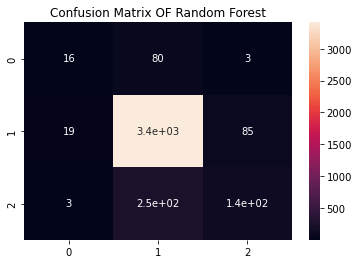

In [3]:
cm_rf=confusion_matrix(y_test_dta, rforestA_g)
print("confussion matrix of random forest :", cm_rf)
cf_rf=classification_report(y_test_dta, rforestA_g)
sns.heatmap(cm_rf, annot=True).set(title='Confusion Matrix OF Random Forest')

**confusion matrix and classification report for Support Vector Machine**

confussion matrix of random forest : [[   3   94    2]
 [   1 3496   20]
 [   0  275  109]]


[Text(0.5, 1.0, 'Confusion Matrix OF Support Vector Machine')]

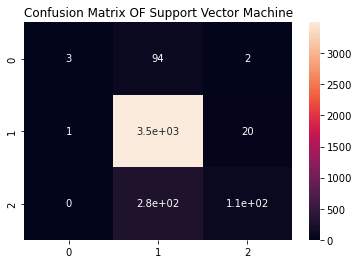

In [32]:
cm_sv=confusion_matrix(y_test_dta, y_pred_sv)
print("confussion matrix of random forest :", cm_sv)
cf_sv=classification_report(y_test_dta,y_pred_sv )
sns.heatmap(cm_sv, annot=True).set(title='Confusion Matrix OF Support Vector Machine')

**confusion matrix and classification report for Support Vector Machine**

confussion matrix of random forest : [[   3   94    2]
 [   1 3496   20]
 [   0  275  109]]


[Text(0.5, 1.0, 'Confusion Matrix OF Support Vector Machine')]

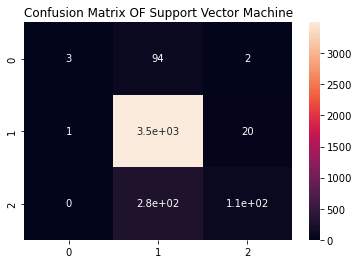

In [34]:
cm_sv=confusion_matrix(y_test_dta, y_pred_sv)
print("confussion matrix of random forest :", cm_sv)
cf_sv=classification_report(y_test_dta,y_pred_sv )
sns.heatmap(cm_sv, annot=True).set(title='Confusion Matrix OF Support Vector Machine')

**confusion matrix and classification report for KNearest Neighbours**

confussion matrix of Nearest neighbour : [[  13   79    7]
 [  33 3378  106]
 [   3  238  143]]


[Text(0.5, 1.0, 'Confusion Matrix OF Nearest neighbour')]

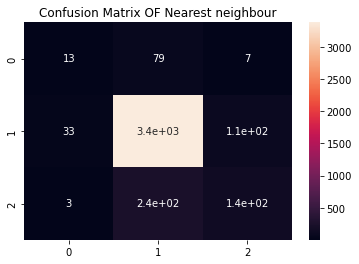

In [5]:
cm_kn=confusion_matrix(y_test_dta,  y_knnA_pred)
print("confussion matrix of Nearest neighbour :", cm_kn)
cf_kn=classification_report(y_test_dta,  y_knnA_pred)
sns.heatmap(cm_kn, annot=True).set(title='Confusion Matrix OF Nearest neighbour')

**confusion matrix and classification report for Decision Tree**

confussion matrix of decision tree : [[   0   97    2]
 [   0 3500   17]
 [   0  299   85]]


C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Micro Tec\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 1.0, 'Confusion Matrix OF Decision Tree')]

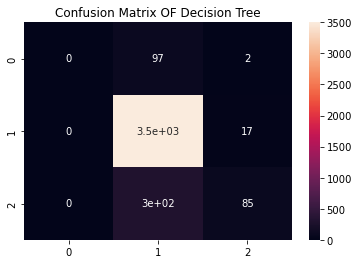

In [6]:
cm_dt=confusion_matrix(y_test_dta, y_pred)
print("confussion matrix of decision tree :", cm_dt)
cf_dt=classification_report(y_test_dta, y_pred)
sns.heatmap(cm_dt, annot=True).set(title='Confusion Matrix OF Decision Tree')

**confusion matrix and classification report for Random Forest**

confussion matrix of CatBoost : [[   5   91    3]
 [   2 3499   16]
 [   0  283  101]]


[Text(0.5, 1.0, 'Confusion Matrix OF CatBoost')]

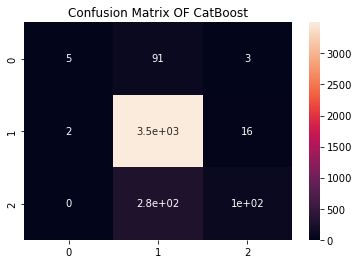

In [12]:
cm_cb=confusion_matrix(y_test_dta, y_pred_cb)
print("confussion matrix of CatBoost :", cm_cb)
cf_cb=classification_report(y_test_dta, y_pred_cb)
sns.heatmap(cm_cb, annot=True).set(title='Confusion Matrix OF CatBoost')

**confusion matrix and classification report for Random Forest**

confussion matrix of Gradent Decent : [[   0   97    2]
 [   1 3404  112]
 [   1  264  119]]


[Text(0.5, 1.0, 'Confusion Matrix OF Gradient Decent')]

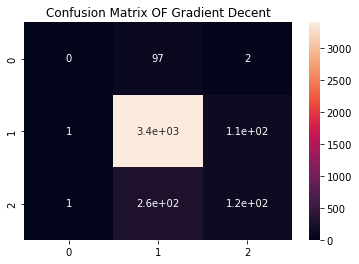

In [36]:
cm_gd=confusion_matrix(y_test_dta, y_pred_GBC)
print("confussion matrix of Gradent Decent :", cm_gd)
cf_gd=classification_report(y_test_dta, y_pred_GBC)
sns.heatmap(cm_gd, annot=True).set(title='Confusion Matrix OF Gradient Decent')

# Comparsion Between Machine Learning Models Accuracy Score

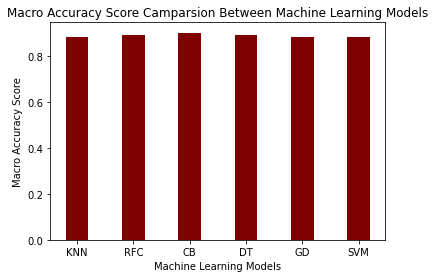

In [43]:
data1 = {'KNN':  np.array(KNearneighbor_scores).mean() ,'RFC': np.array(randomforest_scores).mean(),'CB': np.array(catboost_scores).mean(),'DT':np.array(Decision_tree).mean(),'GD':np.array(GradientBoosting_scores).mean(),'SVM':np.array (Supportvector_scores).mean()}
names = list(data1.keys())
values = list(data1.values())
plt.bar(range(len(data1)), values, tick_label=names,color ='maroon',width = 0.4)
plt.xlabel('Machine Learning Models')
plt.ylabel('Macro Accuracy Score')
plt.title("Macro Accuracy Score Camparsion Between Machine Learning Models")
plt.show()